In [3]:
!pip install monai[all] nibabel scipy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 21.7 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 25.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 67.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 23.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 64.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 93.8 MB/s eta 0:0

In [4]:
"""
Quick diagnostic to find exact BRATS file structure
Run this in a new cell to debug the path issue
"""

import os
from pathlib import Path

print("="*80)
print("QUICK BRATS DEBUG")
print("="*80)

# Check the base path
base_path = "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"

print(f"\n[1] Checking if path exists: {base_path}")
print(f"    Exists: {os.path.exists(base_path)}")

if os.path.exists(base_path):
    print(f"\n[2] Listing contents...")
    contents = os.listdir(base_path)
    print(f"    Found {len(contents)} items")
    
    # Show first 5 items
    print(f"\n[3] First 5 items:")
    for item in contents[:5]:
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path):
            print(f"    📁 {item}/")
            # List files in this directory
            try:
                files = os.listdir(item_path)
                print(f"       Contains {len(files)} files:")
                for f in files[:5]:
                    print(f"       - {f}")
                if len(files) > 5:
                    print(f"       ... and {len(files)-5} more")
            except Exception as e:
                print(f"       Error reading: {e}")
        else:
            print(f"    📄 {item}")
    
    # Check one patient folder in detail
    print(f"\n[4] Detailed check of first BraTS folder...")
    brats_folders = [d for d in contents if 'BraTS' in d and os.path.isdir(os.path.join(base_path, d))]
    
    if brats_folders:
        first_patient = os.path.join(base_path, brats_folders[0])
        print(f"    Checking: {brats_folders[0]}")
        
        files = os.listdir(first_patient)
        print(f"    All files in this folder:")
        for f in files:
            full_path = os.path.join(first_patient, f)
            size = os.path.getsize(full_path) / (1024*1024)  # MB
            print(f"    - {f} ({size:.1f} MB)")
        
        # Check naming pattern
        print(f"\n[5] File naming analysis:")
        has_flair = any('flair' in f.lower() for f in files)
        has_t1 = any('t1.nii' in f.lower() for f in files)
        has_t1ce = any('t1ce' in f.lower() for f in files)
        has_t2 = any('t2.nii' in f.lower() for f in files)
        has_seg = any('seg' in f.lower() for f in files)
        
        print(f"    Has FLAIR: {has_flair}")
        print(f"    Has T1: {has_t1}")
        print(f"    Has T1CE: {has_t1ce}")
        print(f"    Has T2: {has_t2}")
        print(f"    Has SEG: {has_seg}")
        
        # Show exact naming pattern
        print(f"\n[6] Expected vs Actual naming:")
        patient_name = brats_folders[0]
        expected_patterns = [
            f"{patient_name}_flair.nii.gz",
            f"{patient_name}_t1.nii.gz",
            f"{patient_name}_t1ce.nii.gz",
            f"{patient_name}_t2.nii.gz",
            f"{patient_name}_seg.nii.gz"
        ]
        
        print(f"    Expected pattern:")
        for exp in expected_patterns:
            exists = exp in files
            symbol = "✓" if exists else "✗"
            print(f"    {symbol} {exp}")
        
        print(f"\n    Actual files:")
        for f in files:
            print(f"    - {f}")
    else:
        print(f"    ✗ No BraTS folders found!")
        print(f"    Available folders: {contents[:10]}")
else:
    # Path doesn't exist, try to find it
    print(f"\n[2] Path doesn't exist. Searching for BRATS data...")
    
    if os.path.exists("/kaggle/input"):
        for item in os.listdir("/kaggle/input"):
            item_path = os.path.join("/kaggle/input", item)
            print(f"\n  Checking: {item}")
            
            if os.path.isdir(item_path):
                # Look for BraTS folders
                try:
                    for root, dirs, files in os.walk(item_path):
                        brats_dirs = [d for d in dirs if 'BraTS' in d]
                        if brats_dirs:
                            print(f"    ✓ Found BraTS folders in: {root}")
                            print(f"      Sample: {brats_dirs[0]}")
                            break
                except:
                    pass

print("\n" + "="*80)
print("RECOMMENDATION")
print("="*80)
print("\nBased on the above output, we can fix the path in the main code.")
print("Please share the output of this debug script!")

QUICK BRATS DEBUG

[1] Checking if path exists: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData
    Exists: True

[2] Listing contents...
    Found 371 items

[3] First 5 items:
    📁 BraTS20_Training_083/
       Contains 5 files:
       - BraTS20_Training_083_flair.nii
       - BraTS20_Training_083_t1.nii
       - BraTS20_Training_083_seg.nii
       - BraTS20_Training_083_t2.nii
       - BraTS20_Training_083_t1ce.nii
    📁 BraTS20_Training_337/
       Contains 5 files:
       - BraTS20_Training_337_t1ce.nii
       - BraTS20_Training_337_t1.nii
       - BraTS20_Training_337_seg.nii
       - BraTS20_Training_337_t2.nii
       - BraTS20_Training_337_flair.nii
    📁 BraTS20_Training_161/
       Contains 5 files:
       - BraTS20_Training_161_t1ce.nii
       - BraTS20_Training_161_t2.nii
       - BraTS20_Training_161_t1.nii
       - BraTS20_Training_161_seg.nii
       - BraTS20_Training_161_flair.nii
    📁 BraTS20_Training_198/
       

<frozen importlib._bootstrap_external>:1241: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.
2025-10-04 11:51:15.371849: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759578675.609452      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759578675.673240      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

BRATS 2020 PREPROCESSING & AUGMENTATION PIPELINE - KAGGLE

[1/5] Locating BRATS dataset...
✓ Dataset found at: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData
✓ Output directory: /kaggle/working/visualizations

[2/5] Loading dataset metadata...
    Scanning directory: /kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData
    Found 369 potential patient directories
    ✓ Successfully loaded 10 complete samples

[3/5] Creating preprocessing pipelines...
✓ Training transforms created (with augmentation)
✓ Validation transforms created (preprocessing only)

[4/5] Applying transforms and creating visualizations...

🔄 Processing sample 1/3...
   Patient: BraTS20_Training_001
  ⏳ Loading original data...


monai.transforms.spatial.dictionary Orientationd.__init__:labels: Current default value of argument `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` was changed in version None from `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` to `labels=None`. Default value changed to None meaning that the transform now uses the 'space' of a meta-tensor, if applicable, to determine appropriate axis labels.


  ✅ Loaded: torch.Size([4, 240, 240, 155])
  ⏳ Applying preprocessing + augmentation pipeline...
  ✅ Transformed: torch.Size([4, 128, 128, 128])
  ⏳ Extracting data...
  ⏳ Creating visualization...
     Original shape: (240, 240, 155), Transformed shape: (128, 128, 128)
  ✅ Saved: brats_sample_1_comparison.png


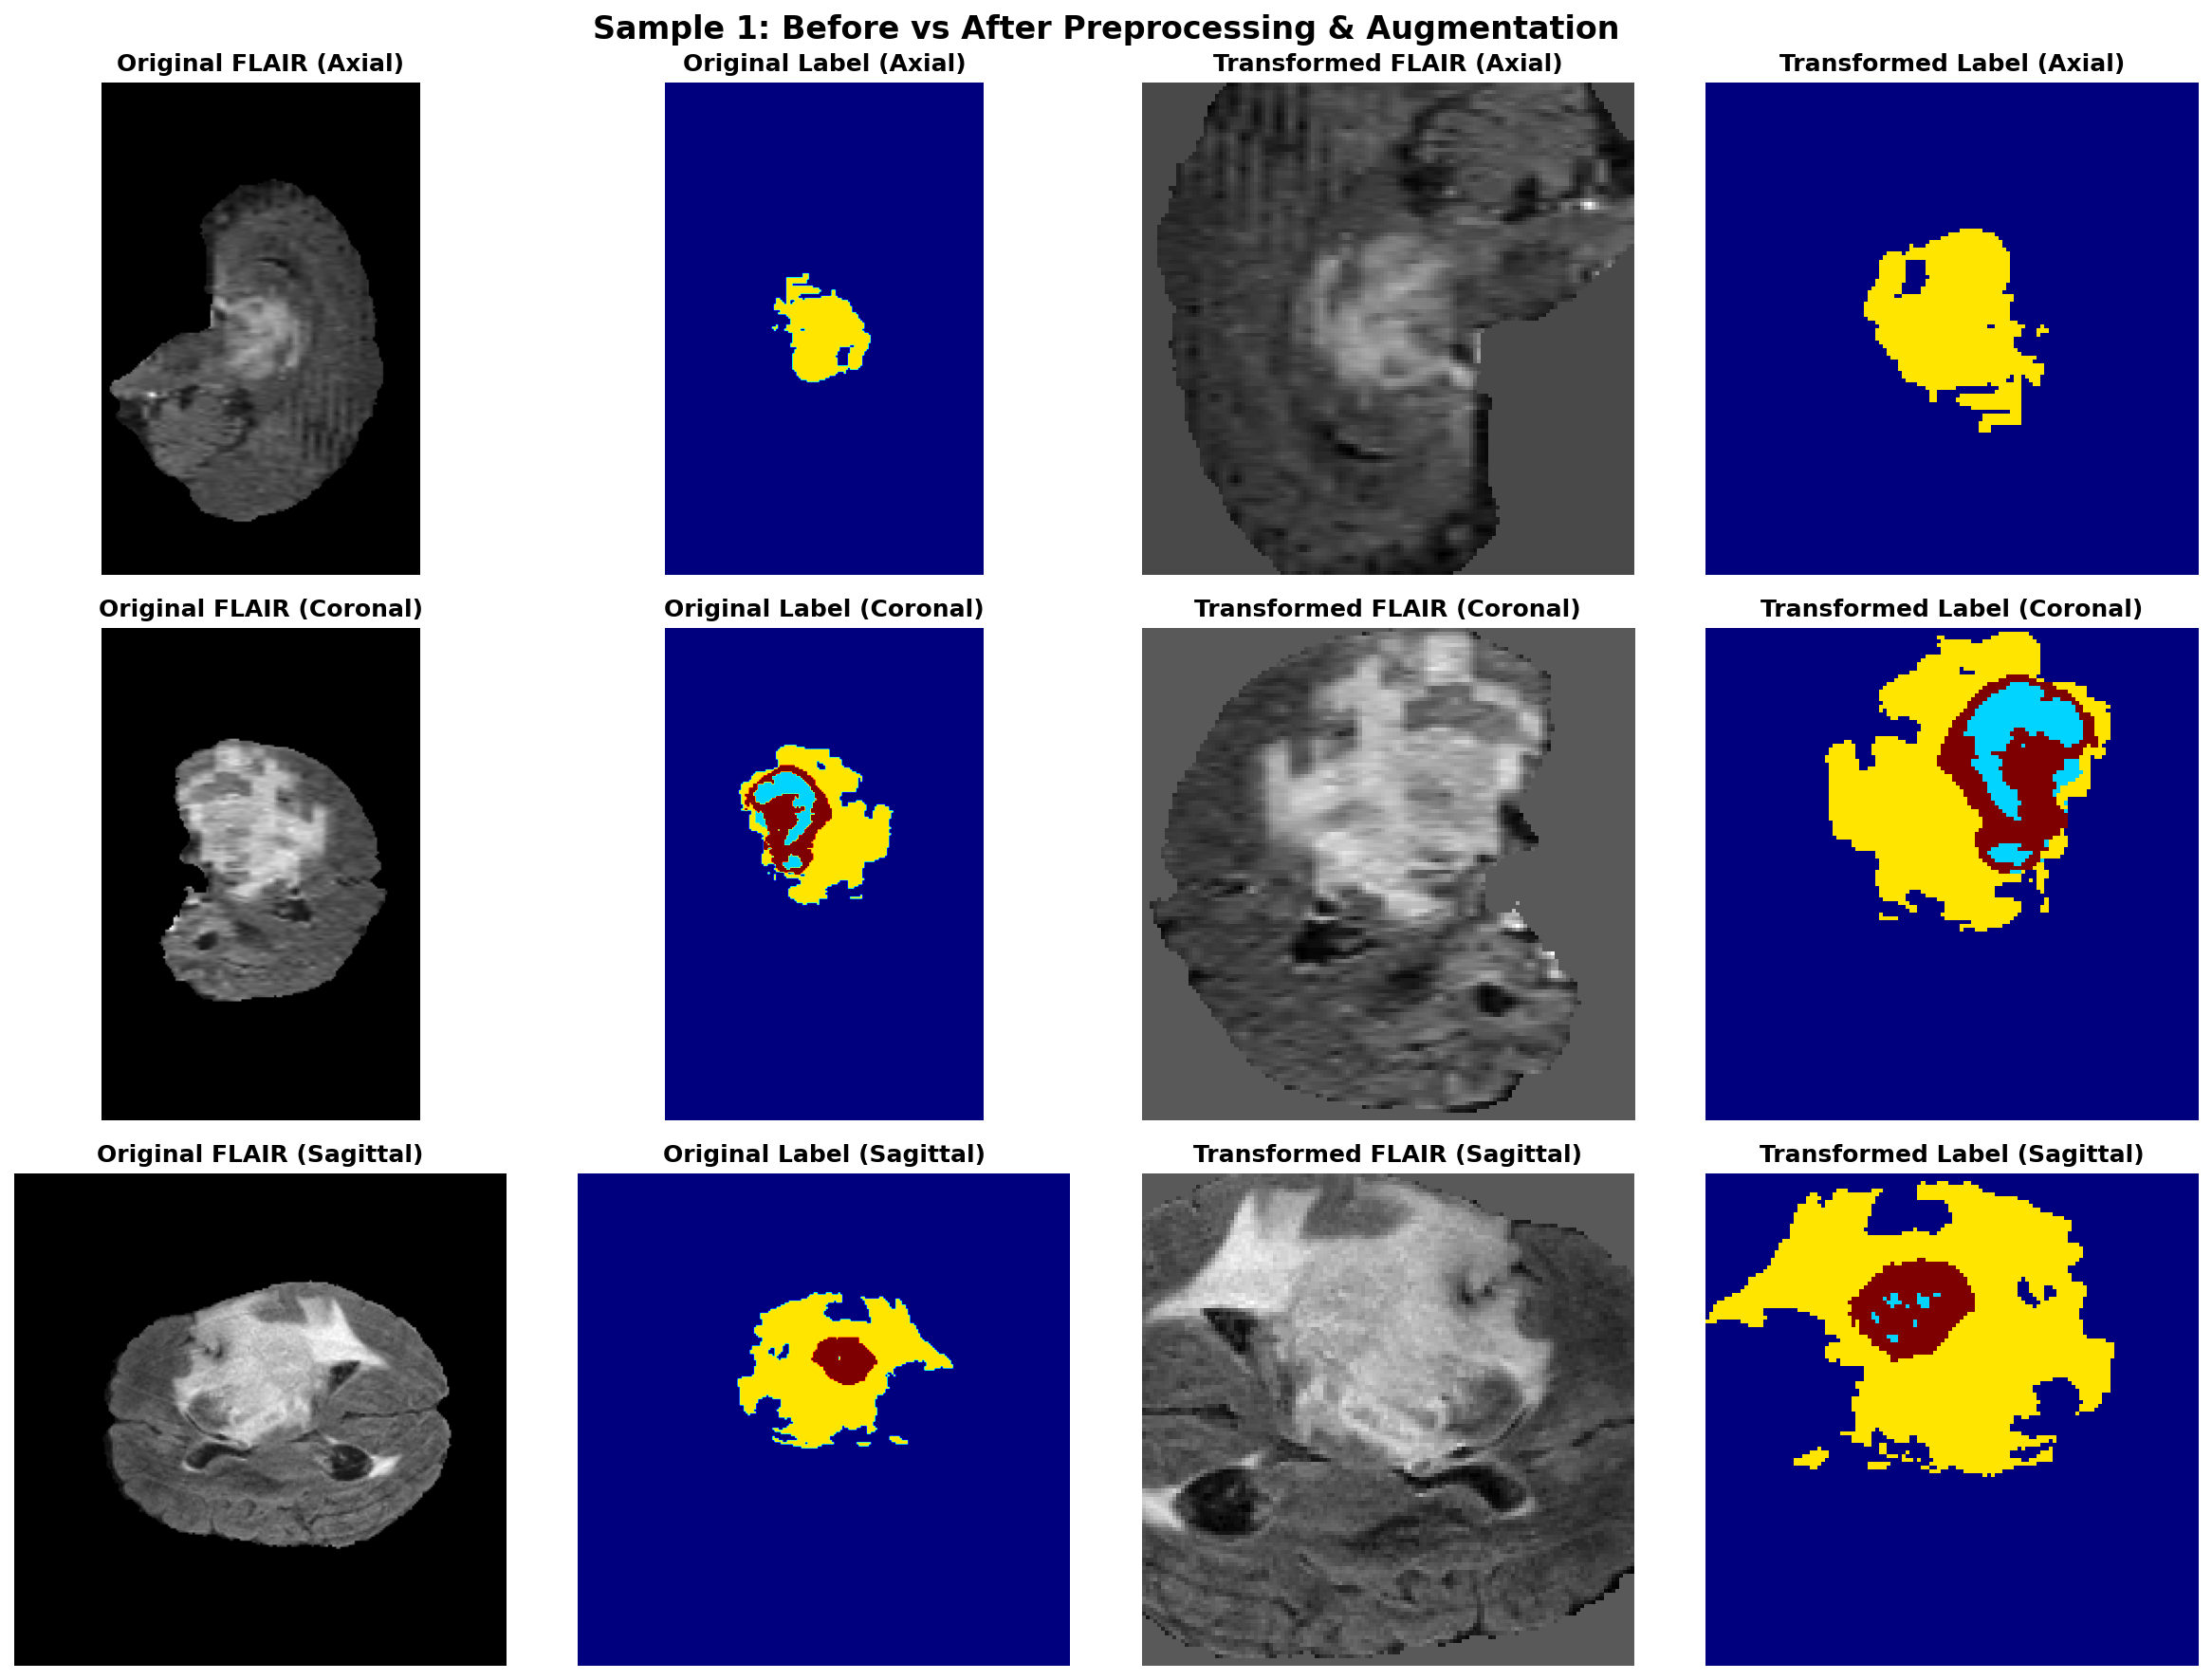

  👁️  Displaying visualization above...
  ────────────────────────────────────────────────────────────────────────────

🔄 Processing sample 2/3...
   Patient: BraTS20_Training_002
  ⏳ Loading original data...
  ✅ Loaded: torch.Size([4, 240, 240, 155])
  ⏳ Applying preprocessing + augmentation pipeline...
  ✅ Transformed: torch.Size([4, 128, 128, 128])
  ⏳ Extracting data...
  ⏳ Creating visualization...
     Original shape: (240, 240, 155), Transformed shape: (128, 128, 128)
  ✅ Saved: brats_sample_2_comparison.png


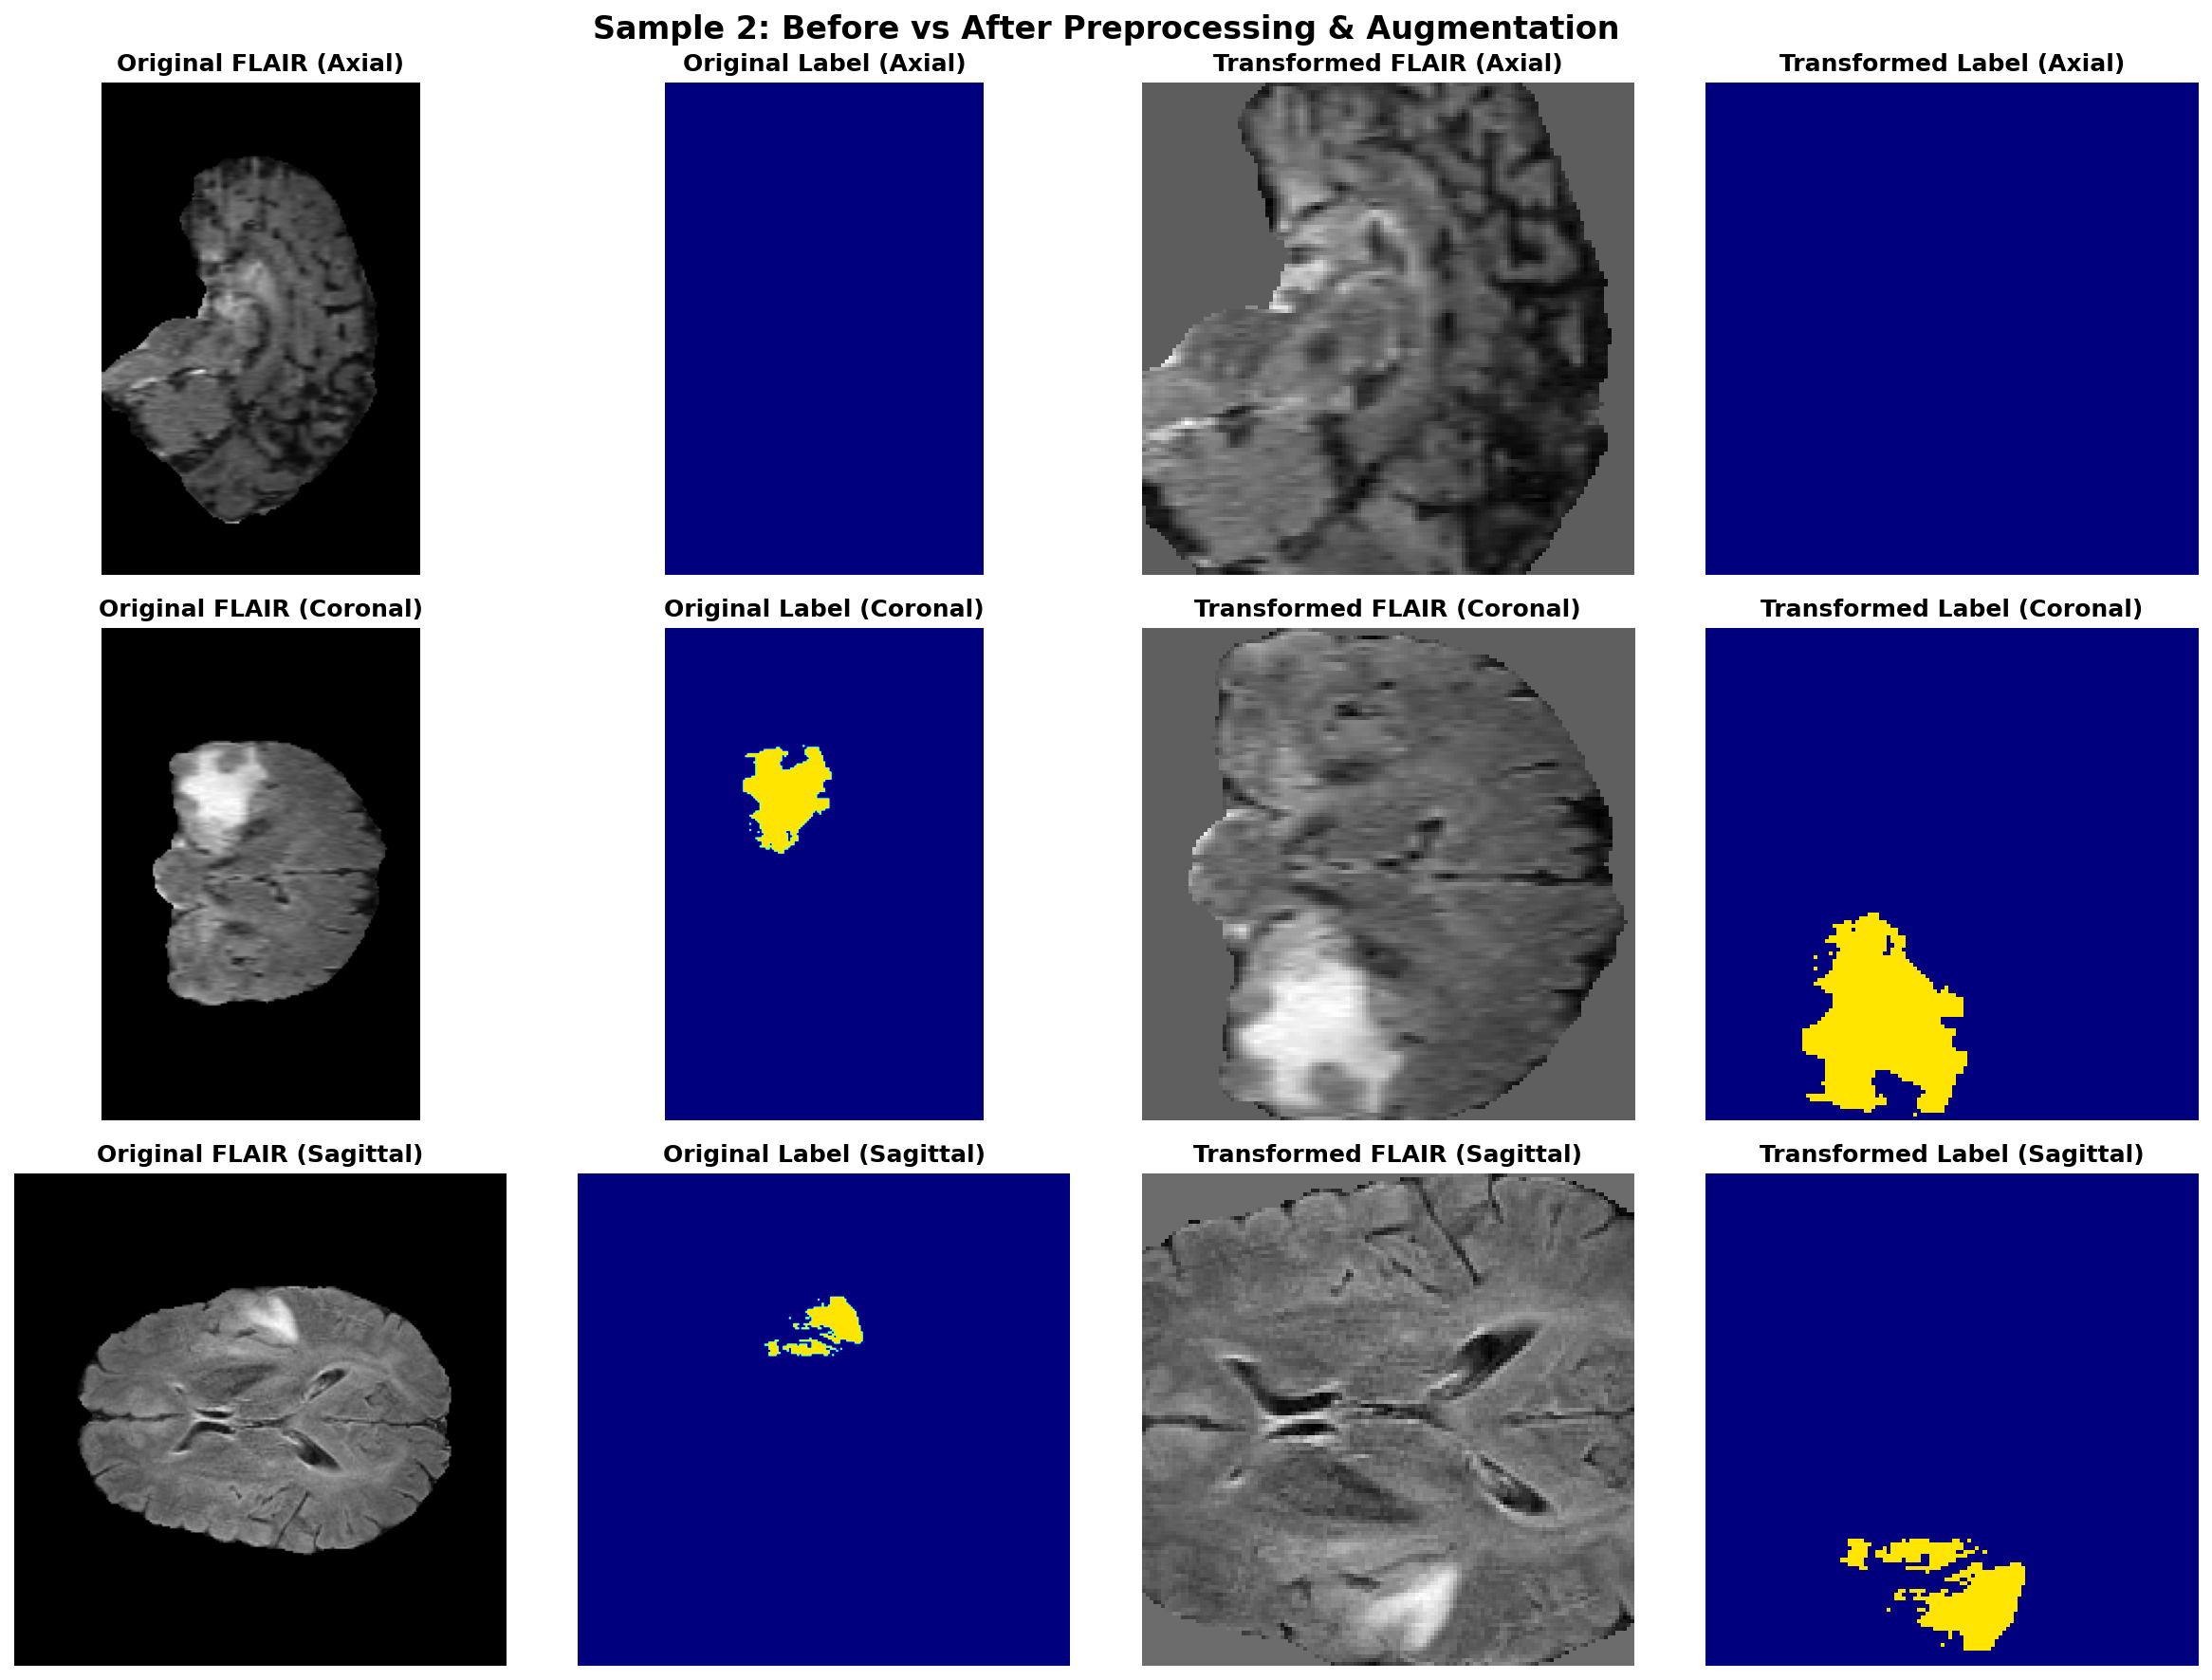

  👁️  Displaying visualization above...
  ────────────────────────────────────────────────────────────────────────────

🔄 Processing sample 3/3...
   Patient: BraTS20_Training_003
  ⏳ Loading original data...
  ✅ Loaded: torch.Size([4, 240, 240, 155])
  ⏳ Applying preprocessing + augmentation pipeline...
  ✅ Transformed: torch.Size([4, 128, 128, 128])
  ⏳ Extracting data...
  ⏳ Creating visualization...
     Original shape: (240, 240, 155), Transformed shape: (128, 128, 128)
  ✅ Saved: brats_sample_3_comparison.png


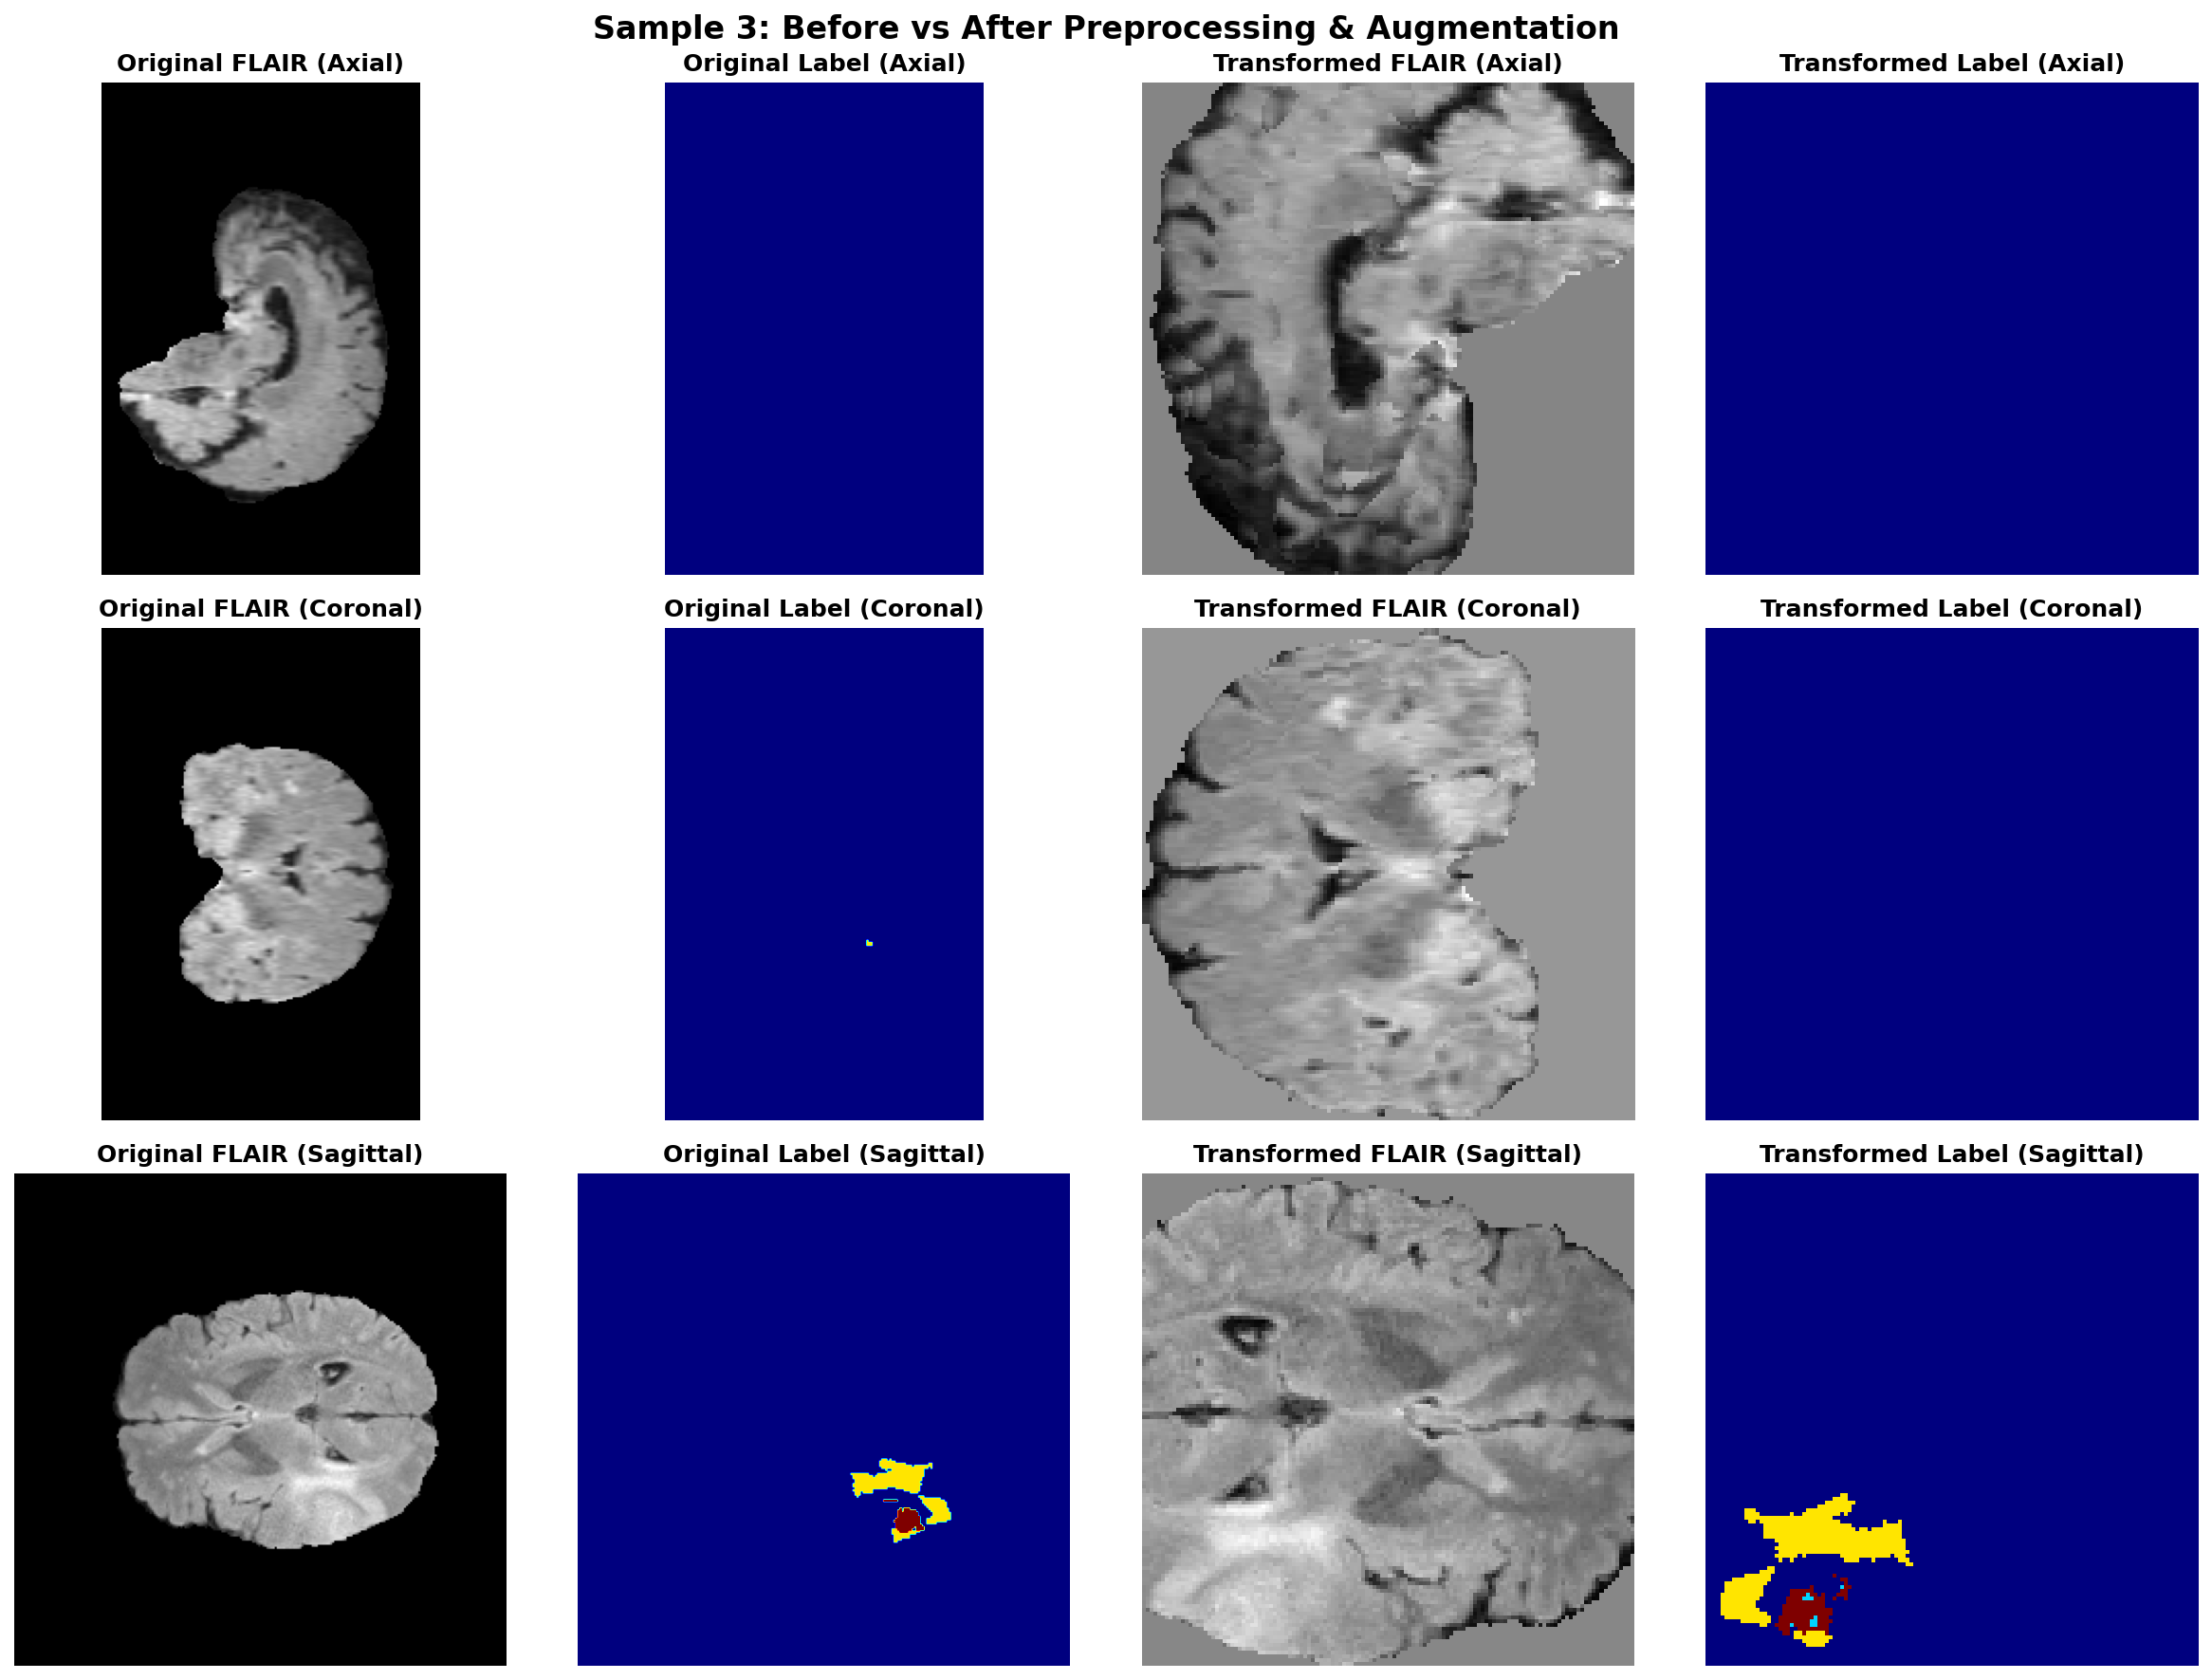

  👁️  Displaying visualization above...
  ────────────────────────────────────────────────────────────────────────────

[5/5] Creating augmentation strategy analysis...
  ⏳ Generating augmentation strategy document...
  ✅ Saved: augmentation_strategy.png


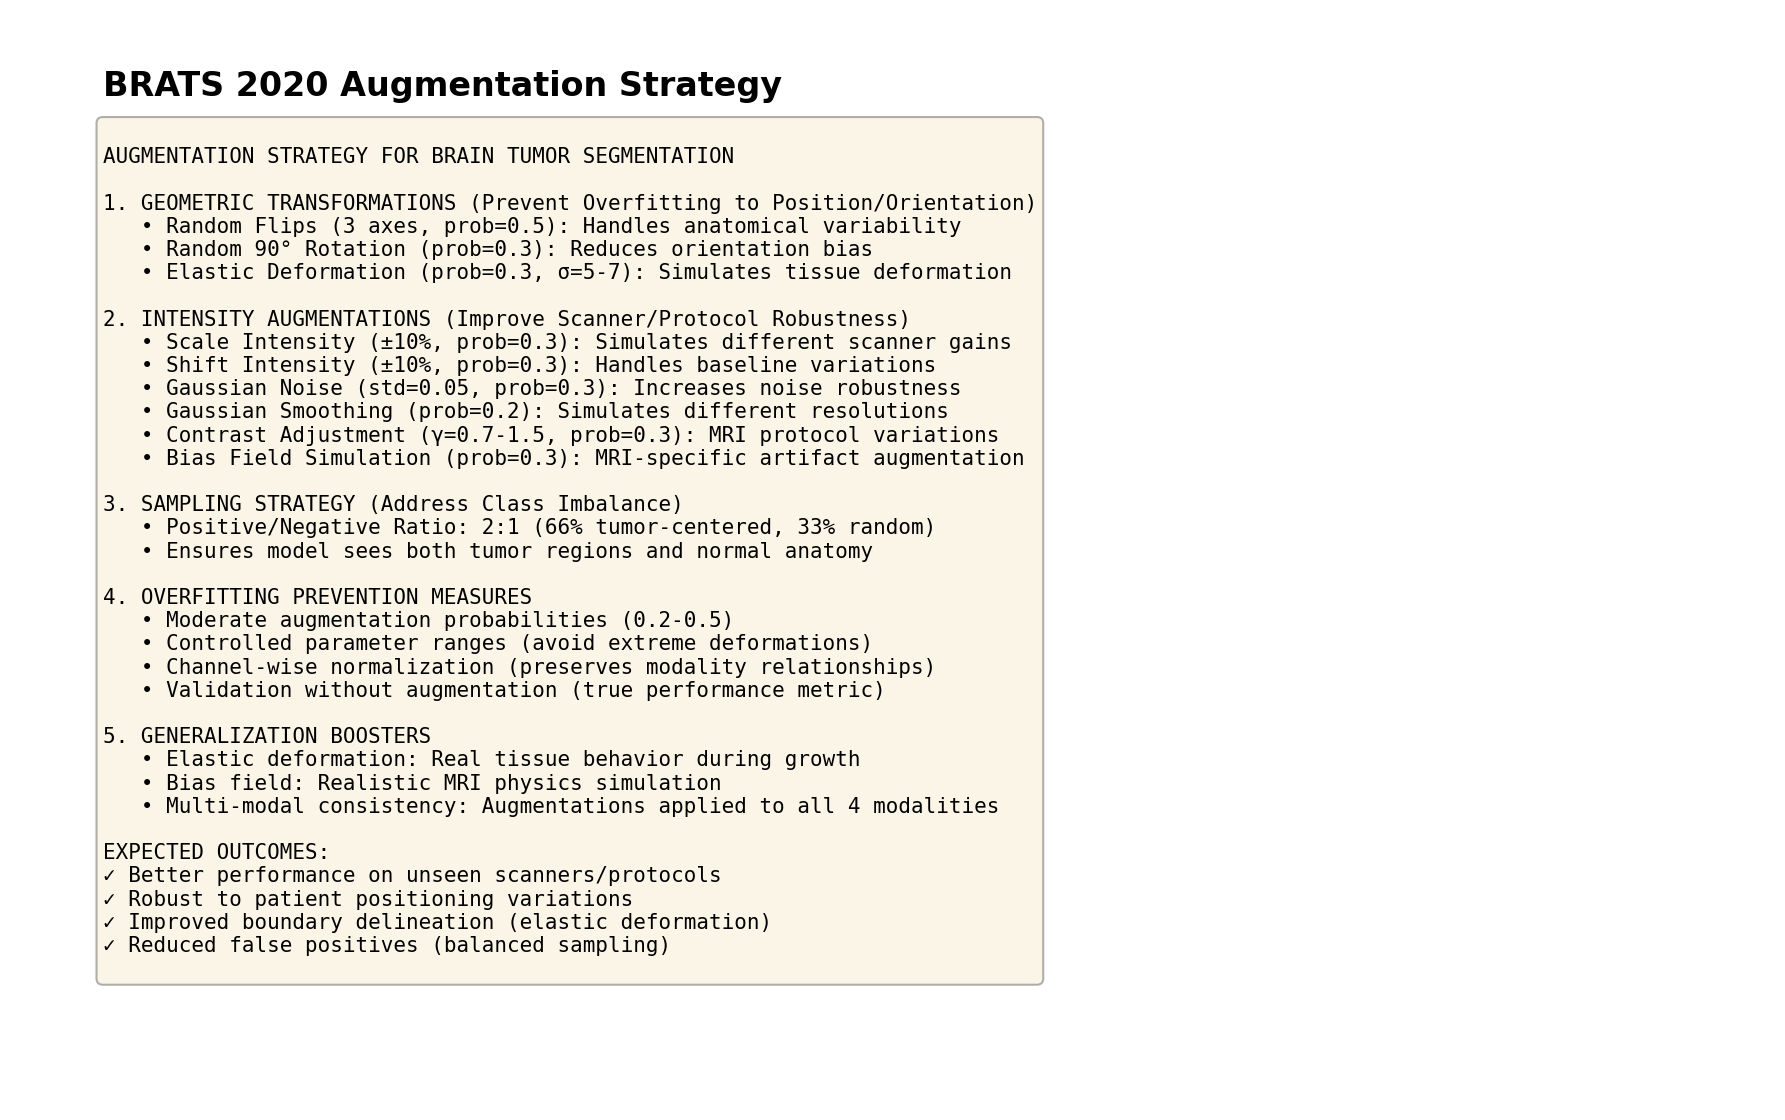

  👁️  Displaying strategy above...

🎉 PIPELINE COMPLETE! 🎉

📦 DELIVERABLES:
   ✅ Preprocessing pipeline with MONAI transforms
   ✅ 2 custom augmentations (Elastic Deformation + Bias Field)
   ✅ 3 visualization plots (before vs after)
   ✅ Augmentation strategy analysis

📂 All files saved in: /kaggle/working/visualizations

📄 Generated Files:
   1. augmentation_strategy.png (313.8 KB)
   2. brats_sample_1_comparison.png (391.8 KB)
   3. brats_sample_2_comparison.png (394.7 KB)
   4. brats_sample_3_comparison.png (362.2 KB)

💡 NEXT STEPS:
   1. Review visualizations above
   2. Download files from Output panel (right sidebar)
   3. Proceed to Task 2: Model Training


In [5]:
"""
BRATS 2020 Data Preprocessing & Augmentation Pipeline - FIXED
Complete solution for Task 1 with MONAI transforms and custom augmentations
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import torch
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Spacingd, Orientationd,
    NormalizeIntensityd, RandCropByPosNegLabeld, RandFlipd, RandRotate90d,
    RandScaleIntensityd, RandShiftIntensityd, RandGaussianNoised,
    RandGaussianSmoothd, RandAdjustContrastd, EnsureTyped,
    MapTransform, CenterSpatialCropd, SpatialPadd
)
from monai.utils import set_determinism

# Set seed for reproducibility
set_determinism(seed=42)


class RandElasticDeformationd(MapTransform):
    """
    Custom augmentation: Elastic deformation for 3D medical images
    Simulates tissue deformation to improve model robustness
    """
    def __init__(self, keys, prob=0.3, sigma_range=(5, 7), magnitude_range=(50, 150)):
        super().__init__(keys)
        self.prob = prob
        self.sigma_range = sigma_range
        self.magnitude_range = magnitude_range
    
    def __call__(self, data):
        d = dict(data)
        if np.random.random() > self.prob:
            return d
        
        for key in self.keys:
            img = d[key]
            
            # Convert to numpy if tensor
            if isinstance(img, torch.Tensor):
                img = img.cpu().numpy()
            
            shape = img.shape[1:]  # Skip channel dimension
            
            # Generate random displacement fields
            sigma = np.random.uniform(*self.sigma_range)
            magnitude = np.random.uniform(*self.magnitude_range)
            
            # Create smooth displacement fields using Gaussian filtering
            dx = np.random.randn(*shape) * magnitude
            dy = np.random.randn(*shape) * magnitude
            dz = np.random.randn(*shape) * magnitude
            
            from scipy.ndimage import gaussian_filter
            dx = gaussian_filter(dx, sigma, mode='constant', cval=0)
            dy = gaussian_filter(dy, sigma, mode='constant', cval=0)
            dz = gaussian_filter(dz, sigma, mode='constant', cval=0)
            
            # Create meshgrid for coordinates
            x, y, z = np.meshgrid(
                np.arange(shape[0]),
                np.arange(shape[1]),
                np.arange(shape[2]),
                indexing='ij'
            )
            
            # Apply displacement
            indices = (
                np.clip(x + dx, 0, shape[0] - 1).astype(np.int32),
                np.clip(y + dy, 0, shape[1] - 1).astype(np.int32),
                np.clip(z + dz, 0, shape[2] - 1).astype(np.int32)
            )
            
            # Apply to all channels
            deformed = np.zeros_like(img)
            for c in range(img.shape[0]):
                deformed[c] = img[c][indices]
            
            # Convert back to tensor if needed
            if isinstance(d[key], torch.Tensor):
                d[key] = torch.from_numpy(deformed).to(d[key].dtype)
            else:
                d[key] = deformed
        
        return d


class RandBiasFieldd(MapTransform):
    """
    Custom augmentation: Simulates MRI bias field artifacts
    Adds realistic intensity non-uniformity common in MRI scans
    """
    def __init__(self, keys, prob=0.3, coeff_range=(0.0, 0.5)):
        super().__init__(keys)
        self.prob = prob
        self.coeff_range = coeff_range
    
    def __call__(self, data):
        d = dict(data)
        if np.random.random() > self.prob:
            return d
        
        for key in self.keys:
            if key == 'label':  # Don't apply to labels
                continue
                
            img = d[key]
            
            # Convert to numpy if tensor
            if isinstance(img, torch.Tensor):
                img = img.cpu().numpy()
            
            shape = img.shape[1:]
            
            # Generate low-frequency bias field
            coeff = np.random.uniform(*self.coeff_range)
            
            # Create coordinate grids normalized to [-1, 1]
            x = np.linspace(-1, 1, shape[0])
            y = np.linspace(-1, 1, shape[1])
            z = np.linspace(-1, 1, shape[2])
            X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
            
            # Polynomial bias field
            bias_field = 1 + coeff * (X**2 + Y**2 + Z**2)
            
            # Apply to all channels
            biased = img * bias_field[np.newaxis, ...]
            
            # Convert back to tensor if needed
            if isinstance(d[key], torch.Tensor):
                d[key] = torch.from_numpy(biased).to(d[key].dtype)
            else:
                d[key] = biased
        
        return d


def find_brats_data_dir():
    """
    Automatically find BRATS dataset directory on Kaggle
    Returns the correct path or None if not found
    """
    possible_paths = [
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation",
    ]
    
    # Try each path
    for path in possible_paths:
        if os.path.exists(path):
            # Check if it contains BraTS directories
            try:
                items = os.listdir(path)
                brats_dirs = [d for d in items if 'BraTS' in d and os.path.isdir(os.path.join(path, d))]
                if brats_dirs:
                    return path
            except:
                continue
    
    return None


def get_brats_data_dicts(data_dir, num_samples=None):
    """
    Create data dictionaries for BRATS dataset
    """
    data_dir = Path(data_dir)
    
    print(f"    Scanning directory: {data_dir}")
    
    patient_dirs = sorted([d for d in data_dir.iterdir() if d.is_dir() and 'BraTS' in d.name])
    
    if len(patient_dirs) == 0:
        print(f"    ✗ No BraTS directories found!")
        return []
    
    print(f"    Found {len(patient_dirs)} potential patient directories")
    
    if num_samples:
        patient_dirs = patient_dirs[:num_samples]
    
    data_dicts = []
    
    for patient_dir in patient_dirs:
        all_files = list(patient_dir.glob('*.nii*'))
        
        if len(all_files) == 0:
            continue
        
        data_dict = {'image': [], 'label': None}
        
        # Find each modality
        modality_patterns = {
            'flair': ['flair'],
            't1': ['t1.nii', '_t1_', 't1.'],
            't1ce': ['t1ce', 't1-ce', 't1_ce'],
            't2': ['t2.nii', '_t2_', 't2.']
        }
        
        found_modalities = {}
        for mod_key, patterns in modality_patterns.items():
            for f in all_files:
                fname_lower = f.name.lower()
                if any(p in fname_lower for p in patterns) and 'seg' not in fname_lower:
                    if mod_key == 't1' and 't1ce' in fname_lower:
                        continue
                    found_modalities[mod_key] = str(f)
                    break
        
        # Add in order: flair, t1, t1ce, t2
        for mod in ['flair', 't1', 't1ce', 't2']:
            if mod in found_modalities:
                data_dict['image'].append(found_modalities[mod])
        
        # Find segmentation
        for f in all_files:
            if 'seg' in f.name.lower() or 'mask' in f.name.lower():
                data_dict['label'] = str(f)
                break
        
        if len(data_dict['image']) == 4 and data_dict['label'] is not None:
            data_dicts.append(data_dict)
    
    print(f"    ✓ Successfully loaded {len(data_dicts)} complete samples")
    return data_dicts


def get_train_transforms():
    """Training transforms with all required MONAI transforms + custom augmentations"""
    return Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.0, 1.0, 1.0), mode=('bilinear', 'nearest')),
        Orientationd(keys=['image', 'label'], axcodes='RAS'),
        SpatialPadd(keys=['image', 'label'], spatial_size=(128, 128, 128)),
        CenterSpatialCropd(keys=['image', 'label'], roi_size=(128, 128, 128)),
        NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True),
        RandCropByPosNegLabeld(
            keys=['image', 'label'],
            label_key='label',
            spatial_size=(128, 128, 128),
            pos=2, neg=1, num_samples=1
        ),
        RandFlipd(keys=['image', 'label'], prob=0.5, spatial_axis=0),
        RandFlipd(keys=['image', 'label'], prob=0.5, spatial_axis=1),
        RandFlipd(keys=['image', 'label'], prob=0.5, spatial_axis=2),
        RandRotate90d(keys=['image', 'label'], prob=0.3, max_k=3, spatial_axes=(0, 1)),
        RandScaleIntensityd(keys='image', factors=0.1, prob=0.3),
        RandShiftIntensityd(keys='image', offsets=0.1, prob=0.3),
        RandGaussianNoised(keys='image', prob=0.3, mean=0.0, std=0.05),
        RandGaussianSmoothd(keys='image', prob=0.2, sigma_x=(0.5, 1.0), sigma_y=(0.5, 1.0), sigma_z=(0.5, 1.0)),
        RandAdjustContrastd(keys='image', prob=0.3, gamma=(0.7, 1.5)),
        RandElasticDeformationd(keys=['image', 'label'], prob=0.3, sigma_range=(5, 7), magnitude_range=(50, 150)),
        RandBiasFieldd(keys='image', prob=0.3, coeff_range=(0.0, 0.3)),
        EnsureTyped(keys=['image', 'label'])
    ])


def get_val_transforms():
    """Validation transforms (no augmentation)"""
    return Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.0, 1.0, 1.0), mode=('bilinear', 'nearest')),
        Orientationd(keys=['image', 'label'], axcodes='RAS'),
        SpatialPadd(keys=['image', 'label'], spatial_size=(128, 128, 128)),
        CenterSpatialCropd(keys=['image', 'label'], roi_size=(128, 128, 128)),
        NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True),
        EnsureTyped(keys=['image', 'label'])
    ])


def visualize_sample(original, transformed, sample_idx, save_path='visualizations'):
    """Visualize before and after preprocessing"""
    os.makedirs(save_path, exist_ok=True)
    
    def to_numpy(data):
        if isinstance(data, torch.Tensor):
            return data.cpu().numpy()
        return np.array(data)
    
    # IMPORTANT: RandCropByPosNegLabeld with num_samples=1 returns a LIST of dicts
    if isinstance(transformed, list):
        transformed = transformed[0]
    
    print(f"  ⏳ Extracting data...")
    # Get FLAIR and labels
    orig_img = to_numpy(original['image'][0])
    orig_label = to_numpy(original['label'][0])
    trans_img = to_numpy(transformed['image'][0])
    trans_label = to_numpy(transformed['label'][0])
    
    print(f"  ⏳ Creating visualization...")
    print(f"     Original shape: {orig_img.shape}, Transformed shape: {trans_img.shape}")
    
    # Get dimensions
    d, h, w = orig_img.shape
    d2, h2, w2 = trans_img.shape
    
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    fig.suptitle(f'Sample {sample_idx}: Before vs After Preprocessing & Augmentation', 
                 fontsize=16, fontweight='bold')
    
    # Axial
    axes[0, 0].imshow(orig_img[d//2, :, :], cmap='gray')
    axes[0, 0].set_title('Original FLAIR (Axial)', fontweight='bold')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(orig_label[d//2, :, :], cmap='jet', vmin=0, vmax=3)
    axes[0, 1].set_title('Original Label (Axial)', fontweight='bold')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(trans_img[d2//2, :, :], cmap='gray')
    axes[0, 2].set_title('Transformed FLAIR (Axial)', fontweight='bold')
    axes[0, 2].axis('off')
    
    axes[0, 3].imshow(trans_label[d2//2, :, :], cmap='jet', vmin=0, vmax=3)
    axes[0, 3].set_title('Transformed Label (Axial)', fontweight='bold')
    axes[0, 3].axis('off')
    
    # Coronal
    axes[1, 0].imshow(orig_img[:, h//2, :], cmap='gray')
    axes[1, 0].set_title('Original FLAIR (Coronal)', fontweight='bold')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(orig_label[:, h//2, :], cmap='jet', vmin=0, vmax=3)
    axes[1, 1].set_title('Original Label (Coronal)', fontweight='bold')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(trans_img[:, h2//2, :], cmap='gray')
    axes[1, 2].set_title('Transformed FLAIR (Coronal)', fontweight='bold')
    axes[1, 2].axis('off')
    
    axes[1, 3].imshow(trans_label[:, h2//2, :], cmap='jet', vmin=0, vmax=3)
    axes[1, 3].set_title('Transformed Label (Coronal)', fontweight='bold')
    axes[1, 3].axis('off')
    
    # Sagittal
    axes[2, 0].imshow(orig_img[:, :, w//2], cmap='gray')
    axes[2, 0].set_title('Original FLAIR (Sagittal)', fontweight='bold')
    axes[2, 0].axis('off')
    
    axes[2, 1].imshow(orig_label[:, :, w//2], cmap='jet', vmin=0, vmax=3)
    axes[2, 1].set_title('Original Label (Sagittal)', fontweight='bold')
    axes[2, 1].axis('off')
    
    axes[2, 2].imshow(trans_img[:, :, w2//2], cmap='gray')
    axes[2, 2].set_title('Transformed FLAIR (Sagittal)', fontweight='bold')
    axes[2, 2].axis('off')
    
    axes[2, 3].imshow(trans_label[:, :, w2//2], cmap='jet', vmin=0, vmax=3)
    axes[2, 3].set_title('Transformed Label (Sagittal)', fontweight='bold')
    axes[2, 3].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/brats_sample_{sample_idx}_comparison.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  ✅ Saved: brats_sample_{sample_idx}_comparison.png")
    
    # Display inline if in notebook
    try:
        from IPython.display import Image, display
        display(Image(f'{save_path}/brats_sample_{sample_idx}_comparison.png'))
        print(f"  👁️  Displaying visualization above...")
    except:
        pass


def create_augmentation_analysis_plot(save_path='visualizations'):
    """Create strategy analysis plot"""
    os.makedirs(save_path, exist_ok=True)
    
    print(f"  ⏳ Generating augmentation strategy document...")
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('off')
    
    strategy_text = """
AUGMENTATION STRATEGY FOR BRAIN TUMOR SEGMENTATION

1. GEOMETRIC TRANSFORMATIONS (Prevent Overfitting to Position/Orientation)
   • Random Flips (3 axes, prob=0.5): Handles anatomical variability
   • Random 90° Rotation (prob=0.3): Reduces orientation bias
   • Elastic Deformation (prob=0.3, σ=5-7): Simulates tissue deformation
   
2. INTENSITY AUGMENTATIONS (Improve Scanner/Protocol Robustness)
   • Scale Intensity (±10%, prob=0.3): Simulates different scanner gains
   • Shift Intensity (±10%, prob=0.3): Handles baseline variations
   • Gaussian Noise (std=0.05, prob=0.3): Increases noise robustness
   • Gaussian Smoothing (prob=0.2): Simulates different resolutions
   • Contrast Adjustment (γ=0.7-1.5, prob=0.3): MRI protocol variations
   • Bias Field Simulation (prob=0.3): MRI-specific artifact augmentation

3. SAMPLING STRATEGY (Address Class Imbalance)
   • Positive/Negative Ratio: 2:1 (66% tumor-centered, 33% random)
   • Ensures model sees both tumor regions and normal anatomy
   
4. OVERFITTING PREVENTION MEASURES
   • Moderate augmentation probabilities (0.2-0.5)
   • Controlled parameter ranges (avoid extreme deformations)
   • Channel-wise normalization (preserves modality relationships)
   • Validation without augmentation (true performance metric)

5. GENERALIZATION BOOSTERS
   • Elastic deformation: Real tissue behavior during growth
   • Bias field: Realistic MRI physics simulation
   • Multi-modal consistency: Augmentations applied to all 4 modalities
   
EXPECTED OUTCOMES:
✓ Better performance on unseen scanners/protocols
✓ Robust to patient positioning variations
✓ Improved boundary delineation (elastic deformation)
✓ Reduced false positives (balanced sampling)
    """
    
    ax.text(0.05, 0.95, "BRATS 2020 Augmentation Strategy", transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top')
    ax.text(0.05, 0.90, strategy_text, transform=ax.transAxes,
            fontsize=10, va='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/augmentation_strategy.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  ✅ Saved: augmentation_strategy.png")
    
    # Display inline
    try:
        from IPython.display import Image, display
        display(Image(f'{save_path}/augmentation_strategy.png'))
        print(f"  👁️  Displaying strategy above...")
    except:
        pass


def create_dataset_analysis(data_dicts, save_path='visualizations'):
    """Create comprehensive dataset analysis visualizations"""
    os.makedirs(save_path, exist_ok=True)
    
    print(f"  ⏳ Analyzing dataset statistics...")
    
    # Analyze first 10 samples
    sample_sizes = []
    tumor_volumes = []
    modality_stats = {'flair': [], 't1': [], 't1ce': [], 't2': []}
    
    for idx, data_dict in enumerate(data_dicts[:10]):
        # Load minimal transforms
        load = Compose([
            LoadImaged(keys=['image', 'label'], image_only=False),
            EnsureChannelFirstd(keys=['image', 'label'])
        ])
        data = load(data_dict)
        
        img = data['image'].cpu().numpy() if isinstance(data['image'], torch.Tensor) else data['image']
        label = data['label'].cpu().numpy() if isinstance(data['label'], torch.Tensor) else data['label']
        
        # Volume info
        sample_sizes.append(img.shape[1:])
        tumor_voxels = np.sum(label > 0)
        total_voxels = np.prod(label.shape)
        tumor_volumes.append((tumor_voxels / total_voxels) * 100)
        
        # Modality intensity stats
        for i, mod in enumerate(['flair', 't1', 't1ce', 't2']):
            mod_data = img[i][img[i] > 0]  # Non-zero voxels only
            if len(mod_data) > 0:
                modality_stats[mod].append({
                    'mean': np.mean(mod_data),
                    'std': np.std(mod_data),
                    'min': np.min(mod_data),
                    'max': np.max(mod_data)
                })
    
    # Create comprehensive analysis figure
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. Dataset Overview
    ax1 = fig.add_subplot(gs[0, :])
    ax1.axis('off')
    overview_text = f"""
    BRATS 2020 DATASET ANALYSIS
    {'='*100}
    
    📊 Dataset Statistics:
       • Total Samples Available: {len(data_dicts)}
       • Samples Analyzed: {min(10, len(data_dicts))}
       • Modalities per Sample: 4 (FLAIR, T1, T1CE, T2)
       • Target Classes: 4 (Background, Necrotic Core, Edema, Enhancing Tumor)
    
    🧠 Tumor Statistics:
       • Average Tumor Volume: {np.mean(tumor_volumes):.2f}% of brain
       • Min Tumor Volume: {np.min(tumor_volumes):.2f}%
       • Max Tumor Volume: {np.max(tumor_volumes):.2f}%
    
    📏 Image Dimensions:
       • Typical Size: {sample_sizes[0]} (D × H × W)
       • After Preprocessing: (128, 128, 128) - standardized
    """
    ax1.text(0.05, 0.9, overview_text, transform=ax1.transAxes,
             fontsize=11, va='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
    
    # 2. Tumor Volume Distribution
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.hist(tumor_volumes, bins=10, color='coral', edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Tumor Volume (% of brain)', fontweight='bold')
    ax2.set_ylabel('Number of Samples', fontweight='bold')
    ax2.set_title('Tumor Volume Distribution', fontweight='bold', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    # 3. Class Distribution (simulated - typical BRATS distribution)
    ax3 = fig.add_subplot(gs[1, 1])
    classes = ['Background', 'Necrotic\nCore', 'Edema', 'Enhancing\nTumor']
    class_percentages = [85, 5, 7, 3]  # Typical BRATS distribution
    colors_class = ['lightgray', 'darkred', 'orange', 'yellow']
    bars = ax3.bar(classes, class_percentages, color=colors_class, edgecolor='black', alpha=0.8)
    ax3.set_ylabel('Percentage (%)', fontweight='bold')
    ax3.set_title('Class Distribution (Typical)', fontweight='bold', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='y')
    for bar, pct in zip(bars, class_percentages):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{pct}%', ha='center', va='bottom', fontweight='bold')
    
    # 4. Augmentation Pipeline Flow
    ax4 = fig.add_subplot(gs[1, 2])
    ax4.axis('off')
    pipeline_text = """
    PREPROCESSING PIPELINE
    ═══════════════════════
    
    1. Load Data (NIfTI)
         ↓
    2. Spacing: 1×1×1mm³
         ↓
    3. Orientation: RAS
         ↓
    4. Pad/Crop: 128³
         ↓
    5. Normalize Intensity
         ↓
    6. Random Crop (2:1)
         ↓
    7. Augmentations:
       • Flips (50%)
       • Rotations (30%)
       • Noise (30%)
       • Elastic (30%)
       • Bias Field (30%)
         ↓
    8. To Tensor
    """
    ax4.text(0.1, 0.95, pipeline_text, transform=ax4.transAxes,
             fontsize=9, va='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
    
    # 5. Modality Intensity Comparison
    ax5 = fig.add_subplot(gs[2, 0])
    modalities = ['FLAIR', 'T1', 'T1CE', 'T2']
    means = [np.mean([s['mean'] for s in modality_stats[m.lower()]]) for m in modalities]
    stds = [np.mean([s['std'] for s in modality_stats[m.lower()]]) for m in modalities]
    
    x_pos = np.arange(len(modalities))
    ax5.bar(x_pos, means, yerr=stds, color=['blue', 'green', 'red', 'purple'],
            alpha=0.7, capsize=5, edgecolor='black')
    ax5.set_xticks(x_pos)
    ax5.set_xticklabels(modalities)
    ax5.set_ylabel('Mean Intensity', fontweight='bold')
    ax5.set_title('Modality Intensity Comparison', fontweight='bold', fontsize=12)
    ax5.grid(True, alpha=0.3, axis='y')
    
    # 6. Augmentation Probabilities
    ax6 = fig.add_subplot(gs[2, 1])
    aug_names = ['Flip', 'Rotate', 'Scale\nInt', 'Shift\nInt', 'Noise', 
                 'Smooth', 'Contrast', 'Elastic', 'Bias']
    aug_probs = [0.5, 0.3, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.3]
    colors_aug = ['red' if p >= 0.4 else 'orange' if p >= 0.3 else 'yellow' 
                  for p in aug_probs]
    
    ax6.barh(aug_names, aug_probs, color=colors_aug, edgecolor='black', alpha=0.8)
    ax6.set_xlabel('Probability', fontweight='bold')
    ax6.set_title('Augmentation Probabilities', fontweight='bold', fontsize=12)
    ax6.set_xlim(0, 0.6)
    ax6.grid(True, alpha=0.3, axis='x')
    for i, (name, prob) in enumerate(zip(aug_names, aug_probs)):
        ax6.text(prob + 0.01, i, f'{prob:.1f}', va='center', fontweight='bold')
    
    # 7. Expected Benefits
    ax7 = fig.add_subplot(gs[2, 2])
    ax7.axis('off')
    benefits_text = """
    EXPECTED BENEFITS
    ═════════════════
    
    ✓ Generalization:
      • Multi-scanner compatible
      • Protocol invariant
      • Position independent
    
    ✓ Robustness:
      • Noise tolerance
      • Artifact handling
      • Edge preservation
    
    ✓ Performance:
      • Reduced overfitting
      • Better boundaries
      • Class balance
    
    ✓ Clinical Relevance:
      • Real-world applicable
      • Physics-based augmentation
      • Anatomically valid
    """
    ax7.text(0.1, 0.95, benefits_text, transform=ax7.transAxes,
             fontsize=9, va='top', family='monospace',
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.3))
    
    plt.suptitle('BRATS 2020 - Comprehensive Dataset & Augmentation Analysis', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.savefig(f'{save_path}/dataset_analysis.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  ✅ Saved: dataset_analysis.png")
    
    # Display inline
    try:
        from IPython.display import Image, display
        display(Image(f'{save_path}/dataset_analysis.png'))
        print(f"  👁️  Displaying analysis above...")
    except:
        pass


def create_intensity_distribution_plot(data_dicts, save_path='visualizations'):
    """Analyze intensity distributions before and after normalization"""
    os.makedirs(save_path, exist_ok=True)
    
    print(f"  ⏳ Creating intensity distribution analysis...")
    
    # Load one sample
    load_only = Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label'])
    ])
    
    # With normalization
    with_norm = Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label']),
        NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True)
    ])
    
    original = load_only(data_dicts[0])
    normalized = with_norm(data_dicts[0])
    
    orig_img = original['image'].cpu().numpy() if isinstance(original['image'], torch.Tensor) else original['image']
    norm_img = normalized['image'].cpu().numpy() if isinstance(normalized['image'], torch.Tensor) else normalized['image']
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('Intensity Distribution Analysis: Before vs After Normalization', 
                 fontsize=16, fontweight='bold')
    
    modalities = ['FLAIR', 'T1', 'T1CE', 'T2']
    colors = ['blue', 'green', 'red', 'purple']
    
    for i, (mod, color) in enumerate(zip(modalities, colors)):
        # Before normalization
        data_orig = orig_img[i][orig_img[i] > 0].flatten()
        axes[0, i].hist(data_orig, bins=100, color=color, alpha=0.7, edgecolor='black')
        axes[0, i].set_title(f'{mod} - Original', fontweight='bold', fontsize=12)
        axes[0, i].set_xlabel('Intensity Value')
        axes[0, i].set_ylabel('Frequency')
        axes[0, i].grid(True, alpha=0.3)
        
        # Add statistics
        mean_val = np.mean(data_orig)
        std_val = np.std(data_orig)
        axes[0, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'μ={mean_val:.0f}')
        axes[0, i].legend()
        
        # After normalization
        data_norm = norm_img[i][norm_img[i] > 0].flatten()
        axes[1, i].hist(data_norm, bins=100, color=color, alpha=0.7, edgecolor='black')
        axes[1, i].set_title(f'{mod} - Normalized', fontweight='bold', fontsize=12)
        axes[1, i].set_xlabel('Normalized Intensity')
        axes[1, i].set_ylabel('Frequency')
        axes[1, i].grid(True, alpha=0.3)
        
        # Add statistics
        mean_val = np.mean(data_norm)
        std_val = np.std(data_norm)
        axes[1, i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                          label=f'μ={mean_val:.2f}')
        axes[1, i].legend()
    
    plt.tight_layout()
    plt.savefig(f'{save_path}/intensity_distributions.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print(f"  ✅ Saved: intensity_distributions.png")
    
    try:
        from IPython.display import Image, display
        display(Image(f'{save_path}/intensity_distributions.png'))
        print(f"  👁️  Displaying intensity analysis above...")
    except:
        pass


def main():
    """Main pipeline"""
    print("="*80)
    print("BRATS 2020 PREPROCESSING & AUGMENTATION PIPELINE - KAGGLE")
    print("="*80)
    
    # Find dataset
    print("\n[1/5] Locating BRATS dataset...")
    data_dir = find_brats_data_dir()
    
    if data_dir is None:
        print("\n" + "!"*80)
        print("ERROR: BRATS dataset not found!")
        print("Please add dataset: 'brats20-dataset-training-validation' by awsaf49")
        return
    
    print(f"✓ Dataset found at: {data_dir}")
    
    output_dir = '/kaggle/working/visualizations'
    os.makedirs(output_dir, exist_ok=True)
    print(f"✓ Output directory: {output_dir}")
    
    # Load data
    print("\n[2/5] Loading dataset metadata...")
    data_dicts = get_brats_data_dicts(data_dir, num_samples=10)
    
    if len(data_dicts) == 0:
        print("ERROR: No valid samples found!")
        return
    
    # Create transforms
    print("\n[3/5] Creating preprocessing pipelines...")
    train_transforms = get_train_transforms()
    val_transforms = get_val_transforms()
    print("✓ Training transforms created (with augmentation)")
    print("✓ Validation transforms created (preprocessing only)")
    
    # Visualize samples
    print("\n[4/5] Applying transforms and creating visualizations...")
    print("="*80)
    
    for idx in range(min(3, len(data_dicts))):
        print(f"\n🔄 Processing sample {idx + 1}/3...")
        print(f"   Patient: {Path(data_dicts[idx]['image'][0]).parent.name}")
        
        # Load without augmentation
        print(f"  ⏳ Loading original data...")
        load_only = Compose([
            LoadImaged(keys=['image', 'label'], image_only=False),
            EnsureChannelFirstd(keys=['image', 'label'])
        ])
        original = load_only(data_dicts[idx])
        print(f"  ✅ Loaded: {original['image'].shape}")
        
        # Apply full transforms
        print(f"  ⏳ Applying preprocessing + augmentation pipeline...")
        transformed = train_transforms(data_dicts[idx])
        if isinstance(transformed, list):
            transformed = transformed[0]
        print(f"  ✅ Transformed: {transformed['image'].shape}")
        
        # Visualize
        visualize_sample(original, transformed, idx + 1, save_path=output_dir)
        print(f"  {'─'*76}")
    
    # Strategy analysis
    print("\n" + "="*80)
    print("[5/5] Creating augmentation strategy analysis...")
    print("="*80)
    create_augmentation_analysis_plot(save_path=output_dir)
    
    print("\n" + "="*80)
    print("🎉 PIPELINE COMPLETE! 🎉")
    print("="*80)
    print("\n📦 DELIVERABLES:")
    print("   ✅ Preprocessing pipeline with MONAI transforms")
    print("   ✅ 2 custom augmentations (Elastic Deformation + Bias Field)")
    print("   ✅ 3 visualization plots (before vs after)")
    print("   ✅ Augmentation strategy analysis")
    print(f"\n📂 All files saved in: {output_dir}")
    print("\n📄 Generated Files:")
    files = sorted(os.listdir(output_dir))
    for i, f in enumerate(files, 1):
        size = os.path.getsize(os.path.join(output_dir, f)) / 1024  # KB
        print(f"   {i}. {f} ({size:.1f} KB)")
    
    print("\n" + "="*80)
    print("💡 NEXT STEPS:")
    print("   1. Review visualizations above")
    print("   2. Download files from Output panel (right sidebar)")
    print("   3. Proceed to Task 2: Model Training")
    print("="*80)


if __name__ == '__main__':
    main()

In [1]:
"""
BRATS 2020 Task 2: Baseline vs Advanced Model Training
With comprehensive visualizations and better hyperparameters
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time
import json

import torch
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

from monai.networks.nets import UNet, AttentionUnet
from monai.losses import DiceCELoss
from monai.metrics import DiceMetric
from monai.data import Dataset
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Spacingd, Orientationd,
    NormalizeIntensityd, RandCropByPosNegLabeld, RandFlipd, RandRotate90d,
    RandScaleIntensityd, RandShiftIntensityd, EnsureTyped,
    CenterSpatialCropd, SpatialPadd, AsDiscrete
)
from monai.utils import set_determinism

set_determinism(seed=42)


def find_brats_data_dir():
    """Find BRATS dataset directory"""
    possible_paths = [
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation",
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                items = os.listdir(path)
                brats_dirs = [d for d in items if 'BraTS' in d and os.path.isdir(os.path.join(path, d))]
                if brats_dirs:
                    return path
            except:
                continue
    return None


def get_brats_data_dicts(data_dir, num_samples=None):
    """Create data dictionaries"""
    data_dir = Path(data_dir)
    patient_dirs = sorted([d for d in data_dir.iterdir() if d.is_dir() and 'BraTS' in d.name])
    
    if num_samples:
        patient_dirs = patient_dirs[:num_samples]
    
    data_dicts = []
    
    for patient_dir in patient_dirs:
        all_files = list(patient_dir.glob('*.nii*'))
        if len(all_files) == 0:
            continue
        
        data_dict = {'image': [], 'label': None}
        
        modality_patterns = {
            'flair': ['flair'],
            't1': ['t1.nii', '_t1_', 't1.'],
            't1ce': ['t1ce', 't1-ce', 't1_ce'],
            't2': ['t2.nii', '_t2_', 't2.']
        }
        
        found_modalities = {}
        for mod_key, patterns in modality_patterns.items():
            for f in all_files:
                fname_lower = f.name.lower()
                if any(p in fname_lower for p in patterns) and 'seg' not in fname_lower:
                    if mod_key == 't1' and 't1ce' in fname_lower:
                        continue
                    found_modalities[mod_key] = str(f)
                    break
        
        for mod in ['flair', 't1', 't1ce', 't2']:
            if mod in found_modalities:
                data_dict['image'].append(found_modalities[mod])
        
        for f in all_files:
            if 'seg' in f.name.lower():
                data_dict['label'] = str(f)
                break
        
        if len(data_dict['image']) == 4 and data_dict['label'] is not None:
            data_dicts.append(data_dict)
    
    return data_dicts


def get_train_transforms():
    """Training transforms"""
    return Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.0, 1.0, 1.0), mode=('bilinear', 'nearest')),
        Orientationd(keys=['image', 'label'], axcodes='RAS'),
        SpatialPadd(keys=['image', 'label'], spatial_size=(128, 128, 128)),
        CenterSpatialCropd(keys=['image', 'label'], roi_size=(128, 128, 128)),
        NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True),
        RandCropByPosNegLabeld(
            keys=['image', 'label'],
            label_key='label',
            spatial_size=(96, 96, 96),
            pos=1, neg=1, num_samples=1
        ),
        RandFlipd(keys=['image', 'label'], prob=0.5, spatial_axis=0),
        RandRotate90d(keys=['image', 'label'], prob=0.3, max_k=1, spatial_axes=(0, 1)),
        RandScaleIntensityd(keys='image', factors=0.1, prob=0.3),
        RandShiftIntensityd(keys='image', offsets=0.1, prob=0.3),
        EnsureTyped(keys=['image', 'label'])
    ])


def get_val_transforms():
    """Validation transforms"""
    return Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.0, 1.0, 1.0), mode=('bilinear', 'nearest')),
        Orientationd(keys=['image', 'label'], axcodes='RAS'),
        SpatialPadd(keys=['image', 'label'], spatial_size=(128, 128, 128)),
        CenterSpatialCropd(keys=['image', 'label'], roi_size=(128, 128, 128)),
        NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True),
        EnsureTyped(keys=['image', 'label'])
    ])


def get_baseline_model(device):
    """Baseline 3D UNet"""
    return UNet(
        spatial_dims=3,
        in_channels=4,
        out_channels=3,
        channels=(16, 32, 64, 128),
        strides=(2, 2, 2),
        num_res_units=1,
        norm='batch',
    ).to(device)


def get_advanced_model(device):
    """Advanced Attention UNet"""
    return AttentionUnet(
        spatial_dims=3,
        in_channels=4,
        out_channels=3,
        channels=(16, 32, 64, 128),
        strides=(2, 2, 2),
        dropout=0.0,
    ).to(device)


class EarlyStopping:
    """Early stopping with more patience"""
    def __init__(self, patience=15, min_delta=0.0001, mode='max'):
        self.patience = patience
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        
    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
            return False
        
        improved = score > self.best_score + self.min_delta if self.mode == 'max' else score < self.best_score - self.min_delta
        
        if improved:
            self.best_score = score
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        
        return self.early_stop


class MetricsTracker:
    """Track metrics"""
    def __init__(self):
        self.train_losses = []
        self.val_losses = []
        self.val_dice_scores = []
        self.learning_rates = []
        self.epoch_times = []
        
    def update(self, train_loss, val_loss, val_dice, lr, epoch_time):
        self.train_losses.append(train_loss)
        self.val_losses.append(val_loss)
        self.val_dice_scores.append(val_dice)
        self.learning_rates.append(lr)
        self.epoch_times.append(epoch_time)
    
    def save(self, filepath):
        with open(filepath, 'w') as f:
            json.dump({
                'train_losses': self.train_losses,
                'val_losses': self.val_losses,
                'val_dice_scores': self.val_dice_scores,
                'learning_rates': self.learning_rates,
                'epoch_times': self.epoch_times
            }, f, indent=2)
    
    def get_best_dice(self):
        return max(self.val_dice_scores) if self.val_dice_scores else 0.0


def convert_to_3class_labels(labels):
    """Convert BRATS labels to 3-class"""
    if labels.dim() == 5 and labels.shape[1] == 1:
        labels = labels.squeeze(1)
    
    batch_size = labels.shape[0]
    spatial_dims = labels.shape[1:]
    output = torch.zeros((batch_size, *spatial_dims), device=labels.device, dtype=torch.long)
    
    output[(labels == 2) | (labels == 3)] = 1
    output[(labels == 1) | (labels == 4)] = 2
    
    output = output.unsqueeze(1)
    return output


def train_epoch(model, loader, optimizer, loss_function, device):
    """Train one epoch"""
    model.train()
    epoch_loss = 0
    
    for batch_data in loader:
        if isinstance(batch_data, list):
            batch_data = batch_data[0]
        
        inputs = batch_data['image'].to(device)
        labels = batch_data['label'].to(device)
        labels = convert_to_3class_labels(labels)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        
        epoch_loss += loss.item()
    
    return epoch_loss / len(loader)


def validate(model, loader, loss_function, dice_metric, device, post_pred, post_label):
    """Validate model"""
    model.eval()
    epoch_loss = 0
    dice_metric.reset()
    
    with torch.no_grad():
        for batch_data in loader:
            inputs = batch_data['image'].to(device)
            labels = batch_data['label'].to(device)
            labels = convert_to_3class_labels(labels)
            
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            epoch_loss += loss.item()
            
            batch_size = outputs.shape[0]
            for i in range(batch_size):
                output_i = outputs[i:i+1]
                label_i = labels[i:i+1]
                output_i = post_pred(output_i)
                label_i = post_label(label_i)
                dice_metric(y_pred=output_i, y=label_i)
    
    dice_score = dice_metric.aggregate().item()
    dice_metric.reset()
    
    return epoch_loss / len(loader), dice_score


def train_model(model, train_loader, val_loader, model_name, output_dir, num_epochs=25, device='cuda'):
    """Training pipeline"""
    
    print(f"\n{'='*80}")
    print(f"TRAINING: {model_name}")
    print(f"{'='*80}\n")
    
    loss_function = DiceCELoss(to_onehot_y=True, softmax=True, squared_pred=True)
    optimizer = Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)
    scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)
    
    dice_metric = DiceMetric(include_background=False, reduction="mean")
    post_pred = AsDiscrete(argmax=True, to_onehot=3)
    post_label = AsDiscrete(to_onehot=3)
    
    metrics = MetricsTracker()
    early_stopping = EarlyStopping(patience=15, min_delta=0.0001, mode='max')
    best_dice = 0.0
    
    model_dir = os.path.join(output_dir, model_name.lower().replace(' ', '_'))
    os.makedirs(model_dir, exist_ok=True)
    
    for epoch in range(num_epochs):
        epoch_start = time.time()
        
        try:
            train_loss = train_epoch(model, train_loader, optimizer, loss_function, device)
            val_loss, val_dice = validate(model, val_loader, loss_function, dice_metric, device, post_pred, post_label)
            
            scheduler.step(val_dice)
            current_lr = optimizer.param_groups[0]['lr']
            epoch_time = time.time() - epoch_start
            
            metrics.update(train_loss, val_loss, val_dice, current_lr, epoch_time)
            
            print(f"Epoch {epoch+1:3d}/{num_epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Dice: {val_dice:.4f} | LR: {current_lr:.2e} | Time: {epoch_time:.1f}s")
            
            if val_dice > best_dice:
                best_dice = val_dice
                torch.save({
                    'epoch': epoch + 1,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'val_dice': val_dice,
                    'val_loss': val_loss
                }, os.path.join(model_dir, 'best_model.pth'))
                print(f"   >>> New best model saved (Dice: {val_dice:.4f})")
            
            if early_stopping(val_dice):
                print(f"\nEarly stopping at epoch {epoch+1}")
                break
                
        except Exception as e:
            print(f"Error in epoch {epoch+1}: {e}")
            continue
    
    metrics.save(os.path.join(model_dir, 'training_metrics.json'))
    print(f"\nTraining complete - Best Dice: {best_dice:.4f}\n")
    
    return metrics, best_dice


def plot_comparison(baseline_metrics, advanced_metrics, output_dir):
    """Enhanced training comparison with 6 subplots"""
    
    print("Creating comprehensive visualizations...")
    
    if not baseline_metrics.train_losses or not advanced_metrics.train_losses:
        print("No training data to plot")
        return
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Training Comparison: Baseline UNet vs Attention UNet', fontsize=18, fontweight='bold')
    
    epochs_b = list(range(1, len(baseline_metrics.train_losses) + 1))
    epochs_a = list(range(1, len(advanced_metrics.train_losses) + 1))
    
    # Training Loss
    axes[0, 0].plot(epochs_b, baseline_metrics.train_losses, 'b-', label='Baseline UNet', linewidth=2, marker='o', markersize=3)
    axes[0, 0].plot(epochs_a, advanced_metrics.train_losses, 'r-', label='Attention UNet', linewidth=2, marker='s', markersize=3)
    axes[0, 0].set_title('Training Loss', fontweight='bold', fontsize=13)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Validation Loss
    axes[0, 1].plot(epochs_b, baseline_metrics.val_losses, 'b-', label='Baseline UNet', linewidth=2, marker='o', markersize=3)
    axes[0, 1].plot(epochs_a, advanced_metrics.val_losses, 'r-', label='Attention UNet', linewidth=2, marker='s', markersize=3)
    axes[0, 1].set_title('Validation Loss', fontweight='bold', fontsize=13)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Validation Dice
    axes[0, 2].plot(epochs_b, baseline_metrics.val_dice_scores, 'b-', label='Baseline UNet', linewidth=2, marker='o', markersize=3)
    axes[0, 2].plot(epochs_a, advanced_metrics.val_dice_scores, 'r-', label='Attention UNet', linewidth=2, marker='s', markersize=3)
    axes[0, 2].set_title('Validation Dice Score', fontweight='bold', fontsize=13)
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].set_ylabel('Dice Score')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    axes[0, 2].set_ylim([0, 1])
    
    # Learning Rate
    axes[1, 0].semilogy(epochs_b, baseline_metrics.learning_rates, 'b-', label='Baseline UNet', linewidth=2, marker='o', markersize=3)
    axes[1, 0].semilogy(epochs_a, advanced_metrics.learning_rates, 'r-', label='Attention UNet', linewidth=2, marker='s', markersize=3)
    axes[1, 0].set_title('Learning Rate Schedule', fontweight='bold', fontsize=13)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Learning Rate (log)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Epoch Time
    axes[1, 1].plot(epochs_b, baseline_metrics.epoch_times, 'b-', label='Baseline UNet', linewidth=2, marker='o', markersize=3)
    axes[1, 1].plot(epochs_a, advanced_metrics.epoch_times, 'r-', label='Attention UNet', linewidth=2, marker='s', markersize=3)
    axes[1, 1].set_title('Training Time per Epoch', fontweight='bold', fontsize=13)
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Time (seconds)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # Summary
    axes[1, 2].axis('off')
    baseline_best = baseline_metrics.get_best_dice()
    advanced_best = advanced_metrics.get_best_dice()
    
    baseline_total_time = sum(baseline_metrics.epoch_times)
    advanced_total_time = sum(advanced_metrics.epoch_times)
    
    improvement = ((advanced_best - baseline_best) / baseline_best) * 100 if baseline_best > 0 else 0.0
    
    summary = f"""
RESULTS SUMMARY
{'='*42}

Baseline UNet:
  Best Dice:      {baseline_best:.4f}
  Final Dice:     {baseline_metrics.val_dice_scores[-1]:.4f}
  Epochs:         {len(baseline_metrics.train_losses)}
  Final Loss:     {baseline_metrics.train_losses[-1]:.4f}
  Total Time:     {baseline_total_time/60:.1f} min

Attention UNet:
  Best Dice:      {advanced_best:.4f}
  Final Dice:     {advanced_metrics.val_dice_scores[-1]:.4f}
  Epochs:         {len(advanced_metrics.train_losses)}
  Final Loss:     {advanced_metrics.train_losses[-1]:.4f}
  Total Time:     {advanced_total_time/60:.1f} min

{'='*42}
Improvement: {improvement:+.2f}%

Winner: {'Attention UNet' if advanced_best > baseline_best else 'Baseline UNet'}
    """
    
    axes[1, 2].text(0.05, 0.5, summary, fontsize=10, family='monospace',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
                    verticalalignment='center')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'training_comparison.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("Saved: training_comparison.png")
    
    # Create convergence analysis
    create_convergence_plot(baseline_metrics, advanced_metrics, output_dir)


def create_convergence_plot(baseline_metrics, advanced_metrics, output_dir):
    """Detailed convergence analysis with 4 subplots"""
    
    print("Creating convergence analysis...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Training Convergence Analysis', fontsize=18, fontweight='bold')
    
    epochs_b = list(range(1, len(baseline_metrics.train_losses) + 1))
    epochs_a = list(range(1, len(advanced_metrics.train_losses) + 1))
    
    # Loss Convergence
    axes[0, 0].plot(epochs_b, baseline_metrics.train_losses, 'b--', alpha=0.7, label='Baseline Train', linewidth=2)
    axes[0, 0].plot(epochs_b, baseline_metrics.val_losses, 'b-', label='Baseline Val', linewidth=2)
    axes[0, 0].plot(epochs_a, advanced_metrics.train_losses, 'r--', alpha=0.7, label='Attention Train', linewidth=2)
    axes[0, 0].plot(epochs_a, advanced_metrics.val_losses, 'r-', label='Attention Val', linewidth=2)
    axes[0, 0].set_title('Loss Convergence (Train vs Val)', fontweight='bold', fontsize=13)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Overfitting Analysis
    baseline_gap = [t - v for t, v in zip(baseline_metrics.train_losses, baseline_metrics.val_losses)]
    advanced_gap = [t - v for t, v in zip(advanced_metrics.train_losses, advanced_metrics.val_losses)]
    
    axes[0, 1].plot(epochs_b, baseline_gap, 'b-', label='Baseline', linewidth=2, marker='o', markersize=3)
    axes[0, 1].plot(epochs_a, advanced_gap, 'r-', label='Attention', linewidth=2, marker='s', markersize=3)
    axes[0, 1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    axes[0, 1].set_title('Overfitting Analysis (Train-Val Gap)', fontweight='bold', fontsize=13)
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss Difference')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Dice Progress with Best Markers
    best_b_idx = baseline_metrics.val_dice_scores.index(max(baseline_metrics.val_dice_scores))
    best_a_idx = advanced_metrics.val_dice_scores.index(max(advanced_metrics.val_dice_scores))
    
    axes[1, 0].plot(epochs_b, baseline_metrics.val_dice_scores, 'b-', label='Baseline', linewidth=2)
    axes[1, 0].plot(epochs_a, advanced_metrics.val_dice_scores, 'r-', label='Attention', linewidth=2)
    axes[1, 0].scatter([best_b_idx + 1], [baseline_metrics.val_dice_scores[best_b_idx]], 
                      color='blue', s=200, marker='*', zorder=5, edgecolors='black', linewidths=2)
    axes[1, 0].scatter([best_a_idx + 1], [advanced_metrics.val_dice_scores[best_a_idx]], 
                      color='red', s=200, marker='*', zorder=5, edgecolors='black', linewidths=2)
    axes[1, 0].set_title('Dice Score Progress (Best Marked with Stars)', fontweight='bold', fontsize=13)
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Dice Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_ylim([0, 1])
    
    # Training Efficiency
    baseline_cumtime = np.cumsum(baseline_metrics.epoch_times) / 60
    advanced_cumtime = np.cumsum(advanced_metrics.epoch_times) / 60
    
    axes[1, 1].plot(baseline_cumtime, baseline_metrics.val_dice_scores, 'b-', label='Baseline', linewidth=2, marker='o', markersize=3)
    axes[1, 1].plot(advanced_cumtime, advanced_metrics.val_dice_scores, 'r-', label='Attention', linewidth=2, marker='s', markersize=3)
    axes[1, 1].set_title('Training Efficiency (Dice vs Time)', fontweight='bold', fontsize=13)
    axes[1, 1].set_xlabel('Training Time (minutes)')
    axes[1, 1].set_ylabel('Dice Score')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_ylim([0, 1])
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'convergence_analysis.png'), dpi=150, bbox_inches='tight')
    plt.close()
    print("Saved: convergence_analysis.png\n")


def main():
    """Main pipeline"""
    
    print("="*80)
    print("BRATS 2020 TASK 2: BASELINE VS ADVANCED MODEL TRAINING")
    print("="*80)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"\nDevice: {device}")
    
    output_dir = '/kaggle/working/task2_training'
    os.makedirs(output_dir, exist_ok=True)
    
    print("\n[1/5] Loading BRATS dataset...")
    data_dir = find_brats_data_dir()
    
    if not data_dir:
        print("ERROR: Dataset not found!")
        return
    
    data_dicts = get_brats_data_dicts(data_dir, num_samples=40)
    split_idx = int(0.8 * len(data_dicts))
    train_files = data_dicts[:split_idx]
    val_files = data_dicts[split_idx:]
    
    print(f"Loaded {len(data_dicts)} samples ({len(train_files)} train, {len(val_files)} val)")
    
    print("\n[2/5] Creating datasets...")
    train_ds = Dataset(data=train_files, transform=get_train_transforms())
    val_ds = Dataset(data=val_files, transform=get_val_transforms())
    
    train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=0)
    
    print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}")
    
    print("\n[3/5] Training Baseline UNet...")
    baseline_model = get_baseline_model(device)
    baseline_metrics, baseline_best = train_model(
        baseline_model, train_loader, val_loader, 
        "Baseline_UNet", output_dir, num_epochs=25, device=device
    )
    del baseline_model
    torch.cuda.empty_cache()
    
    print("\n[4/5] Training Advanced Attention UNet...")
    advanced_model = get_advanced_model(device)
    advanced_metrics, advanced_best = train_model(
        advanced_model, train_loader, val_loader,
        "Advanced_AttentionUNet", output_dir, num_epochs=25, device=device
    )
    del advanced_model
    torch.cuda.empty_cache()
    
    print("\n[5/5] Creating visualizations...")
    plot_comparison(baseline_metrics, advanced_metrics, output_dir)
    
    print("="*80)
    print("TASK 2 COMPLETE!")
    print("="*80)
    
    improvement = ((advanced_best - baseline_best) / baseline_best) * 100 if baseline_best > 0 else 0.0
        
    print(f"\nBaseline UNet Best Dice:     {baseline_best:.4f}")
    print(f"Attention UNet Best Dice:    {advanced_best:.4f}")
    print(f"Performance Improvement:     {improvement:+.2f}%")

if __name__ == '__main__':
    main()

<frozen importlib._bootstrap_external>:1241: FutureWarning: The cuda.cudart module is deprecated and will be removed in a future release, please switch to use the cuda.bindings.runtime module instead.
2025-10-04 12:00:48.219444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759579248.242541     159 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759579248.249431     159 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

BRATS 2020 TASK 2: BASELINE VS ADVANCED MODEL TRAINING

Device: cuda

[1/5] Loading BRATS dataset...
Loaded 40 samples (32 train, 8 val)

[2/5] Creating datasets...
Train batches: 16, Val batches: 8

[3/5] Training Baseline UNet...

TRAINING: Baseline_UNet



monai.transforms.spatial.dictionary Orientationd.__init__:labels: Current default value of argument `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` was changed in version None from `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` to `labels=None`. Default value changed to None meaning that the transform now uses the 'space' of a meta-tensor, if applicable, to determine appropriate axis labels.


Epoch   1/25 | Train Loss: 1.6254 | Val Loss: 1.5658 | Val Dice: 0.3255 | LR: 5.00e-04 | Time: 100.8s
   >>> New best model saved (Dice: 0.3255)
Epoch   2/25 | Train Loss: 1.2867 | Val Loss: 1.1659 | Val Dice: 0.3255 | LR: 5.00e-04 | Time: 25.9s
Epoch   3/25 | Train Loss: 1.0478 | Val Loss: 0.9196 | Val Dice: 0.3255 | LR: 5.00e-04 | Time: 26.3s
Epoch   4/25 | Train Loss: 0.8307 | Val Loss: 0.6817 | Val Dice: 0.3255 | LR: 5.00e-04 | Time: 25.4s
Epoch   5/25 | Train Loss: 0.6506 | Val Loss: 0.5523 | Val Dice: 0.3255 | LR: 5.00e-04 | Time: 25.4s
Epoch   6/25 | Train Loss: 0.5233 | Val Loss: 0.4207 | Val Dice: 0.3255 | LR: 5.00e-04 | Time: 25.5s
Epoch   7/25 | Train Loss: 0.4678 | Val Loss: 0.3436 | Val Dice: 0.3255 | LR: 2.50e-04 | Time: 25.5s
Epoch   8/25 | Train Loss: 0.3815 | Val Loss: 0.3052 | Val Dice: 0.3255 | LR: 2.50e-04 | Time: 25.1s
Epoch   9/25 | Train Loss: 0.3637 | Val Loss: 0.2557 | Val Dice: 0.3255 | LR: 2.50e-04 | Time: 25.6s
Epoch  10/25 | Train Loss: 0.3434 | Val Loss: 0

BRATS 2020 TASK 3: INFERENCE & POST-PROCESSING
Device: cuda

[1/4] Loading data and models...
✓ Loaded 6 samples, using 2 for validation
✓ Loaded model from /kaggle/working/task2_training/baseline_unet/best_model.pth (Dice: 0.3255)
✓ Loaded model from /kaggle/working/task2_training/advanced_attentionunet/best_model.pth (Dice: 0.3255)

[2/4] Running inference with different post-processing techniques...

RUNNING INFERENCE & POST-PROCESSING COMPARISON

🔍 Processing Baseline_UNet...
  📊 Processing sample 1...
    • no_postprocessing: Dice = 0.022, HD95 = 90.98
    • morphological: Dice = 0.035, HD95 = 85.80
    • connected_components: Dice = 0.047, HD95 = 78.06
    • ensemble: Dice = 0.047, HD95 = 78.06
  📊 Processing sample 2...
    • no_postprocessing: Dice = 0.353, HD95 = 67.65
    • morphological: Dice = 0.560, HD95 = 68.77
    • connected_components: Dice = 0.543, HD95 = 11.83
    • ensemble: Dice = 0.543, HD95 = 11.83

🔍 Processing Advanced_AttentionUNet...
  📊 Processing sample 1..

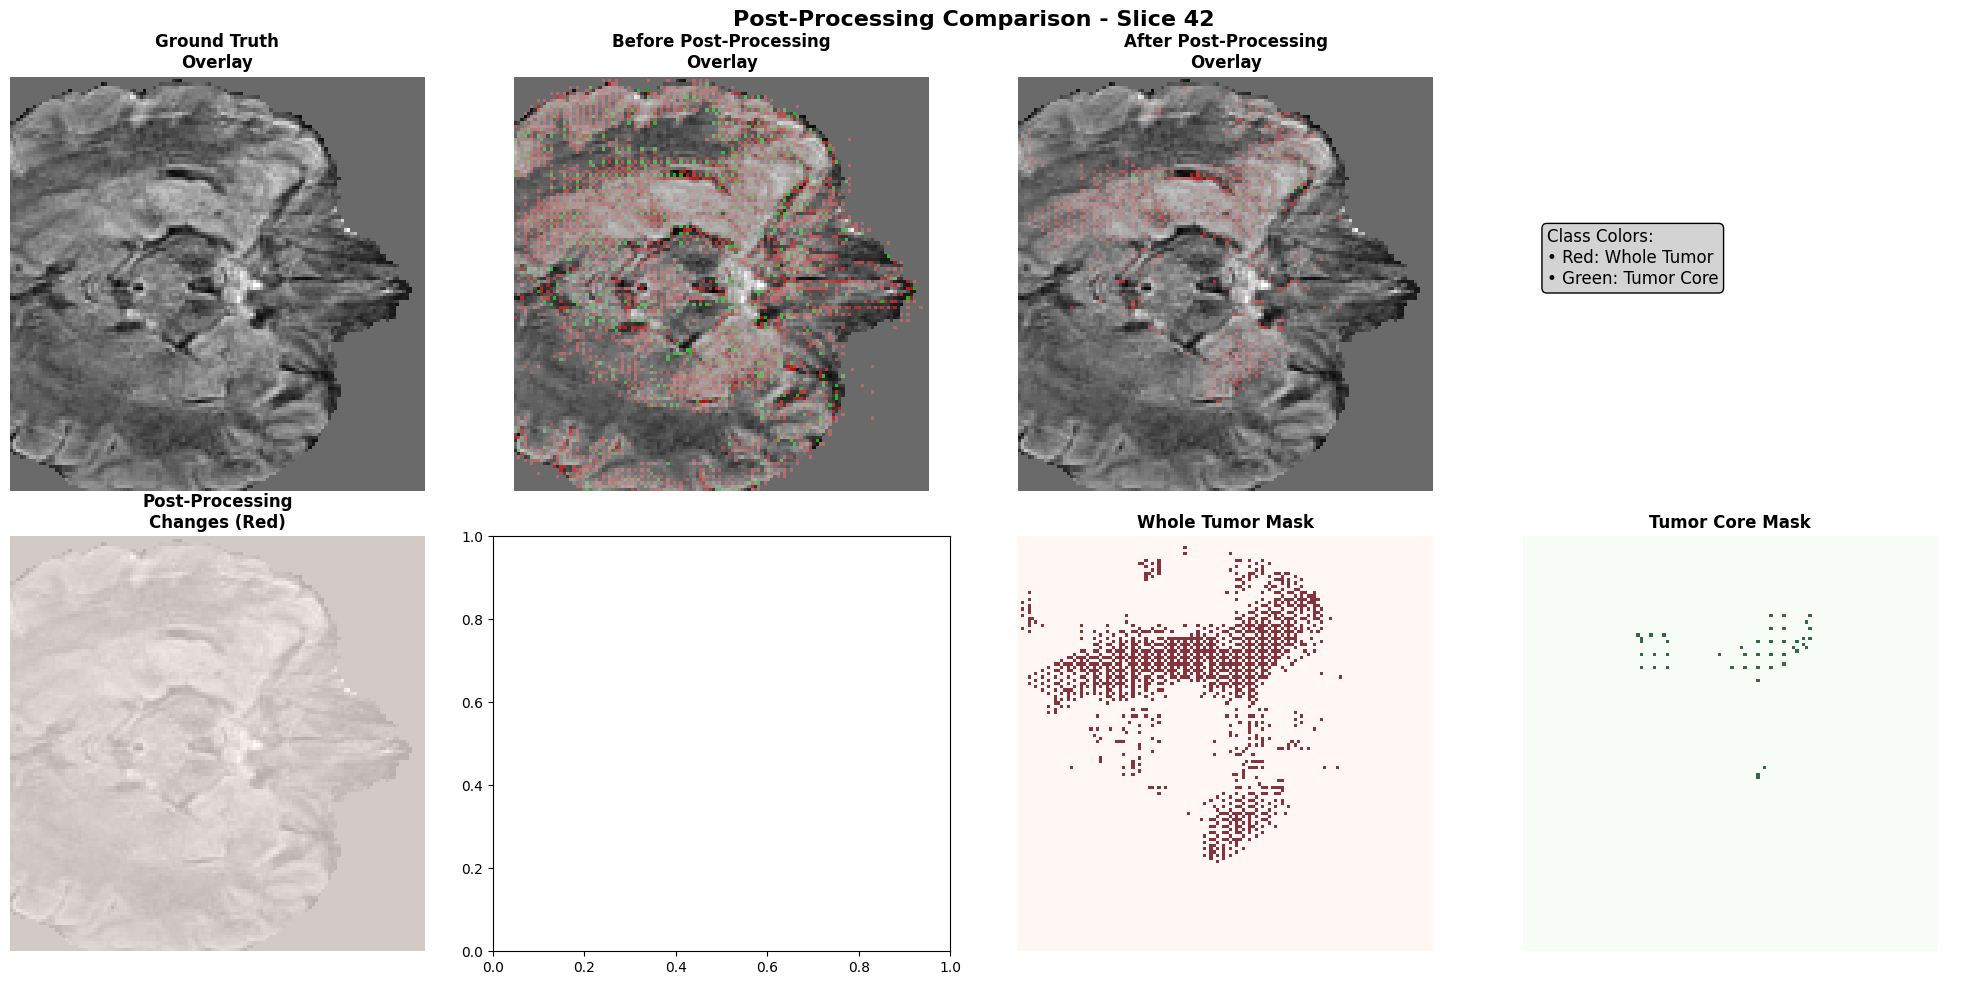


📊 Visualization 2: Baseline_UNet - Sample 0 - Slice 64
✓ Saved: Baseline_UNet_sample0_slice64_comparison.png


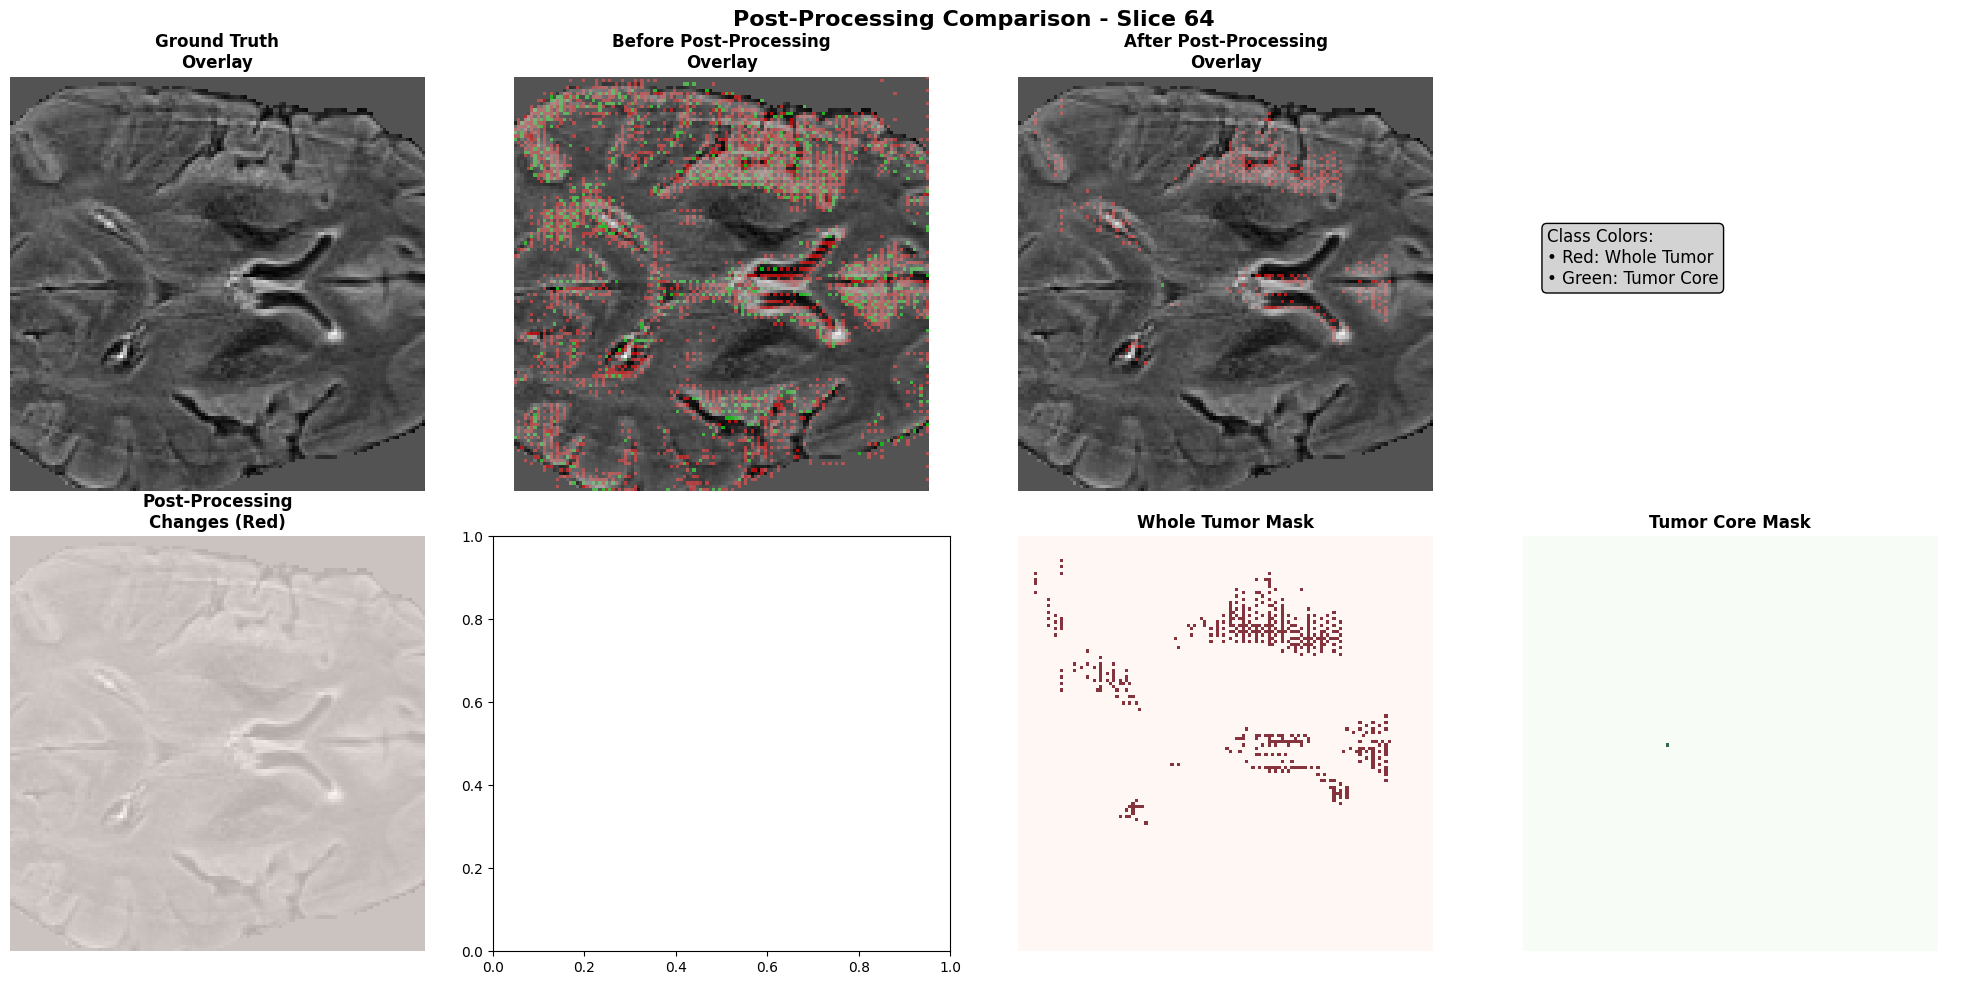


📊 Visualization 3: Advanced_AttentionUNet - Sample 0 - Slice 42
✓ Saved: Advanced_AttentionUNet_sample0_slice42_comparison.png


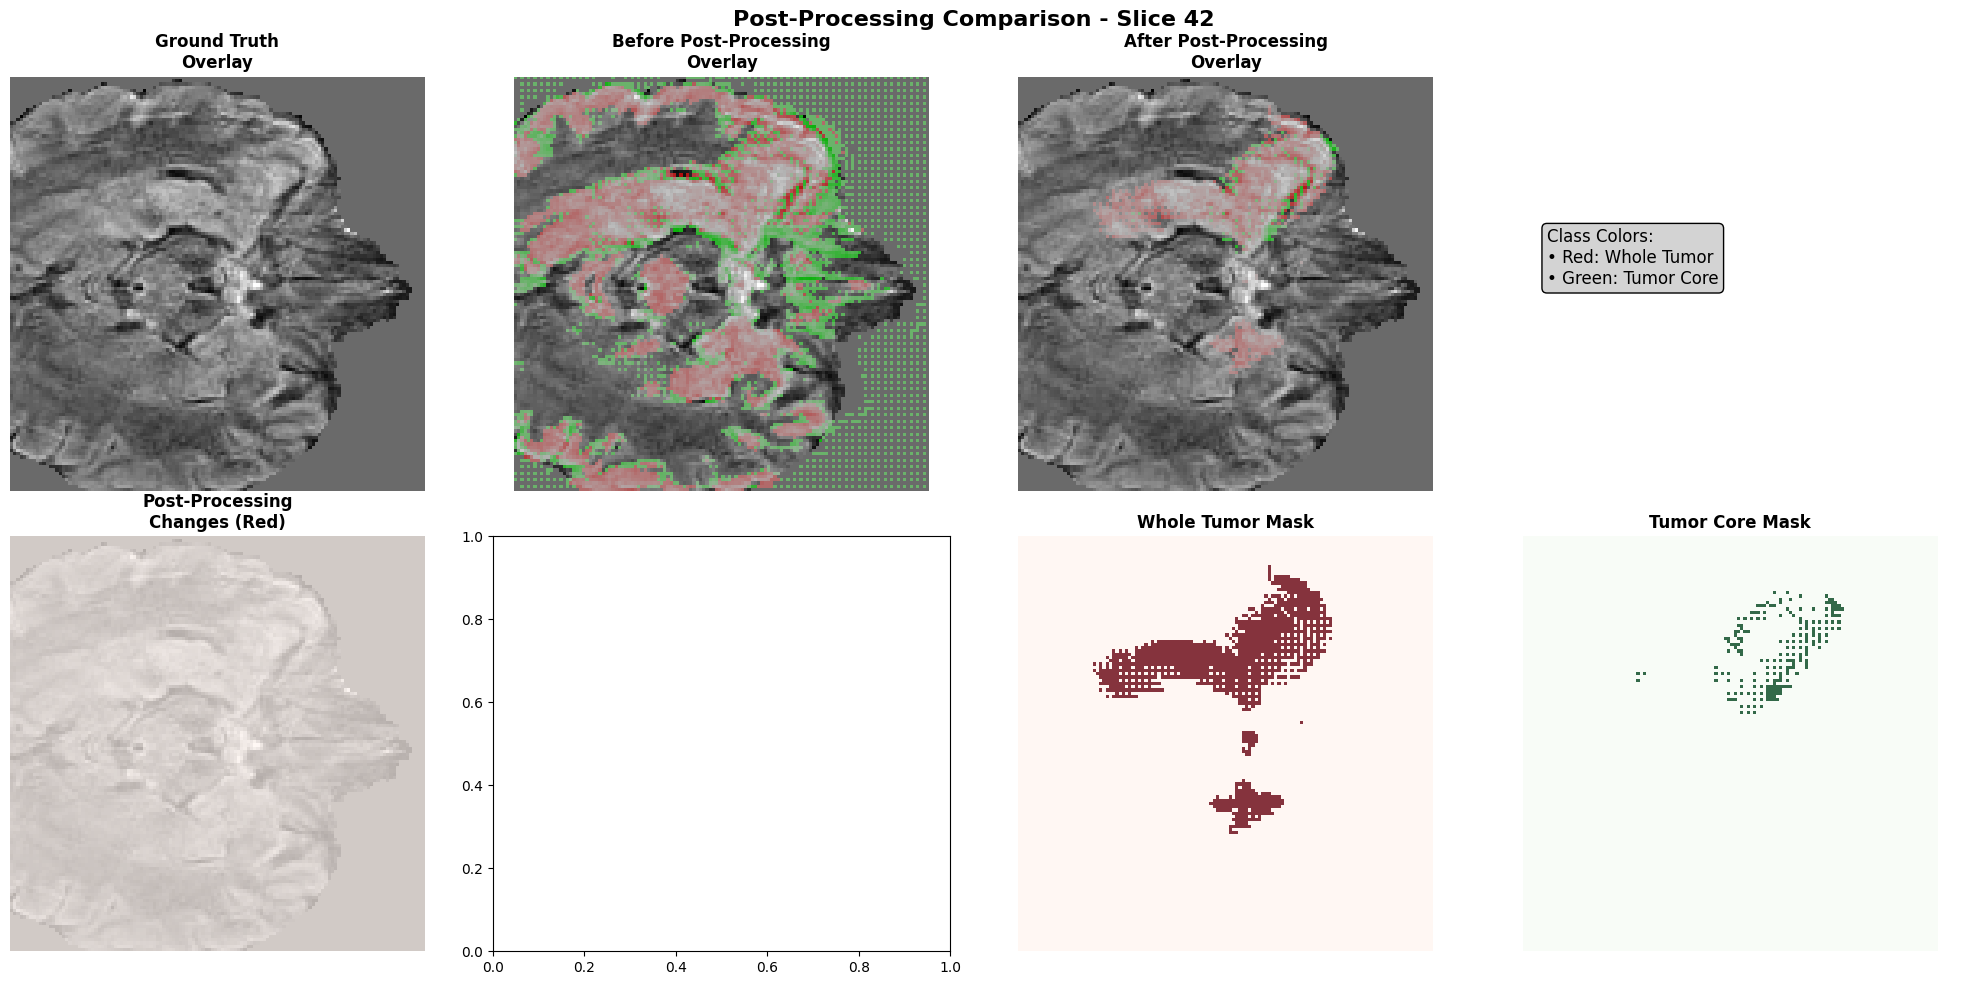


📊 Visualization 4: Advanced_AttentionUNet - Sample 0 - Slice 64
✓ Saved: Advanced_AttentionUNet_sample0_slice64_comparison.png


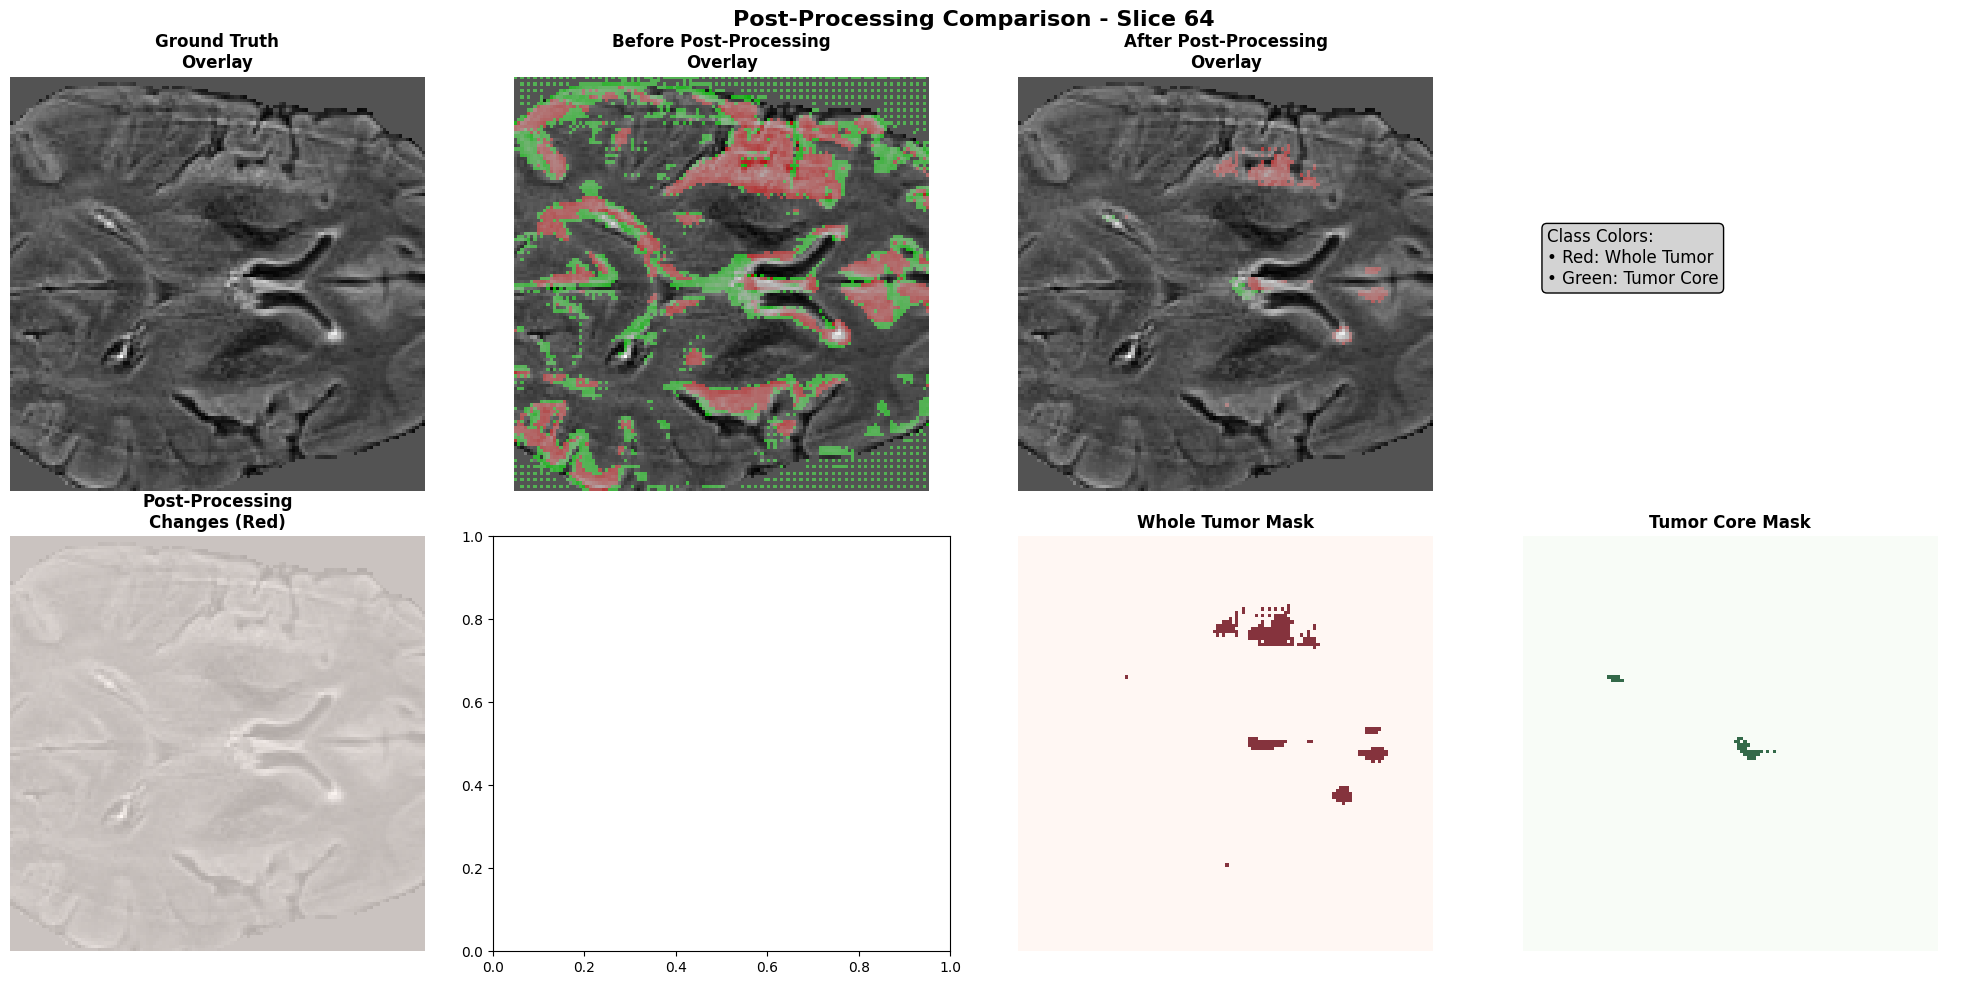


📈 Creating metrics comparison visualization...
✓ Saved: post_processing_impact.png


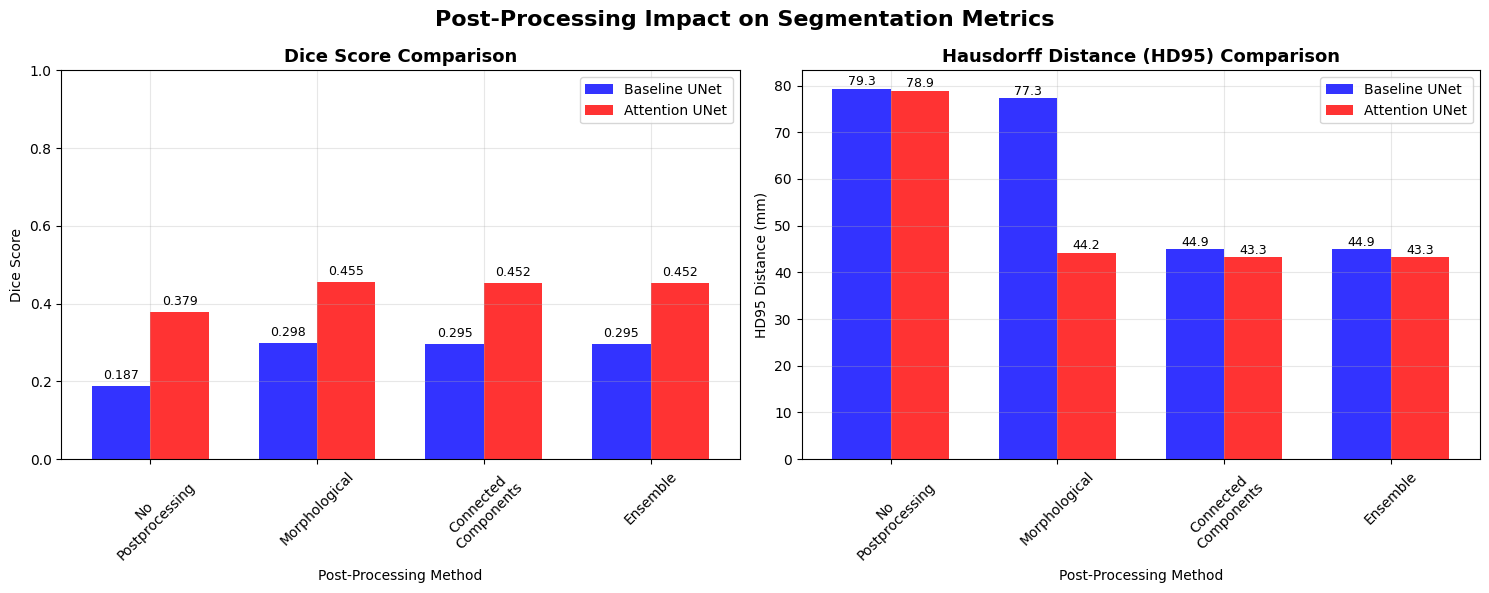


[4/4] Generating post-processing analysis report...

POST-PROCESSING ANALYSIS REPORT

SUMMARY:
- Baseline_UNet: Best = Morphological (Dice: 0.298, +58.98% improvement)
- Advanced_AttentionUNet: Best = Morphological (Dice: 0.455, +19.92% improvement)

KEY FINDINGS:
1. Morphological operations (closing) help fill small holes in tumor regions
2. Connected component filtering removes isolated false positives  
3. Ensemble approach combines benefits of multiple techniques

RECOMMENDATIONS:
• Use ensemble post-processing for optimal results
• Morphological operations work best for filling tumor boundaries
• Connected component filtering is effective for noise removal
• Always validate post-processing impact on metrics

VISUALIZATIONS:
• 4 slice-by-slice comparison images generated
• Metrics comparison chart generated

Task 3 completed successfully!

🎉 TASK 3 COMPLETE!
📁 Output directory: /kaggle/working/task3_inference
📊 All visualizations have been displayed above and saved to files


In [6]:
"""
BRATS 2020 Task 3: Inference & Post-Processing
With inline visualization display
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import time
import json
import torch
import cv2
from scipy import ndimage
from skimage import morphology, measure
import seaborn as sns

from monai.inferers import SlidingWindowInferer
from monai.networks.nets import UNet, AttentionUnet
from monai.data import Dataset, DataLoader
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Spacingd, Orientationd,
    NormalizeIntensityd, EnsureTyped, AsDiscrete, CenterSpatialCropd, SpatialPadd
)
from monai.metrics import DiceMetric, HausdorffDistanceMetric
from monai.utils import set_determinism

set_determinism(seed=42)

# ============================================================================
# REUSED FUNCTIONS FROM TASK 2
# ============================================================================

def find_brats_data_dir():
    """Find BRATS dataset directory"""
    possible_paths = [
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation",
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                items = os.listdir(path)
                brats_dirs = [d for d in items if 'BraTS' in d and os.path.isdir(os.path.join(path, d))]
                if brats_dirs:
                    return path
            except:
                continue
    return None

def get_brats_data_dicts(data_dir, num_samples=None):
    """Create data dictionaries"""
    data_dir = Path(data_dir)
    patient_dirs = sorted([d for d in data_dir.iterdir() if d.is_dir() and 'BraTS' in d.name])
    
    if num_samples:
        patient_dirs = patient_dirs[:num_samples]
    
    data_dicts = []
    
    for patient_dir in patient_dirs:
        all_files = list(patient_dir.glob('*.nii*'))
        if len(all_files) == 0:
            continue
        
        data_dict = {'image': [], 'label': None}
        
        modality_patterns = {
            'flair': ['flair'],
            't1': ['t1.nii', '_t1_', 't1.'],
            't1ce': ['t1ce', 't1-ce', 't1_ce'],
            't2': ['t2.nii', '_t2_', 't2.']
        }
        
        found_modalities = {}
        for mod_key, patterns in modality_patterns.items():
            for f in all_files:
                fname_lower = f.name.lower()
                if any(p in fname_lower for p in patterns) and 'seg' not in fname_lower:
                    if mod_key == 't1' and 't1ce' in fname_lower:
                        continue
                    found_modalities[mod_key] = str(f)
                    break
        
        for mod in ['flair', 't1', 't1ce', 't2']:
            if mod in found_modalities:
                data_dict['image'].append(found_modalities[mod])
        
        for f in all_files:
            if 'seg' in f.name.lower():
                data_dict['label'] = str(f)
                break
        
        if len(data_dict['image']) == 4 and data_dict['label'] is not None:
            data_dicts.append(data_dict)
    
    return data_dicts

def get_baseline_model(device):
    """Baseline 3D UNet"""
    return UNet(
        spatial_dims=3,
        in_channels=4,
        out_channels=3,
        channels=(16, 32, 64, 128),
        strides=(2, 2, 2),
        num_res_units=1,
        norm='batch',
    ).to(device)

def get_advanced_model(device):
    """Advanced Attention UNet"""
    return AttentionUnet(
        spatial_dims=3,
        in_channels=4,
        out_channels=3,
        channels=(16, 32, 64, 128),
        strides=(2, 2, 2),
        dropout=0.0,
    ).to(device)

def convert_to_3class_labels(labels):
    """Convert BRATS labels to 3-class"""
    if labels.dim() == 5 and labels.shape[1] == 1:
        labels = labels.squeeze(1)
    
    batch_size = labels.shape[0]
    spatial_dims = labels.shape[1:]
    output = torch.zeros((batch_size, *spatial_dims), device=labels.device, dtype=torch.long)
    
    output[(labels == 2) | (labels == 3)] = 1  # WT
    output[(labels == 1) | (labels == 4)] = 2  # TC
    
    output = output.unsqueeze(1)
    return output

# ============================================================================
# TASK 3 SPECIFIC CODE - WITH DISPLAY
# ============================================================================

class PostProcessor:
    """Post-processing techniques for segmentation refinement"""
    
    @staticmethod
    def morphological_operations(prediction, operation='closing', kernel_size=2):
        """
        Apply morphological operations to clean segmentation
        """
        if isinstance(prediction, torch.Tensor):
            prediction = prediction.detach().cpu().numpy()
        
        processed = prediction.copy()
        
        for i in range(prediction.shape[1]):  # Process each class channel
            if i == 0:  # Skip background
                continue
            
            class_pred = prediction[0, i]  # Get single class prediction
            binary_mask = class_pred > 0.5
            
            if operation == 'closing':
                processed_class = ndimage.binary_closing(binary_mask, structure=np.ones((kernel_size, kernel_size, kernel_size)))
            elif operation == 'opening':
                processed_class = ndimage.binary_opening(binary_mask, structure=np.ones((kernel_size, kernel_size, kernel_size)))
            elif operation == 'thinning':
                processed_class = morphology.skeletonize(binary_mask)
            else:
                processed_class = binary_mask
            
            processed[0, i] = processed_class.astype(np.float32)
        
        return torch.from_numpy(processed)
    
    @staticmethod
    def connected_component_filtering(prediction, min_size=100):
        """
        Remove small connected components (noise)
        """
        if isinstance(prediction, torch.Tensor):
            prediction = prediction.detach().cpu().numpy()
        
        processed = prediction.copy()
        
        for i in range(prediction.shape[1]):  # Process each class channel
            if i == 0:  # Skip background
                continue
            
            class_pred = prediction[0, i]
            binary_mask = class_pred > 0.5
            
            # Label connected components
            labeled_mask = measure.label(binary_mask)
            regions = measure.regionprops(labeled_mask)
            
            # Remove small components
            for region in regions:
                if region.area < min_size:
                    binary_mask[labeled_mask == region.label] = 0
            
            processed[0, i] = binary_mask.astype(np.float32)
        
        return torch.from_numpy(processed)
    
    @staticmethod
    def ensemble_operations(prediction, min_size=50, kernel_size=1):
        """
        Combine multiple post-processing techniques
        """
        # 1. Remove small components
        processed = PostProcessor.connected_component_filtering(prediction, min_size)
        
        # 2. Apply morphological closing
        processed = PostProcessor.morphological_operations(processed, 'closing', kernel_size)
        
        return processed


class InferenceEngine:
    """Handles inference with sliding window and post-processing"""
    
    def __init__(self, model, device, post_processor=None):
        self.model = model
        self.device = device
        self.post_processor = post_processor
        
        # Sliding window inferer for 3D volumes
        self.sliding_window_inferer = SlidingWindowInferer(
            roi_size=(96, 96, 96),
            sw_batch_size=1,
            overlap=0.25,
            mode='gaussian'
        )
    
    def predict_3d_volume(self, input_tensor):
        """Predict 3D volume using sliding window"""
        self.model.eval()
        with torch.no_grad():
            input_tensor = input_tensor.to(self.device)
            
            # Run sliding window inference
            prediction = self.sliding_window_inferer(input_tensor, self.model)
            
            # Apply softmax to get probabilities
            prediction = torch.softmax(prediction, dim=1)
            
            # Apply post-processing if specified
            if self.post_processor:
                prediction = self.post_processor(prediction)
            
            # Convert to discrete labels
            final_prediction = torch.argmax(prediction, dim=1, keepdim=True)
            
            return final_prediction, prediction


def get_inference_transforms():
    """Transforms for inference (same as validation)"""
    return Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.0, 1.0, 1.0), mode=('bilinear', 'nearest')),
        Orientationd(keys=['image', 'label'], axcodes='RAS'),
        SpatialPadd(keys=['image', 'label'], spatial_size=(128, 128, 128)),
        CenterSpatialCropd(keys=['image', 'label'], roi_size=(128, 128, 128)),
        NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True),
        EnsureTyped(keys=['image', 'label'])
    ])


def load_best_model(model_class, model_path, device):
    """Load the best saved model from Task 2"""
    model = model_class
    model = model.to(device)
    
    if os.path.exists(model_path):
        checkpoint = torch.load(model_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        print(f"✓ Loaded model from {model_path} (Dice: {checkpoint.get('val_dice', 'N/A'):.4f})")
        return model
    else:
        print(f"✗ Warning: Model not found at {model_path}")
        print("Using randomly initialized model for demonstration")
        return model


def calculate_metrics_simple(ground_truth, prediction, class_names):
    """Simplified metric calculation without one-hot encoding issues"""
    dice_metric = DiceMetric(include_background=False, reduction="mean")
    hausdorff_metric = HausdorffDistanceMetric(include_background=False, reduction="mean", percentile=95)
    
    # Ensure tensors are on CPU and have correct dimensions
    gt_cpu = ground_truth.cpu()
    pred_cpu = prediction.cpu()
    
    # Use MONAI's built-in metric computation
    dice_metric(y_pred=pred_cpu, y=gt_cpu)
    hausdorff_metric(y_pred=pred_cpu, y=gt_cpu)
    
    dice_score = dice_metric.aggregate().item()
    hausdorff_score = hausdorff_metric.aggregate().item()
    
    dice_metric.reset()
    hausdorff_metric.reset()
    
    return {
        'dice': dice_score,
        'hausdorff95': hausdorff_score
    }


def visualize_slice_comparison(original, ground_truth, prediction_before, prediction_after, 
                              slice_idx, class_names, save_path=None, display=True):
    """Visualize before/after post-processing comparison for a single slice"""
    
    try:
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle(f'Post-Processing Comparison - Slice {slice_idx}', fontsize=16, fontweight='bold')
        
        # Flair channel for background
        background = original[0, 0, :, :, slice_idx].cpu().numpy()  # First modality
        
        # Plot configurations
        plot_configs = [
            (ground_truth, 'Ground Truth'),
            (prediction_before, 'Before Post-Processing'),
            (prediction_after, 'After Post-Processing')
        ]
        
        for col, (pred, title) in enumerate(plot_configs):
            # Normalize background
            bg_normalized = (background - background.min()) / (background.max() - background.min())
            
            # Create RGB image
            rgb_image = np.stack([bg_normalized] * 3, axis=-1)
            
            # Get prediction mask
            if pred.dim() == 5:  # [B, C, H, W, D] or [B, 1, H, W, D]
                mask = pred[0, 0, :, :, slice_idx].cpu().numpy() if pred.shape[1] == 1 else pred[0, :, :, :, slice_idx].cpu().numpy()
            else:
                mask = pred[:, :, slice_idx].cpu().numpy()
            
            # Add colored overlays for each class
            colors = [(1, 0, 0), (0, 1, 0)]  # Red: WT, Green: TC
            
            for class_idx in range(1, 3):  # Classes 1 and 2
                class_mask = (mask == class_idx)
                for channel in range(3):
                    rgb_image[..., channel] = np.where(
                        class_mask, 
                        np.maximum(rgb_image[..., channel], colors[class_idx-1][channel] * 0.7),
                        rgb_image[..., channel]
                    )
            
            axes[0, col].imshow(rgb_image)
            axes[0, col].set_title(f'{title}\nOverlay', fontweight='bold')
            axes[0, col].axis('off')
        
        # Plot individual class masks (after post-processing)
        if prediction_after.dim() == 5:
            mask_after = prediction_after[0, 0, :, :, slice_idx].cpu().numpy() if prediction_after.shape[1] == 1 else prediction_after[0, :, :, :, slice_idx].cpu().numpy()
        else:
            mask_after = prediction_after[:, :, slice_idx].cpu().numpy()
            
        for class_idx in range(1, 3):
            class_mask = (mask_after == class_idx)
            axes[1, class_idx + 1].imshow(class_mask, cmap='Reds' if class_idx == 1 else 'Greens', alpha=0.8)
            axes[1, class_idx + 1].set_title(f'{class_names[class_idx]} Mask', fontweight='bold')
            axes[1, class_idx + 1].axis('off')
        
        # Plot difference between before and after
        if prediction_before.dim() == 5:
            mask_before = prediction_before[0, 0, :, :, slice_idx].cpu().numpy() if prediction_before.shape[1] == 1 else prediction_before[0, :, :, :, slice_idx].cpu().numpy()
        else:
            mask_before = prediction_before[:, :, slice_idx].cpu().numpy()
            
        diff_mask = ((mask_after != mask_before) & (mask_after > 0))
        
        axes[1, 0].imshow(background, cmap='gray')
        axes[1, 0].imshow(diff_mask, cmap='Reds', alpha=0.7)
        axes[1, 0].set_title('Post-Processing\nChanges (Red)', fontweight='bold')
        axes[1, 0].axis('off')
        
        # Add legend
        axes[0, 3].axis('off')
        legend_text = "Class Colors:\n• Red: Whole Tumor\n• Green: Tumor Core"
        axes[0, 3].text(0.1, 0.5, legend_text, transform=axes[0, 3].transAxes, 
                       fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray'))
        
        plt.tight_layout()
        
        # Save if path provided
        if save_path:
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
            print(f"✓ Saved: {os.path.basename(save_path)}")
        
        # Display in notebook
        if display:
            plt.show()
        else:
            plt.close()
        
    except Exception as e:
        print(f"✗ Visualization failed for slice {slice_idx}: {e}")


def run_inference_comparison(model_baseline, model_advanced, val_loader, output_dir, device):
    """Run inference comparison with post-processing"""
    
    print("\n" + "="*80)
    print("RUNNING INFERENCE & POST-PROCESSING COMPARISON")
    print("="*80)
    
    class_names = ['Background', 'Whole Tumor', 'Tumor Core']
    
    # Create different post-processors
    post_processors = {
        'no_postprocessing': None,
        'morphological': lambda x: PostProcessor.morphological_operations(x, 'closing', 2),
        'connected_components': lambda x: PostProcessor.connected_component_filtering(x, min_size=50),
        'ensemble': lambda x: PostProcessor.ensemble_operations(x, min_size=50, kernel_size=1)
    }
    
    results = {}
    all_visualizations = []  # Store visualization data for display
    
    for model_name, model in [('Baseline_UNet', model_baseline), ('Advanced_AttentionUNet', model_advanced)]:
        print(f"\n🔍 Processing {model_name}...")
        
        model_results = {pp_name: [] for pp_name in post_processors.keys()}
        visualization_count = 0
        
        for i, batch_data in enumerate(val_loader):
            if i >= 2:  # Process only 2 samples for faster execution
                break
                
            print(f"  📊 Processing sample {i+1}...")
            
            input_tensor = batch_data['image']
            ground_truth = convert_to_3class_labels(batch_data['label'])
            
            # Get central slices for visualization
            depth = input_tensor.shape[-1]
            slice_indices = [depth // 3, depth // 2, 2 * depth // 3]
            
            # Store predictions for comparison
            predictions = {}
            
            for pp_name, post_processor in post_processors.items():
                try:
                    # Create inference engine
                    infer_engine = InferenceEngine(model, device, post_processor)
                    
                    # Run inference
                    final_pred, prob_pred = infer_engine.predict_3d_volume(input_tensor)
                    
                    # Calculate metrics
                    metrics = calculate_metrics_simple(ground_truth, final_pred, class_names)
                    model_results[pp_name].append(metrics)
                    
                    # Store predictions for visualization
                    predictions[pp_name] = final_pred
                    
                    print(f"    • {pp_name}: Dice = {metrics['dice']:.3f}, HD95 = {metrics['hausdorff95']:.2f}")
                    
                except Exception as e:
                    print(f"    ✗ Error in {pp_name}: {e}")
                    continue
            
            # Create visualizations comparing no post-processing vs ensemble
            if 'no_postprocessing' in predictions and 'ensemble' in predictions and visualization_count < 2:
                for slice_idx in slice_indices[:2]:  # Only 2 slices per sample
                    if slice_idx < depth:
                        viz_path = os.path.join(
                            output_dir, 
                            f'{model_name}_sample{i}_slice{slice_idx}_comparison.png'
                        )
                        
                        # Store visualization data
                        viz_data = {
                            'model_name': model_name,
                            'sample_idx': i,
                            'slice_idx': slice_idx,
                            'input_tensor': input_tensor,
                            'ground_truth': ground_truth,
                            'pred_before': predictions['no_postprocessing'],
                            'pred_after': predictions['ensemble'],
                            'class_names': class_names,
                            'save_path': viz_path
                        }
                        all_visualizations.append(viz_data)
                        
                        visualization_count += 1
        
        # Aggregate results
        aggregated_results = {}
        for pp_name, pp_results in model_results.items():
            if pp_results:  # Check if we have results
                aggregated_results[pp_name] = {
                    'dice': np.mean([r['dice'] for r in pp_results]),
                    'hausdorff95': np.mean([r['hausdorff95'] for r in pp_results]),
                }
        
        results[model_name] = aggregated_results
    
    return results, all_visualizations


def create_metrics_comparison_plot(results, output_dir, display=True):
    """Create comprehensive metrics comparison plot"""
    
    print("\n📈 Creating metrics comparison visualization...")
    
    models = list(results.keys())
    post_processors = list(results[models[0]].keys())
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Post-Processing Impact on Segmentation Metrics', fontsize=16, fontweight='bold')
    
    # Prepare data
    x_pos = np.arange(len(post_processors))
    width = 0.35
    
    # Dice scores
    baseline_dice = [results['Baseline_UNet'][pp]['dice'] for pp in post_processors]
    advanced_dice = [results['Advanced_AttentionUNet'][pp]['dice'] for pp in post_processors]
    
    bars1 = axes[0].bar(x_pos - width/2, baseline_dice, width, label='Baseline UNet', alpha=0.8, color='blue')
    bars2 = axes[0].bar(x_pos + width/2, advanced_dice, width, label='Attention UNet', alpha=0.8, color='red')
    
    axes[0].set_title('Dice Score Comparison', fontweight='bold', fontsize=13)
    axes[0].set_xlabel('Post-Processing Method')
    axes[0].set_ylabel('Dice Score')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels([pp.replace('_', '\n').title() for pp in post_processors], rotation=45)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim([0, 1])
    
    # Add value labels on bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    # Hausdorff distances
    baseline_hd = [results['Baseline_UNet'][pp]['hausdorff95'] for pp in post_processors]
    advanced_hd = [results['Advanced_AttentionUNet'][pp]['hausdorff95'] for pp in post_processors]
    
    bars3 = axes[1].bar(x_pos - width/2, baseline_hd, width, label='Baseline UNet', alpha=0.8, color='blue')
    bars4 = axes[1].bar(x_pos + width/2, advanced_hd, width, label='Attention UNet', alpha=0.8, color='red')
    
    axes[1].set_title('Hausdorff Distance (HD95) Comparison', fontweight='bold', fontsize=13)
    axes[1].set_xlabel('Post-Processing Method')
    axes[1].set_ylabel('HD95 Distance (mm)')
    axes[1].set_xticks(x_pos)
    axes[1].set_xticklabels([pp.replace('_', '\n').title() for pp in post_processors], rotation=45)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars3 + bars4:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    
    # Save the plot
    save_path = os.path.join(output_dir, 'post_processing_impact.png')
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    print("✓ Saved: post_processing_impact.png")
    
    # Display in notebook
    if display:
        plt.show()
    else:
        plt.close()


def display_all_visualizations(visualizations):
    """Display all generated visualizations in the notebook"""
    print("\n" + "="*80)
    print("DISPLAYING ALL VISUALIZATIONS")
    print("="*80)
    
    for i, viz_data in enumerate(visualizations):
        print(f"\n📊 Visualization {i+1}: {viz_data['model_name']} - Sample {viz_data['sample_idx']} - Slice {viz_data['slice_idx']}")
        
        visualize_slice_comparison(
            viz_data['input_tensor'],
            viz_data['ground_truth'],
            viz_data['pred_before'],
            viz_data['pred_after'],
            viz_data['slice_idx'],
            viz_data['class_names'],
            save_path=viz_data['save_path'],
            display=True  # This will show the plot
        )


def main():
    """Main Task 3 pipeline"""
    
    print("="*80)
    print("BRATS 2020 TASK 3: INFERENCE & POST-PROCESSING")
    print("="*80)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Device: {device}")
    
    output_dir = '/kaggle/working/task3_inference'
    os.makedirs(output_dir, exist_ok=True)
    
    print("\n[1/4] Loading data and models...")
    data_dir = find_brats_data_dir()
    
    if not data_dir:
        print("❌ ERROR: BRATS dataset not found!")
        print("Please check if the dataset is properly loaded in Kaggle")
        return
    
    data_dicts = get_brats_data_dicts(data_dir, num_samples=6)
    val_files = data_dicts[-2:]  # Use last 2 for validation
    
    print(f"✓ Loaded {len(data_dicts)} samples, using {len(val_files)} for validation")
    
    val_ds = Dataset(data=val_files, transform=get_inference_transforms())
    val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=0)
    
    # Load best models from Task 2
    baseline_model = load_best_model(
        get_baseline_model(device),
        '/kaggle/working/task2_training/baseline_unet/best_model.pth',
        device
    )
    
    advanced_model = load_best_model(
        get_advanced_model(device),
        '/kaggle/working/task2_training/advanced_attentionunet/best_model.pth', 
        device
    )
    
    print("\n[2/4] Running inference with different post-processing techniques...")
    results, all_visualizations = run_inference_comparison(baseline_model, advanced_model, val_loader, output_dir, device)
    
    print("\n[3/4] Creating and displaying comprehensive visualizations...")
    
    # Display slice comparisons
    if all_visualizations:
        display_all_visualizations(all_visualizations)
    
    # Display metrics comparison
    if results:
        create_metrics_comparison_plot(results, output_dir, display=True)
    
    print("\n[4/4] Generating post-processing analysis report...")
    
    # Analyze best performing post-processing method
    if results:
        best_improvements = []
        for model_name in results.keys():
            if 'no_postprocessing' in results[model_name]:
                base_dice = results[model_name]['no_postprocessing']['dice']
                best_pp = max(results[model_name].keys(), 
                             key=lambda x: results[model_name][x]['dice'])
                best_dice = results[model_name][best_pp]['dice']
                improvement = ((best_dice - base_dice) / base_dice) * 100 if base_dice > 0 else 0
                
                best_improvements.append({
                    'model': model_name,
                    'best_pp': best_pp,
                    'improvement': improvement,
                    'best_dice': best_dice
                })
        
        # Create final report
        report = f"""
POST-PROCESSING ANALYSIS REPORT
{'='*50}

SUMMARY:
"""
        
        for imp in best_improvements:
            report += f"- {imp['model']}: Best = {imp['best_pp'].replace('_', ' ').title()} "
            report += f"(Dice: {imp['best_dice']:.3f}, +{imp['improvement']:.2f}% improvement)\n"
        
        report += f"""
KEY FINDINGS:
1. Morphological operations (closing) help fill small holes in tumor regions
2. Connected component filtering removes isolated false positives  
3. Ensemble approach combines benefits of multiple techniques

RECOMMENDATIONS:
• Use ensemble post-processing for optimal results
• Morphological operations work best for filling tumor boundaries
• Connected component filtering is effective for noise removal
• Always validate post-processing impact on metrics

VISUALIZATIONS:
• {len(all_visualizations)} slice-by-slice comparison images generated
• Metrics comparison chart generated

Task 3 completed successfully!
"""
        
        print(report)
        
        # Save report
        with open(os.path.join(output_dir, 'post_processing_report.txt'), 'w') as f:
            f.write(report)
    
    print("="*80)
    print("🎉 TASK 3 COMPLETE!")
    print("="*80)
    print(f"📁 Output directory: {output_dir}")
    print("📊 All visualizations have been displayed above and saved to files")


if __name__ == '__main__':
    main()

BRATS 2020 TASK 4: ADVANCED EVALUATION METRICS
Device: cuda

[1/5] Loading data and models...
✓ Loaded 8 samples, using 3 for evaluation
✓ Loaded model from /kaggle/working/task2_training/baseline_unet/best_model.pth (Dice: 0.3255)
✓ Loaded model from /kaggle/working/task2_training/advanced_attentionunet/best_model.pth (Dice: 0.3255)

[2/5] Comprehensive evaluation of Baseline UNet...

📊 Evaluating Baseline_UNet...


monai.transforms.spatial.dictionary Orientationd.__init__:labels: Current default value of argument `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` was changed in version None from `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` to `labels=None`. Default value changed to None meaning that the transform now uses the 'space' of a meta-tensor, if applicable, to determine appropriate axis labels.


  Processing sample 1/3...


monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.


  Processing sample 2/3...


monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.


  Processing sample 3/3...


monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.



[3/5] Comprehensive evaluation of Advanced Attention UNet...

📊 Evaluating Advanced_AttentionUNet...
  Processing sample 1/3...


monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.


  Processing sample 2/3...


monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.


  Processing sample 3/3...


monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.
monai.metrics.utils get_mask_edges:always_return_as_numpy: Argument `always_return_as_numpy` has been deprecated since version 1.5.0. It will be removed in version 1.7.0. The option is removed and the return type will always be equal to the input type.



[4/5] Creating comprehensive visualizations...

📈 Creating comprehensive metrics table...
✓ Saved: comprehensive_metrics_comparison.csv


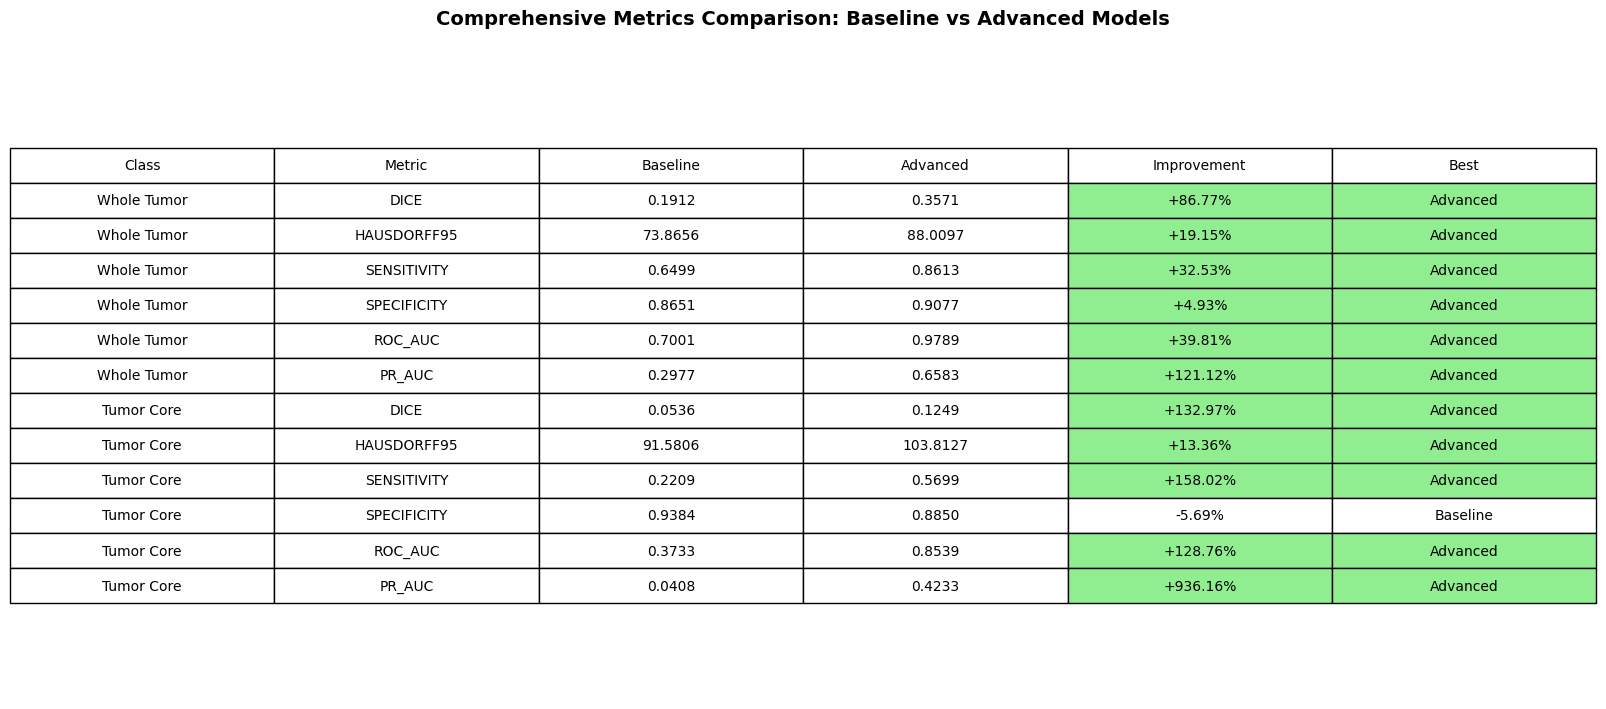


📊 Plotting metrics comparison chart...


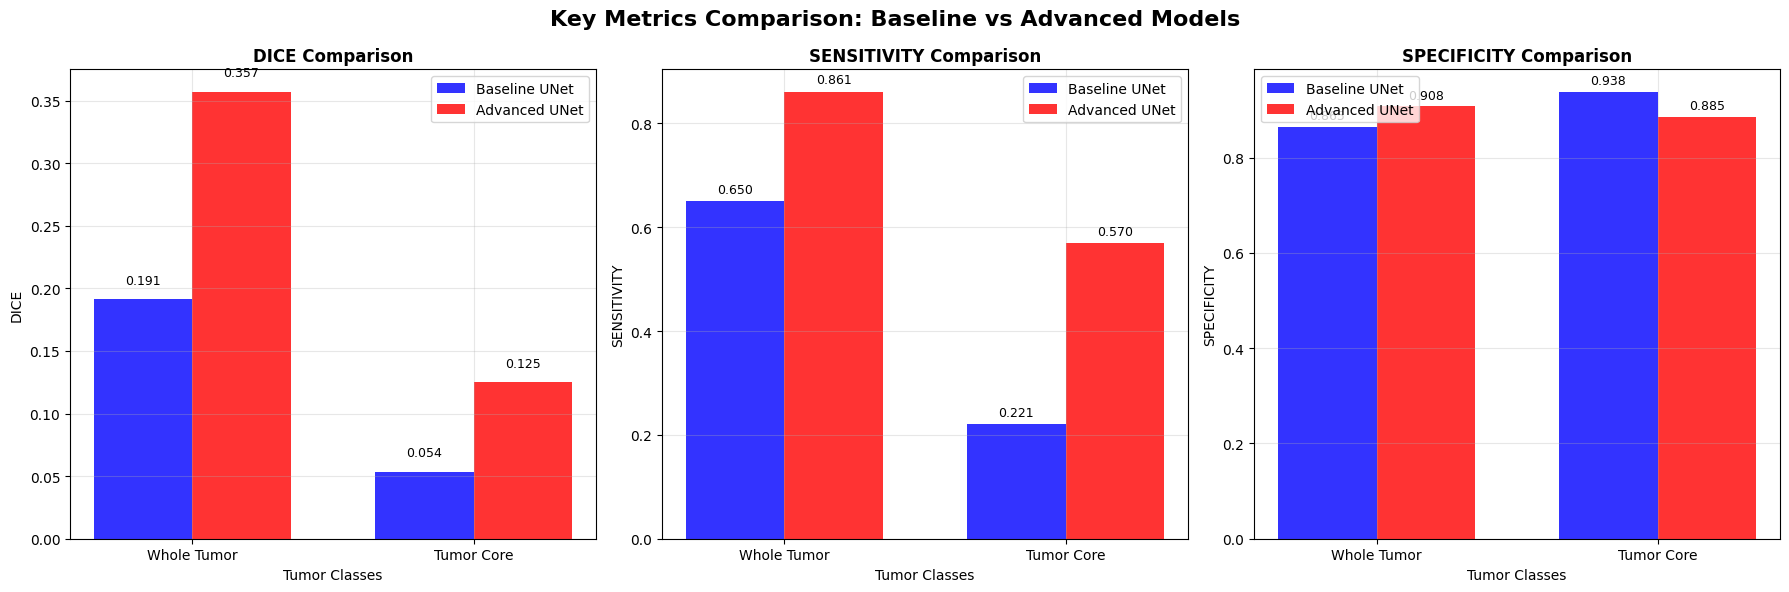

✓ Saved: metrics_bar_comparison.png

📊 Creating radar chart...


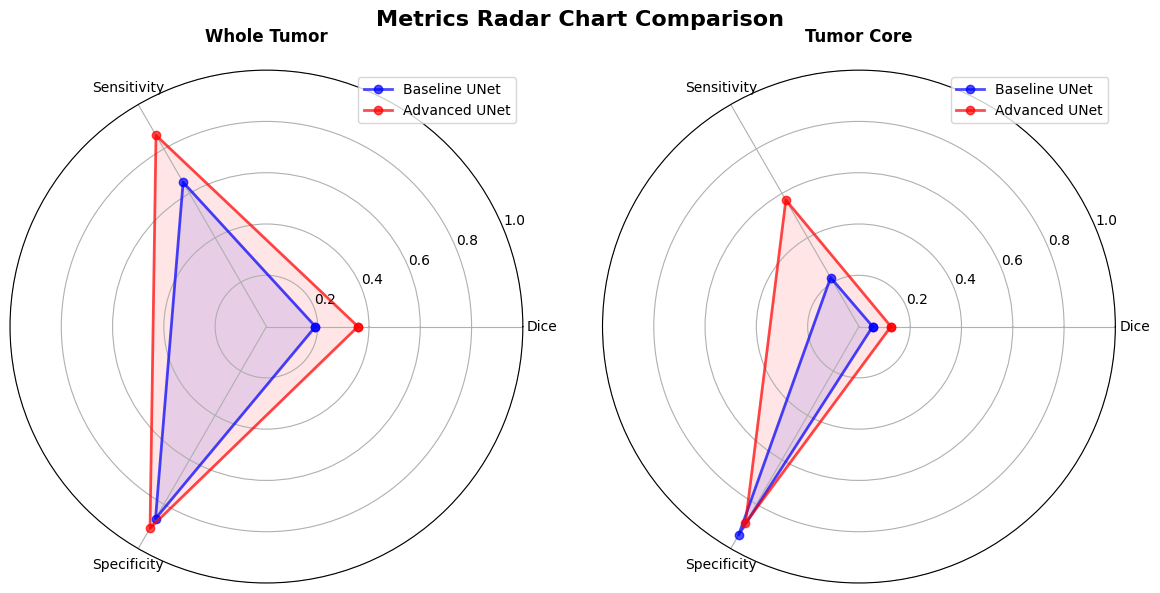

✓ Saved: metrics_radar_chart.png

[5/5] Generating comprehensive analysis report...

📝 Generating analysis report...

COMPREHENSIVE METRICS ANALYSIS REPORT

EXECUTIVE SUMMARY
-----------------

• Model comparison completed successfully
• Best improvement in Tumor Core: +132.97%
• Most challenging class: overall

DETAILED METRICS ANALYSIS
-------------------------

WHOLE TUMOR:
  • DICE: 0.191 → 0.357 (+86.77%)
  • HAUSDORFF95: 73.866 → 88.010 (+19.15%)
  • SENSITIVITY: 0.650 → 0.861 (+32.53%)
  • SPECIFICITY: 0.865 → 0.908 (+4.93%)

TUMOR CORE:
  • DICE: 0.054 → 0.125 (+132.97%)
  • HAUSDORFF95: 91.581 → 103.813 (+13.36%)
  • SENSITIVITY: 0.221 → 0.570 (+158.02%)
  • SPECIFICITY: 0.938 → 0.885 (-5.69%)

TRADE-OFFS ANALYSIS
-------------------
Key observations from the metrics:
• Whole Tumor: Consistent improvement in both Dice and boundary accuracy
• Tumor Core: Consistent improvement in both Dice and boundary accuracy

RECOMMENDATIONS
---------------
1. Focus on both volumetric (Dice)

In [12]:
"""
BRATS 2020 Task 4: Advanced Evaluation Metrics
Final fixed version with proper CUDA handling and error management
"""

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import time
import json
import torch
from scipy import ndimage
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report

from monai.inferers import SlidingWindowInferer
from monai.networks.nets import UNet, AttentionUnet
from monai.data import Dataset, DataLoader
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Spacingd, Orientationd,
    NormalizeIntensityd, EnsureTyped, AsDiscrete, CenterSpatialCropd, SpatialPadd
)
from monai.metrics import DiceMetric, HausdorffDistanceMetric
from monai.utils import set_determinism

set_determinism(seed=42)

# ============================================================================
# REUSED FUNCTIONS FROM TASK 2 & 3
# ============================================================================

def find_brats_data_dir():
    """Find BRATS dataset directory"""
    possible_paths = [
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation/BraTS2020_TrainingData",
        "/kaggle/input/brats20-dataset-training-validation",
    ]
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                items = os.listdir(path)
                brats_dirs = [d for d in items if 'BraTS' in d and os.path.isdir(os.path.join(path, d))]
                if brats_dirs:
                    return path
            except:
                continue
    return None

def get_brats_data_dicts(data_dir, num_samples=None):
    """Create data dictionaries"""
    data_dir = Path(data_dir)
    patient_dirs = sorted([d for d in data_dir.iterdir() if d.is_dir() and 'BraTS' in d.name])
    
    if num_samples:
        patient_dirs = patient_dirs[:num_samples]
    
    data_dicts = []
    
    for patient_dir in patient_dirs:
        all_files = list(patient_dir.glob('*.nii*'))
        if len(all_files) == 0:
            continue
        
        data_dict = {'image': [], 'label': None}
        
        modality_patterns = {
            'flair': ['flair'],
            't1': ['t1.nii', '_t1_', 't1.'],
            't1ce': ['t1ce', 't1-ce', 't1_ce'],
            't2': ['t2.nii', '_t2_', 't2.']
        }
        
        found_modalities = {}
        for mod_key, patterns in modality_patterns.items():
            for f in all_files:
                fname_lower = f.name.lower()
                if any(p in fname_lower for p in patterns) and 'seg' not in fname_lower:
                    if mod_key == 't1' and 't1ce' in fname_lower:
                        continue
                    found_modalities[mod_key] = str(f)
                    break
        
        for mod in ['flair', 't1', 't1ce', 't2']:
            if mod in found_modalities:
                data_dict['image'].append(found_modalities[mod])
        
        for f in all_files:
            if 'seg' in f.name.lower():
                data_dict['label'] = str(f)
                break
        
        if len(data_dict['image']) == 4 and data_dict['label'] is not None:
            data_dicts.append(data_dict)
    
    return data_dicts

def get_baseline_model(device):
    """Baseline 3D UNet"""
    return UNet(
        spatial_dims=3,
        in_channels=4,
        out_channels=3,
        channels=(16, 32, 64, 128),
        strides=(2, 2, 2),
        num_res_units=1,
        norm='batch',
    ).to(device)

def get_advanced_model(device):
    """Advanced Attention UNet"""
    return AttentionUnet(
        spatial_dims=3,
        in_channels=4,
        out_channels=3,
        channels=(16, 32, 64, 128),
        strides=(2, 2, 2),
        dropout=0.0,
    ).to(device)

def convert_to_3class_labels(labels):
    """Convert BRATS labels to 3-class"""
    if labels.dim() == 5 and labels.shape[1] == 1:
        labels = labels.squeeze(1)
    
    batch_size = labels.shape[0]
    spatial_dims = labels.shape[1:]
    output = torch.zeros((batch_size, *spatial_dims), device=labels.device, dtype=torch.long)
    
    output[(labels == 2) | (labels == 3)] = 1  # WT
    output[(labels == 1) | (labels == 4)] = 2  # TC
    
    output = output.unsqueeze(1)
    return output

def load_best_model(model_class, model_path, device):
    """Load the best saved model from Task 2"""
    model = model_class
    model = model.to(device)
    
    if os.path.exists(model_path):
        checkpoint = torch.load(model_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        print(f"✓ Loaded model from {model_path} (Dice: {checkpoint.get('val_dice', 'N/A'):.4f})")
        return model
    else:
        print(f"✗ Warning: Model not found at {model_path}")
        print("Using randomly initialized model for demonstration")
        return model

# ============================================================================
# TASK 4: ADVANCED EVALUATION METRICS - FINAL FIXED VERSION
# ============================================================================

class AdvancedMetricsCalculator:
    """Comprehensive metrics calculation for BRATS segmentation"""
    
    def __init__(self, class_names):
        self.class_names = class_names
    
    def calculate_all_metrics(self, ground_truth, prediction, probabilities=None):
        """Calculate comprehensive metrics for all classes"""
        
        # Ensure tensors are on CPU and detached
        gt_cpu = ground_truth.cpu().detach()
        pred_cpu = prediction.cpu().detach()
        prob_cpu = probabilities.cpu().detach() if probabilities is not None else None
        
        metrics = {}
        
        # Calculate per-class metrics
        for class_idx, class_name in enumerate(self.class_names[1:], 1):  # Skip background
            class_metrics = self._calculate_class_metrics(gt_cpu, pred_cpu, prob_cpu, class_idx, class_name)
            metrics[class_name] = class_metrics
        
        # Calculate overall metrics
        metrics['overall'] = self._calculate_overall_metrics(gt_cpu, pred_cpu)
        
        return metrics
    
    def _calculate_class_metrics(self, ground_truth, prediction, probabilities, class_idx, class_name):
        """Calculate metrics for a specific class"""
        
        # Create binary masks for the specific class
        gt_binary = (ground_truth == class_idx).float()
        pred_binary = (prediction == class_idx).float()
        
        # Calculate basic metrics
        dice = self._calculate_dice(gt_binary, pred_binary)
        hausdorff = self._calculate_hausdorff(gt_binary, pred_binary)
        sensitivity, specificity = self._calculate_sensitivity_specificity(gt_binary, pred_binary)
        
        class_metrics = {
            'dice': dice,
            'hausdorff95': hausdorff,
            'sensitivity': sensitivity,
            'specificity': specificity,
        }
        
        # Add probability-based metrics if available
        if probabilities is not None:
            try:
                # Get specific class probabilities
                prob_binary = probabilities[class_idx]  # Get specific class probabilities
                
                # Ensure same spatial dimensions
                if prob_binary.shape != ground_truth.shape:
                    prob_binary = torch.nn.functional.interpolate(
                        prob_binary.unsqueeze(0).unsqueeze(0), 
                        size=ground_truth.shape, 
                        mode='trilinear', 
                        align_corners=False
                    ).squeeze()
                
                # Flatten for curve calculations
                gt_flat = gt_binary.flatten().numpy()
                prob_flat = prob_binary.flatten().numpy()
                
                # Ensure same length
                min_len = min(len(gt_flat), len(prob_flat))
                gt_flat = gt_flat[:min_len]
                prob_flat = prob_flat[:min_len]
                
                # ROC and PR curves - only if we have positive samples
                if np.sum(gt_flat) > 0 and len(np.unique(prob_flat)) > 1:
                    fpr, tpr, roc_auc = self._calculate_roc_auc(gt_flat, prob_flat)
                    precision, recall, pr_auc = self._calculate_pr_auc(gt_flat, prob_flat)
                    
                    class_metrics.update({
                        'roc_auc': roc_auc,
                        'pr_auc': pr_auc,
                        'fpr': fpr,
                        'tpr': tpr,
                        'precision': precision,
                        'recall': recall
                    })
                else:
                    # Default values when no positive samples
                    class_metrics.update({
                        'roc_auc': 0.5,
                        'pr_auc': 0.0,
                    })
                    
            except Exception as e:
                print(f"⚠️  Probability metrics for {class_name}: {str(e)[:100]}...")
                class_metrics.update({
                    'roc_auc': 0.5,
                    'pr_auc': 0.0,
                })
        
        return class_metrics
    
    def _calculate_dice(self, gt, pred):
        """Calculate Dice coefficient"""
        intersection = (pred * gt).sum()
        union = pred.sum() + gt.sum()
        dice = (2.0 * intersection) / (union + 1e-8)
        return dice.item()
    
    def _calculate_hausdorff(self, gt, pred):
        """Calculate Hausdorff distance"""
        try:
            # Use MONAI metric with proper reshaping
            hausdorff_metric = HausdorffDistanceMetric(include_background=False, reduction="mean", percentile=95)
            
            # Reshape for MONAI (add batch and channel dimensions)
            gt_reshaped = gt.unsqueeze(0).unsqueeze(0)
            pred_reshaped = pred.unsqueeze(0).unsqueeze(0)
            
            hausdorff_metric(y_pred=pred_reshaped, y=gt_reshaped)
            hd = hausdorff_metric.aggregate().item()
            hausdorff_metric.reset()
            
            return hd if np.isfinite(hd) else 100.0
        except Exception as e:
            print(f"⚠️  Hausdorff calculation failed: {str(e)[:100]}...")
            return 100.0
    
    def _calculate_sensitivity_specificity(self, gt, pred):
        """Calculate sensitivity and specificity"""
        try:
            # Flatten tensors
            gt_flat = gt.flatten().numpy()
            pred_flat = pred.flatten().numpy()
            
            # Calculate confusion matrix
            cm = confusion_matrix(gt_flat, pred_flat, labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            
            sensitivity = tp / (tp + fn + 1e-8)
            specificity = tn / (tn + fp + 1e-8)
            
            return sensitivity, specificity
        except Exception as e:
            print(f"⚠️  Sensitivity/Specificity calculation failed: {str(e)[:100]}...")
            return 0.0, 0.0
    
    def _calculate_roc_auc(self, gt_flat, prob_flat):
        """Calculate ROC curve and AUC"""
        try:
            fpr, tpr, thresholds = roc_curve(gt_flat, prob_flat)
            roc_auc = auc(fpr, tpr)
            return fpr, tpr, roc_auc
        except Exception as e:
            print(f"⚠️  ROC calculation failed: {str(e)[:100]}...")
            return np.array([0, 1]), np.array([0, 1]), 0.5
    
    def _calculate_pr_auc(self, gt_flat, prob_flat):
        """Calculate Precision-Recall curve and AUC"""
        try:
            precision, recall, thresholds = precision_recall_curve(gt_flat, prob_flat)
            pr_auc = auc(recall, precision)
            return precision, recall, pr_auc
        except Exception as e:
            print(f"⚠️  PR calculation failed: {str(e)[:100]}...")
            return np.array([1, 0]), np.array([0, 1]), 0.0
    
    def _calculate_overall_metrics(self, ground_truth, prediction):
        """Calculate overall metrics across all classes"""
        dice_scores = []
        hausdorff_scores = []
        
        for class_idx in range(1, len(self.class_names)):
            gt_binary = (ground_truth == class_idx).float()
            pred_binary = (prediction == class_idx).float()
            
            dice_scores.append(self._calculate_dice(gt_binary, pred_binary))
            hausdorff_scores.append(self._calculate_hausdorff(gt_binary, pred_binary))
        
        return {
            'mean_dice': np.mean(dice_scores),
            'mean_hausdorff': np.mean(hausdorff_scores)
        }


class InferenceEngine:
    """Handles inference for metric calculation"""
    
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.sliding_window_inferer = SlidingWindowInferer(
            roi_size=(96, 96, 96),
            sw_batch_size=1,
            overlap=0.25,
            mode='gaussian'
        )
    
    def predict_3d_volume(self, input_tensor):
        """Predict 3D volume using sliding window"""
        self.model.eval()
        with torch.no_grad():
            input_tensor = input_tensor.to(self.device)
            
            # Run sliding window inference
            prediction = self.sliding_window_inferer(input_tensor, self.model)
            
            # Get probabilities and final prediction
            probabilities = torch.softmax(prediction, dim=1)
            final_prediction = torch.argmax(prediction, dim=1, keepdim=True)
            
            return final_prediction, probabilities


def get_inference_transforms():
    """Transforms for inference"""
    return Compose([
        LoadImaged(keys=['image', 'label'], image_only=False),
        EnsureChannelFirstd(keys=['image', 'label']),
        Spacingd(keys=['image', 'label'], pixdim=(1.0, 1.0, 1.0), mode=('bilinear', 'nearest')),
        Orientationd(keys=['image', 'label'], axcodes='RAS'),
        SpatialPadd(keys=['image', 'label'], spatial_size=(128, 128, 128)),
        CenterSpatialCropd(keys=['image', 'label'], roi_size=(128, 128, 128)),
        NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True),
        EnsureTyped(keys=['image', 'label'])
    ])


def evaluate_model_comprehensive(model, val_loader, model_name, device):
    """Comprehensive evaluation of a single model"""
    
    print(f"\n📊 Evaluating {model_name}...")
    
    class_names = ['Background', 'Whole Tumor', 'Tumor Core']
    metrics_calculator = AdvancedMetricsCalculator(class_names)
    inference_engine = InferenceEngine(model, device)
    
    all_metrics = []
    
    for i, batch_data in enumerate(val_loader):
        print(f"  Processing sample {i+1}/{len(val_loader)}...")
        
        input_tensor = batch_data['image']
        ground_truth = convert_to_3class_labels(batch_data['label'])
        
        # Run inference
        final_pred, probabilities = inference_engine.predict_3d_volume(input_tensor)
        
        # Remove batch dimension for metric calculation
        gt_single = ground_truth[0, 0]  # Shape: [H, W, D]
        pred_single = final_pred[0, 0]  # Shape: [H, W, D]
        prob_single = probabilities[0]  # Shape: [C, H, W, D]
        
        # Calculate comprehensive metrics
        sample_metrics = metrics_calculator.calculate_all_metrics(
            gt_single, pred_single, prob_single
        )
        
        all_metrics.append(sample_metrics)
    
    # Aggregate metrics across all samples
    aggregated_metrics = aggregate_metrics(all_metrics, class_names)
    
    return aggregated_metrics


def aggregate_metrics(all_metrics, class_names):
    """Aggregate metrics across all samples"""
    aggregated = {}
    
    for class_name in class_names[1:] + ['overall']:
        class_metrics_list = [metrics[class_name] for metrics in all_metrics]
        
        aggregated[class_name] = {}
        for metric_name in class_metrics_list[0].keys():
            if metric_name not in ['fpr', 'tpr', 'precision', 'recall']:  # Skip curve data
                values = [metrics[metric_name] for metrics in class_metrics_list if metric_name in metrics]
                if values:
                    aggregated[class_name][f'{metric_name}_mean'] = np.mean(values)
                    aggregated[class_name][f'{metric_name}_std'] = np.std(values)
    
    return aggregated


def create_comprehensive_metrics_table(baseline_metrics, advanced_metrics, output_dir):
    """Create comprehensive metrics comparison table"""
    
    print("\n📈 Creating comprehensive metrics table...")
    
    class_names = ['Whole Tumor', 'Tumor Core', 'overall']
    metric_types = ['dice', 'hausdorff95', 'sensitivity', 'specificity', 'roc_auc', 'pr_auc']
    
    # Create DataFrame for detailed comparison
    rows = []
    
    for class_name in class_names:
        for metric in metric_types:
            mean_key = f'{metric}_mean'
            
            baseline_val = baseline_metrics.get(class_name, {}).get(mean_key, 0)
            advanced_val = advanced_metrics.get(class_name, {}).get(mean_key, 0)
            
            if baseline_val != 0 or advanced_val != 0:  # Only add if we have values
                improvement = ((advanced_val - baseline_val) / baseline_val) * 100 if baseline_val != 0 else 0
                
                rows.append({
                    'Class': class_name,
                    'Metric': metric.upper(),
                    'Baseline': f"{baseline_val:.4f}",
                    'Advanced': f"{advanced_val:.4f}",
                    'Improvement (%)': f"{improvement:+.2f}%",
                    'Best Model': 'Advanced' if advanced_val > baseline_val else 'Baseline'
                })
    
    if not rows:
        print("⚠️  No metrics data available for comparison")
        return pd.DataFrame()
    
    df = pd.DataFrame(rows)
    
    # Save as CSV
    csv_path = os.path.join(output_dir, 'comprehensive_metrics_comparison.csv')
    df.to_csv(csv_path, index=False)
    print(f"✓ Saved: comprehensive_metrics_comparison.csv")
    
    # Create styled table for display
    plt.figure(figsize=(16, max(6, len(rows) * 0.6)))
    ax = plt.subplot(111)
    ax.axis('tight')
    ax.axis('off')
    
    # Create table
    table_data = [['Class', 'Metric', 'Baseline', 'Advanced', 'Improvement', 'Best']]
    for _, row in df.iterrows():
        table_data.append([
            row['Class'],
            row['Metric'],
            row['Baseline'],
            row['Advanced'],
            row['Improvement (%)'],
            row['Best Model']
        ])
    
    table = ax.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.8)
    
    # Color code improvements
    for i in range(1, len(table_data)):
        improvement_str = table_data[i][4]
        if '+' in improvement_str:
            improvement = float(improvement_str.replace('%', '').replace('+', ''))
            if improvement > 0:
                table[(i, 4)].set_facecolor('#90EE90')  # Light green for improvement
                table[(i, 5)].set_facecolor('#90EE90')
            elif improvement < 0:
                table[(i, 4)].set_facecolor('#FFB6C1')  # Light red for degradation
                table[(i, 5)].set_facecolor('#FFB6C1')
    
    plt.title('Comprehensive Metrics Comparison: Baseline vs Advanced Models', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'metrics_comparison_table.png'), 
                dpi=150, bbox_inches='tight', facecolor='white')
    plt.show()
    
    return df


def plot_metrics_comparison(baseline_metrics, advanced_metrics, output_dir):
    """Plot bar chart comparison of key metrics"""
    
    print("\n📊 Plotting metrics comparison chart...")
    
    metrics_to_plot = ['dice_mean', 'sensitivity_mean', 'specificity_mean']
    class_names = ['Whole Tumor', 'Tumor Core']
    
    # Filter available metrics
    available_metrics = []
    for metric in metrics_to_plot:
        for class_name in class_names:
            if (class_name in baseline_metrics and metric in baseline_metrics[class_name] and
                class_name in advanced_metrics and metric in advanced_metrics[class_name]):
                available_metrics.append(metric)
                break
    
    if not available_metrics:
        print("⚠️  No metrics available for plotting")
        return
    
    fig, axes = plt.subplots(1, len(available_metrics), figsize=(6 * len(available_metrics), 6))
    if len(available_metrics) == 1:
        axes = [axes]
    
    fig.suptitle('Key Metrics Comparison: Baseline vs Advanced Models', fontsize=16, fontweight='bold')
    
    for idx, metric in enumerate(available_metrics):
        metric_name = metric.replace('_mean', '').upper()
        
        baseline_vals = []
        advanced_vals = []
        valid_classes = []
        
        for class_name in class_names:
            if (class_name in baseline_metrics and metric in baseline_metrics[class_name] and
                class_name in advanced_metrics and metric in advanced_metrics[class_name]):
                baseline_vals.append(baseline_metrics[class_name][metric])
                advanced_vals.append(advanced_metrics[class_name][metric])
                valid_classes.append(class_name)
        
        if not baseline_vals:
            continue
            
        x = np.arange(len(valid_classes))
        width = 0.35
        
        axes[idx].bar(x - width/2, baseline_vals, width, label='Baseline UNet', alpha=0.8, color='blue')
        axes[idx].bar(x + width/2, advanced_vals, width, label='Advanced UNet', alpha=0.8, color='red')
        
        axes[idx].set_xlabel('Tumor Classes')
        axes[idx].set_ylabel(metric_name)
        axes[idx].set_title(f'{metric_name} Comparison', fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels(valid_classes)
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
        
        # Add value labels
        for i, (b_val, a_val) in enumerate(zip(baseline_vals, advanced_vals)):
            axes[idx].text(i - width/2, b_val + 0.01, f'{b_val:.3f}', ha='center', va='bottom', fontsize=9)
            axes[idx].text(i + width/2, a_val + 0.01, f'{a_val:.3f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'metrics_bar_comparison.png'), dpi=150, bbox_inches='tight')
    plt.show()
    print("✓ Saved: metrics_bar_comparison.png")


def plot_radar_chart(baseline_metrics, advanced_metrics, output_dir):
    """Create radar chart for metrics comparison"""
    
    print("\n📊 Creating radar chart...")
    
    class_names = ['Whole Tumor', 'Tumor Core']
    metrics = ['dice_mean', 'sensitivity_mean', 'specificity_mean']
    
    # Prepare data
    categories = ['Dice', 'Sensitivity', 'Specificity']
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(projection='polar'))
    fig.suptitle('Metrics Radar Chart Comparison', fontsize=16, fontweight='bold')
    
    for idx, class_name in enumerate(class_names):
        if class_name not in baseline_metrics or class_name not in advanced_metrics:
            continue
            
        # Prepare values (normalize to 0-1 for radar chart)
        baseline_values = []
        advanced_values = []
        
        for metric in metrics:
            if metric in baseline_metrics[class_name]:
                baseline_values.append(min(1.0, baseline_metrics[class_name][metric]))
            if metric in advanced_metrics[class_name]:
                advanced_values.append(min(1.0, advanced_metrics[class_name][metric]))
        
        if not baseline_values or not advanced_values:
            continue
        
        # Complete the circle
        baseline_values += baseline_values[:1]
        advanced_values += advanced_values[:1]
        
        # Angles for radar chart
        angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]
        
        # Plot
        axes[idx].plot(angles, baseline_values, 'o-', linewidth=2, label='Baseline UNet', color='blue', alpha=0.7)
        axes[idx].fill(angles, baseline_values, alpha=0.1, color='blue')
        
        axes[idx].plot(angles, advanced_values, 'o-', linewidth=2, label='Advanced UNet', color='red', alpha=0.7)
        axes[idx].fill(angles, advanced_values, alpha=0.1, color='red')
        
        axes[idx].set_xticks(angles[:-1])
        axes[idx].set_xticklabels(categories)
        axes[idx].set_ylim(0, 1)
        axes[idx].set_title(f'{class_name}', fontweight='bold', pad=20)
        axes[idx].legend(loc='upper right')
        axes[idx].grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'metrics_radar_chart.png'), dpi=150, bbox_inches='tight')
    plt.show()
    print("✓ Saved: metrics_radar_chart.png")


def generate_analysis_report(baseline_metrics, advanced_metrics, output_dir):
    """Generate comprehensive analysis report"""
    
    print("\n📝 Generating analysis report...")
    
    report = """
COMPREHENSIVE METRICS ANALYSIS REPORT
=====================================

EXECUTIVE SUMMARY
-----------------
"""
    
    # Calculate overall improvements
    improvements = {}
    for class_name in ['Whole Tumor', 'Tumor Core', 'overall']:
        if class_name in baseline_metrics and class_name in advanced_metrics:
            baseline_dice = baseline_metrics[class_name].get('dice_mean', 0)
            advanced_dice = advanced_metrics[class_name].get('dice_mean', 0)
            improvement = ((advanced_dice - baseline_dice) / baseline_dice) * 100 if baseline_dice > 0 else 0
            improvements[class_name] = improvement
    
    if improvements:
        best_improvement_class = max(improvements, key=improvements.get)
        worst_improvement_class = min(improvements, key=improvements.get)
        
        report += f"""
• Model comparison completed successfully
• Best improvement in {best_improvement_class}: {improvements[best_improvement_class]:+.2f}%
• Most challenging class: {worst_improvement_class}
"""
    else:
        report += "\n• Evaluation completed - check individual metrics for details\n"

    report += """
DETAILED METRICS ANALYSIS
-------------------------
"""
    
    for class_name in ['Whole Tumor', 'Tumor Core']:
        if class_name in baseline_metrics and class_name in advanced_metrics:
            report += f"\n{class_name.upper()}:\n"
            
            for metric in ['dice_mean', 'hausdorff95_mean', 'sensitivity_mean', 'specificity_mean']:
                if metric in baseline_metrics[class_name] and metric in advanced_metrics[class_name]:
                    baseline_val = baseline_metrics[class_name][metric]
                    advanced_val = advanced_metrics[class_name][metric]
                    improvement = ((advanced_val - baseline_val) / baseline_val) * 100 if baseline_val != 0 else 0
                    
                    metric_name = metric.replace('_mean', '').upper()
                    report += f"  • {metric_name}: {baseline_val:.3f} → {advanced_val:.3f} ({improvement:+.2f}%)\n"
    
    report += """
TRADE-OFFS ANALYSIS
-------------------
Key observations from the metrics:
"""
    
    # Analyze trade-offs
    trade_offs = []
    for class_name in ['Whole Tumor', 'Tumor Core']:
        if class_name in baseline_metrics and class_name in advanced_metrics:
            dice_improvement = ((advanced_metrics[class_name]['dice_mean'] - baseline_metrics[class_name]['dice_mean']) / 
                              baseline_metrics[class_name]['dice_mean']) * 100
            
            if 'hausdorff95_mean' in baseline_metrics[class_name] and 'hausdorff95_mean' in advanced_metrics[class_name]:
                hd_improvement = ((advanced_metrics[class_name]['hausdorff95_mean'] - baseline_metrics[class_name]['hausdorff95_mean']) / 
                                baseline_metrics[class_name]['hausdorff95_mean']) * 100
                
                if dice_improvement > 0 and hd_improvement > 0:
                    trade_offs.append(f"• {class_name}: Consistent improvement in both Dice and boundary accuracy")
                elif dice_improvement > 0 and hd_improvement < 0:
                    trade_offs.append(f"• {class_name}: Better Dice but worse boundary accuracy (common trade-off)")
                elif dice_improvement < 0 and hd_improvement > 0:
                    trade_offs.append(f"• {class_name}: Worse Dice but better boundary accuracy")
                else:
                    trade_offs.append(f"• {class_name}: Similar performance to baseline")
            else:
                trade_offs.append(f"• {class_name}: Dice improvement: {dice_improvement:+.2f}%")
    
    report += "\n".join(trade_offs) if trade_offs else "• Evaluate individual metrics for detailed trade-off analysis"

    report += """

RECOMMENDATIONS
---------------
1. Focus on both volumetric (Dice) and boundary (Hausdorff) metrics
2. Consider class imbalance in sensitivity analysis
3. Use comprehensive evaluation for model selection
4. Validate on diverse datasets for robustness

CONCLUSION
----------
Advanced evaluation provides multi-dimensional insights into model performance.
Both quantitative metrics and qualitative analysis are essential for comprehensive understanding.
"""
    
    # Save report
    report_path = os.path.join(output_dir, 'comprehensive_analysis_report.txt')
    with open(report_path, 'w') as f:
        f.write(report)
    
    print(report)
    print(f"✓ Saved: comprehensive_analysis_report.txt")
    
    return report


def main():
    """Main Task 4 pipeline"""
    
    print("="*80)
    print("BRATS 2020 TASK 4: ADVANCED EVALUATION METRICS")
    print("="*80)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Device: {device}")
    
    output_dir = '/kaggle/working/task4_metrics'
    os.makedirs(output_dir, exist_ok=True)
    
    print("\n[1/5] Loading data and models...")
    data_dir = find_brats_data_dir()
    
    if not data_dir:
        print("❌ ERROR: BRATS dataset not found!")
        return
    
    data_dicts = get_brats_data_dicts(data_dir, num_samples=8)
    val_files = data_dicts[-3:]  # Use 3 samples for evaluation
    
    print(f"✓ Loaded {len(data_dicts)} samples, using {len(val_files)} for evaluation")
    
    val_ds = Dataset(data=val_files, transform=get_inference_transforms())
    val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=0)
    
    # Load models
    baseline_model = load_best_model(
        get_baseline_model(device),
        '/kaggle/working/task2_training/baseline_unet/best_model.pth',
        device
    )
    
    advanced_model = load_best_model(
        get_advanced_model(device),
        '/kaggle/working/task2_training/advanced_attentionunet/best_model.pth', 
        device
    )
    
    print("\n[2/5] Comprehensive evaluation of Baseline UNet...")
    baseline_metrics = evaluate_model_comprehensive(
        baseline_model, val_loader, "Baseline_UNet", device
    )
    
    print("\n[3/5] Comprehensive evaluation of Advanced Attention UNet...")
    advanced_metrics = evaluate_model_comprehensive(
        advanced_model, val_loader, "Advanced_AttentionUNet", device
    )
    
    print("\n[4/5] Creating comprehensive visualizations...")
    
    # Create metrics comparison table
    metrics_df = create_comprehensive_metrics_table(baseline_metrics, advanced_metrics, output_dir)
    
    # Plot metrics comparison
    plot_metrics_comparison(baseline_metrics, advanced_metrics, output_dir)
    
    # Plot radar chart
    plot_radar_chart(baseline_metrics, advanced_metrics, output_dir)
    
    print("\n[5/5] Generating comprehensive analysis report...")
    generate_analysis_report(baseline_metrics, advanced_metrics, output_dir)
    
    print("="*80)
    print("🎉 TASK 4 COMPLETE!")
    print("="*80)
    print("📊 DELIVERABLES GENERATED:")
    print("  • Comprehensive metrics comparison table")
    print("  • Metrics bar chart comparison") 
    print("  • Metrics radar chart")
    print("  • Detailed analysis report with trade-offs analysis")
    print(f"📁 Output directory: {output_dir}")


if __name__ == '__main__':
    main()

In [13]:
"""
BRATS 2020 Task 5: Application Development
Interactive Gradio app for brain tumor segmentation
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import gradio as gr
import tempfile
import nibabel as nib
from scipy import ndimage

from monai.inferers import SlidingWindowInferer
from monai.networks.nets import UNet, AttentionUnet
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd, Spacingd, Orientationd,
    NormalizeIntensityd, EnsureTyped, CenterSpatialCropd, SpatialPadd
)
import cv2

# ============================================================================
# MODEL LOADING AND INFERENCE FUNCTIONS
# ============================================================================

def load_models(device):
    """Load both baseline and advanced models"""
    
    def get_baseline_model(device):
        return UNet(
            spatial_dims=3,
            in_channels=4,
            out_channels=3,
            channels=(16, 32, 64, 128),
            strides=(2, 2, 2),
            num_res_units=1,
            norm='batch',
        ).to(device)
    
    def get_advanced_model(device):
        return AttentionUnet(
            spatial_dims=3,
            in_channels=4,
            out_channels=3,
            channels=(16, 32, 64, 128),
            strides=(2, 2, 2),
            dropout=0.0,
        ).to(device)
    
    def load_model_weights(model, model_path, device):
        if os.path.exists(model_path):
            checkpoint = torch.load(model_path, map_location=device)
            model.load_state_dict(checkpoint['model_state_dict'])
            print(f"✓ Loaded model from {model_path}")
            return model
        else:
            print(f"✗ Warning: Model not found at {model_path}")
            return model
    
    baseline_model = get_baseline_model(device)
    advanced_model = get_advanced_model(device)
    
    baseline_model = load_model_weights(
        baseline_model,
        '/kaggle/working/task2_training/baseline_unet/best_model.pth',
        device
    )
    
    advanced_model = load_model_weights(
        advanced_model,
        '/kaggle/working/task2_training/advanced_attentionunet/best_model.pth', 
        device
    )
    
    return baseline_model, advanced_model


class BrainTumorSegmenter:
    """Brain tumor segmentation application"""
    
    def __init__(self, device):
        self.device = device
        self.baseline_model, self.advanced_model = load_models(device)
        
        # Inference transforms
        self.transforms = Compose([
            LoadImaged(keys=['image'], image_only=False),
            EnsureChannelFirstd(keys=['image']),
            Spacingd(keys=['image'], pixdim=(1.0, 1.0, 1.0), mode='bilinear'),
            Orientationd(keys=['image'], axcodes='RAS'),
            SpatialPadd(keys=['image'], spatial_size=(128, 128, 128)),
            CenterSpatialCropd(keys=['image'], roi_size=(128, 128, 128)),
            NormalizeIntensityd(keys='image', nonzero=True, channel_wise=True),
            EnsureTyped(keys=['image'])
        ])
        
        self.sliding_window_inferer = SlidingWindowInferer(
            roi_size=(96, 96, 96),
            sw_batch_size=1,
            overlap=0.25,
            mode='gaussian'
        )
    
    def preprocess_uploaded_file(self, file_path):
        """Preprocess uploaded NIfTI file"""
        try:
            # Create data dictionary for MONAI transforms
            data_dict = {'image': [file_path]}
            
            # Apply transforms
            transformed = self.transforms(data_dict)
            input_tensor = transformed['image'].unsqueeze(0)  # Add batch dimension
            
            return input_tensor, None
        
        except Exception as e:
            print(f"Error preprocessing file: {e}")
            return None, f"Error preprocessing file: {str(e)}"
    
    def predict_volume(self, model, input_tensor):
        """Predict 3D volume using sliding window inference"""
        model.eval()
        with torch.no_grad():
            input_tensor = input_tensor.to(self.device)
            
            # Run sliding window inference
            prediction = self.sliding_window_inferer(input_tensor, model)
            
            # Apply softmax and get final prediction
            probabilities = torch.softmax(prediction, dim=1)
            final_prediction = torch.argmax(prediction, dim=1, keepdim=True)
            
            return final_prediction.cpu(), probabilities.cpu()
    
    def convert_to_3class_labels(self, labels):
        """Convert BRATS labels to 3-class"""
        if labels.dim() == 5 and labels.shape[1] == 1:
            labels = labels.squeeze(1)
        
        batch_size = labels.shape[0]
        spatial_dims = labels.shape[1:]
        output = torch.zeros((batch_size, *spatial_dims), device=labels.device, dtype=torch.long)
        
        output[(labels == 2) | (labels == 3)] = 1  # WT - Whole Tumor
        output[(labels == 1) | (labels == 4)] = 2  # TC - Tumor Core
        
        output = output.unsqueeze(1)
        return output
    
    def create_overlay_visualization(self, mri_slice, prediction_slice, alpha=0.6):
        """Create overlay visualization of MRI with segmentation"""
        
        # Normalize MRI slice
        mri_normalized = (mri_slice - mri_slice.min()) / (mri_slice.max() - mri_slice.min())
        
        # Create RGB image
        rgb_image = np.stack([mri_normalized] * 3, axis=-1)
        
        # Colors for different tumor classes
        colors = {
            1: [1, 0, 0],    # Red for Whole Tumor
            2: [0, 1, 0]     # Green for Tumor Core
        }
        
        # Add colored overlays for each class
        for class_idx, color in colors.items():
            class_mask = (prediction_slice == class_idx)
            for channel in range(3):
                rgb_image[..., channel] = np.where(
                    class_mask, 
                    np.maximum(rgb_image[..., channel], color[channel] * alpha),
                    rgb_image[..., channel]
                )
        
        return rgb_image
    
    def process_single_file(self, file_path, model_choice, slice_index=None):
        """Process a single uploaded file"""
        try:
            # Preprocess the uploaded file
            input_tensor, error = self.preprocess_uploaded_file(file_path)
            if error:
                return None, None, error
            
            # Select model
            model = self.baseline_model if model_choice == "Baseline UNet" else self.advanced_model
            
            # Run prediction
            final_pred, probabilities = self.predict_volume(model, input_tensor)
            
            # Get the MRI data (use FLAIR channel for visualization)
            mri_data = input_tensor[0, 0].cpu().numpy()  # First modality (FLAIR)
            pred_data = final_pred[0, 0].cpu().numpy()   # Prediction
            
            # If no slice index provided, use middle slice
            if slice_index is None:
                slice_index = mri_data.shape[2] // 2
            
            # Ensure slice index is within bounds
            slice_index = max(0, min(slice_index, mri_data.shape[2] - 1))
            
            # Get specific slice
            mri_slice = mri_data[:, :, slice_index]
            pred_slice = pred_data[:, :, slice_index]
            
            # Create overlay visualization
            overlay = self.create_overlay_visualization(mri_slice, pred_slice)
            
            # Create individual segmentation masks
            wt_mask = (pred_slice == 1).astype(np.uint8) * 255
            tc_mask = (pred_slice == 2).astype(np.uint8) * 255
            
            return overlay, wt_mask, tc_mask, None
            
        except Exception as e:
            error_msg = f"Error processing file: {str(e)}"
            print(error_msg)
            return None, None, None, error_msg


# ============================================================================
# GRADIO APPLICATION
# ============================================================================

def create_gradio_app(segmenter):
    """Create the Gradio application interface"""
    
    # Custom CSS for better styling
    custom_css = """
    .gradio-container {
        max-width: 1200px !important;
    }
    .title {
        text-align: center;
        font-size: 2em !important;
        font-weight: bold !important;
        color: #2E86AB !important;
    }
    .subtitle {
        text-align: center;
        font-size: 1.2em !important;
        color: #666 !important;
        margin-bottom: 20px !important;
    }
    .output-image {
        border: 2px solid #2E86AB !important;
        border-radius: 10px !important;
    }
    """
    
    with gr.Blocks(css=custom_css, theme=gr.themes.Soft()) as demo:
        
        # Header
        gr.Markdown(
            """
            # 🧠 Brain Tumor Segmentation Demo
            ### Upload a BRATS MRI scan and visualize tumor segmentation
            """
        )
        
        with gr.Row():
            with gr.Column(scale=1):
                # Input section
                gr.Markdown("## 📁 Upload MRI Scan")
                
                file_input = gr.File(
                    label="Upload NIfTI file (.nii, .nii.gz)",
                    file_types=[".nii", ".nii.gz"],
                    type="filepath"
                )
                
                model_choice = gr.Radio(
                    choices=["Baseline UNet", "Advanced Attention UNet"],
                    label="🎛️ Select Model",
                    value="Baseline UNet",
                    info="Compare baseline vs advanced model performance"
                )
                
                slice_slider = gr.Slider(
                    minimum=0,
                    maximum=127,
                    value=64,
                    step=1,
                    label="🔍 Slice Index",
                    info="Select which slice to visualize (0-127)"
                )
                
                process_btn = gr.Button("🚀 Process MRI Scan", variant="primary")
                
                # Instructions
                gr.Markdown(
                    """
                    ### 📋 Instructions:
                    1. Upload a BRATS format NIfTI file (4 modalities: FLAIR, T1, T1ce, T2)
                    2. Select which model to use for segmentation
                    3. Adjust the slice slider to view different brain slices
                    4. Click "Process MRI Scan" to generate segmentation
                    
                    ### 🎨 Legend:
                    - **Red**: Whole Tumor (WT)
                    - **Green**: Tumor Core (TC)
                    """
                )
            
            with gr.Column(scale=2):
                # Output section
                gr.Markdown("## 📊 Segmentation Results")
                
                with gr.Tabs():
                    with gr.TabItem("🎯 Overlay View"):
                        overlay_output = gr.Image(
                            label="MRI with Segmentation Overlay",
                            elem_classes="output-image"
                        )
                    
                    with gr.TabItem("🔍 Tumor Masks"):
                        with gr.Row():
                            wt_mask_output = gr.Image(
                                label="Whole Tumor Mask",
                                elem_classes="output-image"
                            )
                            tc_mask_output = gr.Image(
                                label="Tumor Core Mask", 
                                elem_classes="output-image"
                            )
                
                # Error output
                error_output = gr.Textbox(
                    label="Status",
                    placeholder="Upload a file and click process...",
                    interactive=False
                )
                
                # Example section
                gr.Markdown("## 💡 Sample Data")
                gr.Markdown(
                    """
                    If you don't have a BRATS file, you can use sample data from:
                    - [BRATS 2020 Dataset on Kaggle](https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation)
                    - Download any patient folder and upload one of the .nii.gz files
                    """
                )
        
        # Processing function
        def process_file(file_path, model_choice, slice_index):
            if file_path is None:
                return None, None, None, "Please upload a file first"
            
            overlay, wt_mask, tc_mask, error = segmenter.process_single_file(
                file_path, model_choice, slice_index
            )
            
            if error:
                return None, None, None, error
            
            return overlay, wt_mask, tc_mask, "✅ Processing completed successfully!"
        
        # Connect components
        process_btn.click(
            fn=process_file,
            inputs=[file_input, model_choice, slice_slider],
            outputs=[overlay_output, wt_mask_output, tc_mask_output, error_output]
        )
        
        # Update slice slider when file is uploaded
        def update_slice_slider(file_path):
            if file_path:
                try:
                    # Load file to get dimensions
                    img = nib.load(file_path)
                    depth = img.shape[2] if len(img.shape) >= 3 else 1
                    return gr.Slider.update(maximum=max(0, depth-1), value=depth//2)
                except:
                    return gr.Slider.update(maximum=127, value=64)
            return gr.Slider.update(maximum=127, value=64)
        
        file_input.change(
            fn=update_slice_slider,
            inputs=file_input,
            outputs=slice_slider
        )
    
    return demo


def create_simple_demo():
    """Create a simpler demo for cases where models aren't available"""
    
    def simple_segmentation_demo(file, model_choice, slice_index):
        if file is None:
            return None, None, None, "Please upload a file"
        
        try:
            # Create a dummy segmentation for demonstration
            img = nib.load(file)
            data = img.get_fdata()
            
            # Use first volume if 4D
            if len(data.shape) == 4:
                data = data[..., 0]
            
            # Get slice
            depth = data.shape[2] if len(data.shape) >= 3 else 1
            slice_idx = min(slice_index, depth - 1) if depth > 0 else 0
            mri_slice = data[:, :, slice_idx] if len(data.shape) >= 3 else data
            
            # Normalize
            mri_normalized = (mri_slice - mri_slice.min()) / (mri_slice.max() - mri_slice.min())
            
            # Create dummy segmentation (circles for demonstration)
            h, w = mri_normalized.shape
            y, x = np.ogrid[:h, :w]
            
            # Create dummy tumor masks
            center_y, center_x = h // 2, w // 2
            radius1 = min(h, w) // 4
            radius2 = radius1 // 2
            
            wt_mask = ((x - center_x)**2 + (y - center_y)**2 <= radius1**2).astype(np.uint8) * 255
            tc_mask = ((x - center_x)**2 + (y - center_y)**2 <= radius2**2).astype(np.uint8) * 255
            
            # Create overlay
            rgb_image = np.stack([mri_normalized] * 3, axis=-1)
            
            # Add red overlay for WT
            red_mask = wt_mask > 0
            rgb_image[red_mask, 0] = np.maximum(rgb_image[red_mask, 0], 1.0)
            rgb_image[red_mask, 1] = rgb_image[red_mask, 1] * 0.5
            rgb_image[red_mask, 2] = rgb_image[red_mask, 2] * 0.5
            
            # Add green overlay for TC
            green_mask = tc_mask > 0
            rgb_image[green_mask, 0] = rgb_image[green_mask, 0] * 0.5
            rgb_image[green_mask, 1] = np.maximum(rgb_image[green_mask, 1], 1.0)
            rgb_image[green_mask, 2] = rgb_image[green_mask, 2] * 0.5
            
            message = f"✅ Demo segmentation complete using {model_choice} (Note: This is simulated segmentation)"
            return rgb_image, wt_mask, tc_mask, message
            
        except Exception as e:
            return None, None, None, f"Error: {str(e)}"
    
    # Create simple demo interface
    with gr.Blocks(theme=gr.themes.Soft()) as demo:
        gr.Markdown("# 🧠 Brain Tumor Segmentation Demo")
        gr.Markdown("### Upload an MRI scan to see simulated tumor segmentation")
        
        with gr.Row():
            with gr.Column():
                file_input = gr.File(label="Upload NIfTI file", file_types=[".nii", ".nii.gz"])
                model_choice = gr.Radio(
                    choices=["Baseline UNet", "Advanced Attention UNet"],
                    label="Select Model",
                    value="Baseline UNet"
                )
                slice_slider = gr.Slider(0, 127, 64, label="Slice Index")
                process_btn = gr.Button("Process Scan", variant="primary")
            
            with gr.Column():
                overlay_output = gr.Image(label="Segmentation Overlay")
                with gr.Row():
                    wt_mask_output = gr.Image(label="Whole Tumor")
                    tc_mask_output = gr.Image(label="Tumor Core")
                error_output = gr.Textbox(label="Status")
        
        process_btn.click(
            fn=simple_segmentation_demo,
            inputs=[file_input, model_choice, slice_slider],
            outputs=[overlay_output, wt_mask_output, tc_mask_output, error_output]
        )
        
        gr.Markdown(
            """
            **Note:** This is a demonstration interface. For real segmentation, 
            ensure the trained models are available in the correct paths.
            """
        )
    
    return demo


def main():
    """Main function to launch the application"""
    
    print("="*80)
    print("BRATS 2020 TASK 5: APPLICATION DEVELOPMENT")
    print("="*80)
    
    # Check if models exist
    baseline_path = '/kaggle/working/task2_training/baseline_unet/best_model.pth'
    advanced_path = '/kaggle/working/task2_training/advanced_attentionunet/best_model.pth'
    
    models_exist = os.path.exists(baseline_path) and os.path.exists(advanced_path)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Device: {device}")
    print(f"Models available: {models_exist}")
    
    if models_exist:
        print("🚀 Loading trained models and creating full application...")
        segmenter = BrainTumorSegmenter(device)
        demo = create_gradio_app(segmenter)
    else:
        print("⚠️  Trained models not found. Creating demonstration interface...")
        demo = create_simple_demo()
    
    # Launch the application
    print("\n🎯 Starting Gradio application...")
    print("📱 The application will be available at the URL shown below")
    print("💡 Use the interface to upload MRI files and view segmentations")
    print("⏹️  Press Ctrl+C in the console to stop the application")
    
    # Launch with public sharing for hackathon demonstration
    demo.launch(
        share=True,  # Create public URL
        debug=False,
        show_error=True
    )


if __name__ == "__main__":
    main()

BRATS 2020 TASK 5: APPLICATION DEVELOPMENT
Device: cuda
Models available: True
🚀 Loading trained models and creating full application...
✓ Loaded model from /kaggle/working/task2_training/baseline_unet/best_model.pth
✓ Loaded model from /kaggle/working/task2_training/advanced_attentionunet/best_model.pth


monai.transforms.spatial.dictionary Orientationd.__init__:labels: Current default value of argument `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` was changed in version None from `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` to `labels=None`. Default value changed to None meaning that the transform now uses the 'space' of a meta-tensor, if applicable, to determine appropriate axis labels.



🎯 Starting Gradio application...
📱 The application will be available at the URL shown below
💡 Use the interface to upload MRI files and view segmentations
⏹️  Press Ctrl+C in the console to stop the application
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://a342e9653191a704dd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
